</font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_1_Confidence_Interval](#[Modeling_1_Confidence_Interval])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_3](#[Modeling_3])</font> <font size="2">[Results](#[Results])</font>

In [1]:
filename_version='2dot15'

In [2]:
import sys
sys.path.append("/Users/pauljacob/Library/Python/3.8/lib/python/site-packages")

In [3]:
#file structure
!pip3 install cookiecutter

#general
!pip3 install --upgrade pip
!pip3 install ipython-autotime --quiet


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [4]:
%load_ext autotime

time: 272 µs (started: 2022-11-15 17:15:20 -08:00)


In [5]:
import os
from IPython.display import Audio
sound_file = os.path.join('..', 'data', 'interim', '658678__strangehorizon__tribal-chant-14.wav')

time: 565 µs (started: 2022-11-15 17:15:20 -08:00)


## Import Libraries

In [6]:
#get libraries
import pandas as pd
import os
import numpy as np
#from functools import reduce


#get visualization libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns



#ML preprocessing
from sklearn.preprocessing import StandardScaler

#get ML functions
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import __version__ as sklearn_version
import datetime


#get ML metric functions
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, log_loss, auc, brier_score_loss
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix, classification_report, brier_score_loss

#get icr module and associated common functions
import in_vehicle_coupon_recommendation as icr
from in_vehicle_coupon_recommendation import p, rcp, rpp, rcr, sr, pl, pdc, save_and_return_data_frame, initialize_custom_notebook_settings

time: 1.32 s (started: 2022-11-15 17:15:20 -08:00)


In [7]:
#initialize notebook
initialize_custom_notebook_settings()

time: 1.94 ms (started: 2022-11-15 17:15:21 -08:00)


## Get In-Vehicle Coupon Recommendation Dataset

In [8]:
df = pd.read_csv(os.path.join('..', 'data', 'raw', 'in-vehicle-coupon-recommendation.csv'))
df = df.sample(frac=1, random_state=200)
p(df)

(12684, 26)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
11199,Home,Alone,Sunny,80,6PM,Carry out & Take away,2h,Male,26,Single,0,Bachelors degree,Student,$12500 - $24999,NaN,less1,gt8,gt8,gt8,less1,1,1,0,1,0,1
1474,Work,Alone,Sunny,55,7AM,Bar,1d,Male,46,Married partner,1,Graduate degree (Masters or Doctorate),Management,$87500 - $99999,NaN,less1,1~3,1~3,less1,1~3,1,1,1,0,1,0
10836,Home,Alone,Sunny,30,6PM,Carry out & Take away,1d,Male,21,Single,0,Some college - no degree,Sales & Related,$37500 - $49999,NaN,1~3,gt8,4~8,1~3,less1,1,0,0,0,1,1
4567,No Urgent Place,Alone,Sunny,80,10AM,Bar,1d,Female,26,Unmarried partner,0,Graduate degree (Masters or Doctorate),Education&Training&Library,$37500 - $49999,NaN,never,1~3,1~3,1~3,less1,1,0,0,0,1,0
5658,No Urgent Place,Alone,Sunny,80,2PM,Restaurant(<20),2h,Female,31,Single,1,Bachelors degree,Production Occupations,$37500 - $49999,NaN,less1,less1,4~8,NaN,less1,1,1,0,0,1,1
11343,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Female,50plus,Single,1,Bachelors degree,Food Preparation & Serving Related,$12500 - $24999,NaN,never,1~3,4~8,less1,less1,1,0,0,1,0,0
9036,Home,Alone,Snowy,30,10PM,Restaurant(<20),2h,Male,21,Single,0,Some college - no degree,Student,$12500 - $24999,NaN,1~3,less1,4~8,less1,never,1,1,1,0,1,0
11050,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,46,Single,0,Some college - no degree,Sales & Related,Less than $12500,NaN,1~3,1~3,4~8,4~8,4~8,1,0,0,1,0,0
784,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Female,26,Single,0,Graduate degree (Masters or Doctorate),Legal,$25000 - $37499,NaN,1~3,1~3,1~3,gt8,1~3,1,0,0,1,0,1
1818,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,50plus,Married partner,1,Bachelors degree,Retired,$50000 - $62499,NaN,never,less1,4~8,1~3,less1,1,1,0,0,1,0


time: 47.8 ms (started: 2022-11-15 17:15:21 -08:00)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12684 entries, 11199 to 1818
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-n

<font size="5"><a id='[Data_Wrangling]'></a></font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_1_Confidence_Interval](#[Modeling_1_Confidence_Interval])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_3](#[Modeling_3])</font> <font size="2">[Results](#[Results])</font>

<font size="6"><a id='[Data_Wrangling]'>**Data Wrangling**</a> </font>

In [10]:
#rename 'passanger' and 'coupon' column
df = df.rename(columns={'passanger':'passenger', 'coupon':'coupon_venue_type'})


#decode string 'age' values to (explicit) string age ranges
column_name_age_value_list = list(df.loc[:, 'age'].unique())
column_name_age_value_list_cleaned_up = ['21-25', '46-49', '26-30', '31-35', '41-45', '50+', '36-40', '<21']
column_name_age_value_dict = dict(zip(column_name_age_value_list, column_name_age_value_list_cleaned_up))
df.loc[:, 'age'] = df.loc[:, 'age'].replace(column_name_age_value_dict)

del column_name_age_value_dict, column_name_age_value_list, column_name_age_value_list_cleaned_up


#drop column 'toCoupon_GEQ5min' because all 1's
column_name_list_not_toCoupon_GEQ5min = [column_name for column_name in df.columns if column_name != 'toCoupon_GEQ5min']
df = df.loc[:, column_name_list_not_toCoupon_GEQ5min]

del column_name_list_not_toCoupon_GEQ5min


#rename values in columns 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', and 'Restaurant20To50' to math language...
#get column name list for column values uniques that are the same as column name 'CarryAway' value uniques
column_name_list_same_unique_values = []
for column_name in df.columns:    
    value = icr.column_name_value_sets_equal(df, column_name1='CarryAway', column_name2=column_name)
    if value == 1:
        column_name_list_same_unique_values = column_name_list_same_unique_values + [column_name]
#rename values in columns 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', and 'Restaurant20To50' to math language
column_name_Bar_value_list = list(df.loc[:, 'Bar'].unique())
column_name_Bar_value_list_cleaned_up = ['never', '<1', '1-3', '>8', np.nan, '4-8']
column_name_Bar_value_dict = dict(zip(column_name_Bar_value_list, column_name_Bar_value_list_cleaned_up))
df.loc[:, column_name_list_same_unique_values] = df.loc[:, column_name_list_same_unique_values].replace(column_name_Bar_value_dict)

del column_name_Bar_value_dict, column_name_Bar_value_list, column_name_Bar_value_list_cleaned_up, column_name_list_same_unique_values


#clean up columns 'direction_same' and 'direction_opp' to 'direction_same_or_opposite'
#drop column 'direction_same'
column_name_list_not_direction_same = [column_name for column_name in df.columns if column_name != 'direction_same']
df = df.loc[:, column_name_list_not_direction_same]

del column_name_list_not_direction_same

#rename 'direction_opp' to 'direction_same_or_opposite'
df = df.rename(columns={'direction_opp':'direction_same_or_opposite'})



#dealing with missing values:
    #solution1: fill in missing values with 'no response' or 'unknown'
    #solution2: fillna with mode of column
    #solution3: use other features to predict what NaN values of occurences per month variables
    #solution4: drop the rows that have null values

#solution1: fill in missing values with 'no response' or 'unknown'
column_name_list = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'car']
df.loc[:, column_name_list] = df.loc[:, column_name_list].fillna('no response')
p(df)

(12684, 24)


,destination,passenger,weather,temperature,time,coupon_venue_type,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same_or_opposite,Y
11199,Home,Alone,Sunny,80,6PM,Carry out & Take away,2h,Male,21-25,Single,0,Bachelors degree,Student,$12500 - $24999,no response,never,no response,no response,no response,never,1,0,0,1
1474,Work,Alone,Sunny,55,7AM,Bar,1d,Male,46-49,Married partner,1,Graduate degree (Masters or Doctorate),Management,$87500 - $99999,no response,never,<1,<1,never,<1,1,1,1,0
10836,Home,Alone,Sunny,30,6PM,Carry out & Take away,1d,Male,26-30,Single,0,Some college - no degree,Sales & Related,$37500 - $49999,no response,<1,no response,>8,<1,never,0,0,1,1
4567,No Urgent Place,Alone,Sunny,80,10AM,Bar,1d,Female,21-25,Unmarried partner,0,Graduate degree (Masters or Doctorate),Education&Training&Library,$37500 - $49999,no response,1-3,<1,<1,<1,never,0,0,1,0
5658,No Urgent Place,Alone,Sunny,80,2PM,Restaurant(<20),2h,Female,31-35,Single,1,Bachelors degree,Production Occupations,$37500 - $49999,no response,never,never,>8,4-8,never,1,0,1,1
11343,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Female,36-40,Single,1,Bachelors degree,Food Preparation & Serving Related,$12500 - $24999,no response,1-3,<1,>8,never,never,0,0,0,0
9036,Home,Alone,Snowy,30,10PM,Restaurant(<20),2h,Male,26-30,Single,0,Some college - no degree,Student,$12500 - $24999,no response,<1,never,>8,never,1-3,1,1,1,0
11050,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,46-49,Single,0,Some college - no degree,Sales & Related,Less than $12500,no response,<1,<1,>8,>8,>8,0,0,0,0
784,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Female,21-25,Single,0,Graduate degree (Masters or Doctorate),Legal,$25000 - $37499,no response,<1,<1,<1,no response,<1,0,0,0,1
1818,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,36-40,Married partner,1,Bachelors degree,Retired,$50000 - $62499,no response,1-3,never,>8,<1,never,1,0,1,0


time: 85.9 ms (started: 2022-11-15 17:15:21 -08:00)


In [11]:
df.value_counts('age')

age
26-30    2653
21-25    2559
31-35    2039
36-40    1788
<21      1319
41-45    1093
46-49     686
50+       547
dtype: int64

time: 4.21 ms (started: 2022-11-15 17:15:22 -08:00)


In [12]:
column_name_list_scenario = ['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon_venue_type', 'expiration', 
                             'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same_or_opposite']
pl(column_name_list_scenario)


10


['destination',
 'passenger',
 'weather',
 'temperature',
 'time',
 'coupon_venue_type',
 'expiration',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same_or_opposite']

time: 1.7 ms (started: 2022-11-15 17:15:22 -08:00)


In [13]:
df.loc[:, column_name_list_scenario].drop_duplicates().shape

(201, 10)

time: 7.58 ms (started: 2022-11-15 17:15:22 -08:00)


In [14]:
df.loc[:, column_name_list_scenario].drop_duplicates() #there are plenty of combinations of sceanrios, what are the scenario counts??

#are some scenarios not represented and why???

,destination,passenger,weather,temperature,time,coupon_venue_type,expiration,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same_or_opposite
11199,Home,Alone,Sunny,80,6PM,Carry out & Take away,2h,1,0,0
1474,Work,Alone,Sunny,55,7AM,Bar,1d,1,1,1
10836,Home,Alone,Sunny,30,6PM,Carry out & Take away,1d,0,0,1
4567,No Urgent Place,Alone,Sunny,80,10AM,Bar,1d,0,0,1
5658,No Urgent Place,Alone,Sunny,80,2PM,Restaurant(<20),2h,1,0,1
431,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,0,0,1
11668,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,1,0,1
473,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,0,0,1
4732,Home,Alone,Sunny,80,10PM,Restaurant(<20),2h,0,0,0
2323,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,1,0,1


time: 30.9 ms (started: 2022-11-15 17:15:22 -08:00)


In [15]:
df.loc[:, column_name_list_scenario].value_counts() #yes, the most represented scenario is heading to Work, alon, sunny weather, 55 degrees, 7am, coffee house, 
#2hours till expiration.


destination      passenger  weather  temperature  time  coupon_venue_type      expiration  toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same_or_opposite
Work             Alone      Sunny    55           7AM   Bar                    1d          1                  1                  1                             194
No Urgent Place  Friend(s)  Sunny    55           2PM   Carry out & Take away  1d          1                  0                  1                             181
                                     80           2PM   Coffee House           2h          1                  0                  1                             181
Work             Alone      Sunny    80           7AM   Carry out & Take away  2h          0                  0                  0                             181
No Urgent Place  Alone      Sunny    55           2PM   Restaurant(<20)        1d          0                  0                  1                             181
                 Friend(s)  S

time: 14.2 ms (started: 2022-11-15 17:15:22 -08:00)


In [16]:
#how many permutations is there?

#expiration is 2
#temperature is 3
#time is 5

#201


time: 200 µs (started: 2022-11-15 17:15:22 -08:00)


In [17]:
df.value_counts('expiration') #imbalance in the expiration date??? why???? how does this influence our analysis????

expiration
1d    7091
2h    5593
dtype: int64

time: 3.42 ms (started: 2022-11-15 17:15:22 -08:00)


In [18]:
7091 / (7091 + 5593)

0.5590507726269316

time: 1.33 ms (started: 2022-11-15 17:15:22 -08:00)


In [19]:
df.loc[:, column_name_list_scenario].drop_duplicates().value_counts('expiration')

expiration
1d    118
2h     83
dtype: int64

time: 8.74 ms (started: 2022-11-15 17:15:22 -08:00)


In [20]:
101 / (101 + 73)

0.5804597701149425

time: 1.1 ms (started: 2022-11-15 17:15:22 -08:00)


<font size="5"><a id='[Feature_Engineering]'></a></font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_1_Confidence_Interval](#[Modeling_1_Confidence_Interval])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_3](#[Modeling_3])</font> <font size="2">[Results](#[Results])</font>

<font size="6"><a id='[Feature_Engineering]'>**Feature Engineering**</a> </font>

## Get Category Representative Numeric Encoding for Features: expiration, time, age, income

In [21]:
#category representative numeric encoding: expiration, time, age, income

expiration_category_representative_numeric_encoding={'expiration':{'2h':2, '1d':24}}
time_category_representative_numeric_encoding={'time':{'7AM':7,'10AM':10, '2PM':14, '6PM':18, '10PM':22}}
age_category_representative_numeric_encoding={'age':{'<21':18, '21-25':23, '26-30':28, '31-35':33, '36-40':38, '41-45':43, '46-49':48, '50+':56}}
income_category_representative_numeric_encoding={'income':{'Less than $12500':6250, '$12500 - $24999':18749.5, '$25000 - $37499':31249.5, '$37500 - $49999':43749.5, '$50000 - $62499':56249.5, '$62500 - $74999':68749.5, '$75000 - $87499':81249.5, '$87500 - $99999':93749.5,'$100000 or More':150000}}

#combine category representative numeric encoding dictionaries
category_representative_numeric_encoding_dictionary = expiration_category_representative_numeric_encoding|time_category_representative_numeric_encoding|age_category_representative_numeric_encoding|income_category_representative_numeric_encoding

del expiration_category_representative_numeric_encoding, time_category_representative_numeric_encoding, age_category_representative_numeric_encoding, income_category_representative_numeric_encoding

category_representative_numeric_encoding_key_list = list(category_representative_numeric_encoding_dictionary.keys())

df_category_representative_numeric_encoding = df.loc[:, category_representative_numeric_encoding_key_list].replace(category_representative_numeric_encoding_dictionary)

del category_representative_numeric_encoding_dictionary, 

#rename columns
category_representative_numeric_encoding_substring='_category_representative_numeric_encoding'

column_name_list_category_representative_numeric_encoding = [str(column_name) + category_representative_numeric_encoding_substring for column_name in category_representative_numeric_encoding_key_list]

column_name_dictionary_category_representative_numeric_encoding = dict(zip(category_representative_numeric_encoding_key_list, column_name_list_category_representative_numeric_encoding))

df_category_representative_numeric_encoding = df_category_representative_numeric_encoding.rename(columns=column_name_dictionary_category_representative_numeric_encoding)

del column_name_dictionary_category_representative_numeric_encoding, column_name_list_category_representative_numeric_encoding, category_representative_numeric_encoding_key_list, category_representative_numeric_encoding_substring

#p(df_category_representative_numeric_encoding)

time: 24.1 ms (started: 2022-11-15 17:15:22 -08:00)


## Get Binary Encoding for Features: gender, expiration

In [22]:
#binary encoding: gender, expiration
gender_binary_encoding={'gender':{'Female':0, 'Male':1}}
expiration_binary_encoding={'expiration':{'2h':0, '1d':1}}

binary_encoding_dictionary = gender_binary_encoding|expiration_binary_encoding

del gender_binary_encoding, expiration_binary_encoding

binary_encoding_key_list = list(binary_encoding_dictionary.keys())

df_binary_encoding = df.loc[:, binary_encoding_key_list].replace(binary_encoding_dictionary)

del binary_encoding_dictionary


#rename columns
binary_encoding_substring = '_binary_encoding'
column_name_list_binary_encoding = [str(column_name) + binary_encoding_substring for column_name in binary_encoding_key_list]
column_name_dictionary_binary_encoding = dict(zip(binary_encoding_key_list, column_name_list_binary_encoding))
df_binary_encoding = df_binary_encoding.rename(columns=column_name_dictionary_binary_encoding)

del column_name_dictionary_binary_encoding, column_name_list_binary_encoding, binary_encoding_key_list, binary_encoding_substring

#p(df_binary_encoding)

time: 10.7 ms (started: 2022-11-15 17:15:22 -08:00)


## Get Ordinal Integer Encoding for Features: coupon_venue_type, education, income, age, time, temperature

In [23]:
#ordinal integer encoding: coupon_venue_type, education, income, age, time, temperature

#category ordinal features to ordinal integer encoding
coupon_venue_type_ordinal_integer_encoding={'coupon_venue_type':{'Coffee House':1, 'Bar':2, 'Carry out & Take away':3, 'Restaurant(<20)':4, 'Restaurant(20-50)':5}}
education_ordinal_integer_encoding={'education':{'Some High School':1, 'High School Graduate':2, 'Some college - no degree':3, 'Associates degree':4, 'Bachelors degree':5,'Graduate degree (Masters or Doctorate)':6}}
income_ordinal_integer_encoding={'income':{'Less than $12500':1, '$12500 - $24999':2, '$25000 - $37499':3, '$37500 - $49999':4, '$50000 - $62499':5, '$62500 - $74999':6, '$75000 - $87499':7, '$87500 - $99999':8, '$100000 or More':9}}
age_ordinal_integer_encoding={'age':{'<21':1, '21-25':2, '26-30':3, '31-35':4, '36-40':5, '41-45':6, '46-49':7, '50+':8}}
time_ordinal_integer_encoding={'time':{'7AM':1, '10AM':2, '2PM':3, '6PM':4, '10PM':5}}

#numeric to ordinal integer encoding
temperature_ordinal_integer_encoding={'temperature':{30:1, 55:2, 80:3}}


ordinal_integer_encoding_dictionary = coupon_venue_type_ordinal_integer_encoding|education_ordinal_integer_encoding|income_ordinal_integer_encoding|age_ordinal_integer_encoding|time_ordinal_integer_encoding|temperature_ordinal_integer_encoding

del coupon_venue_type_ordinal_integer_encoding, education_ordinal_integer_encoding, income_ordinal_integer_encoding, age_ordinal_integer_encoding, time_ordinal_integer_encoding, temperature_ordinal_integer_encoding

ordinal_integer_encoding_key_list = list(ordinal_integer_encoding_dictionary.keys())

df_ordinal_integer_encoding = df.loc[:, ordinal_integer_encoding_key_list].replace(ordinal_integer_encoding_dictionary)

del ordinal_integer_encoding_dictionary

#rename columns
ordinal_integer_encoding_substring='_ordinal_integer_encoding'
column_name_list_ordinal_integer_encoding=[str(column_name) + ordinal_integer_encoding_substring for column_name in ordinal_integer_encoding_key_list]
column_name_dictionary_ordinal_integer_encoding=dict(zip(ordinal_integer_encoding_key_list,column_name_list_ordinal_integer_encoding))
df_ordinal_integer_encoding=df_ordinal_integer_encoding.rename(columns=column_name_dictionary_ordinal_integer_encoding)

del column_name_dictionary_ordinal_integer_encoding, column_name_list_ordinal_integer_encoding, ordinal_integer_encoding_key_list, ordinal_integer_encoding_substring

#p(df_ordinal_integer_encoding)

time: 31 ms (started: 2022-11-15 17:15:22 -08:00)


## Get Venue Type Visits Per Month Yes Response to Ordinal Integer Encoding for Features: bar, coffeehouse, carryaway, restaurantlessthan20, restaurant20to50

In [24]:
#venue type visits per month yes response to ordinal integer encoding: bar, coffeehouse, carryaway, restaurantlessthan20, restaurant20to50
bar_venue_visit_frequency_yes_response_ordinal_integer_encoding={'Bar':{'never':1, '<1':2, '1-3':3, '4-8':4, '>8':5, 'no response':0}}
coffeehouse_venue_visit_frequency_yes_response_ordinal_integer_encoding={'CoffeeHouse':{'never':1, '<1':2, '1-3':3, '4-8':4, '>8':5, 'no response':0}}
carryaway_venue_visit_frequency_yes_response_ordinal_integer_encoding={'CarryAway':{'never':1, '<1':2, '1-3':3, '4-8':4, '>8':5, 'no response':0}}
restaurantlessthan20_venue_visit_frequency_yes_response_ordinal_integer_encoding={'RestaurantLessThan20':{'never':1, '<1':2, '1-3':3, '4-8':4, '>8':5, 'no response':0}}
restaurant20to50_venue_visit_frequency_yes_response_ordinal_integer_encoding={'Restaurant20To50':{'never':1, '<1':2, '1-3':3, '4-8':4, '>8':5, 'no response':0}}


venue_visit_frequency_yes_response_ordinal_integer_encoding_dictionary=bar_venue_visit_frequency_yes_response_ordinal_integer_encoding|coffeehouse_venue_visit_frequency_yes_response_ordinal_integer_encoding|carryaway_venue_visit_frequency_yes_response_ordinal_integer_encoding|restaurantlessthan20_venue_visit_frequency_yes_response_ordinal_integer_encoding|restaurant20to50_venue_visit_frequency_yes_response_ordinal_integer_encoding

del bar_venue_visit_frequency_yes_response_ordinal_integer_encoding, coffeehouse_venue_visit_frequency_yes_response_ordinal_integer_encoding, carryaway_venue_visit_frequency_yes_response_ordinal_integer_encoding, restaurantlessthan20_venue_visit_frequency_yes_response_ordinal_integer_encoding, restaurant20to50_venue_visit_frequency_yes_response_ordinal_integer_encoding

venue_visit_frequency_yes_response_ordinal_integer_encoding_key_list=list(venue_visit_frequency_yes_response_ordinal_integer_encoding_dictionary.keys())

df_venue_visit_frequency_yes_response_ordinal_integer_encoding = df.loc[:, venue_visit_frequency_yes_response_ordinal_integer_encoding_key_list].replace(venue_visit_frequency_yes_response_ordinal_integer_encoding_dictionary)

del venue_visit_frequency_yes_response_ordinal_integer_encoding_dictionary

#rename columns
venue_visit_frequency_yes_response_ordinal_integer_encoding_substring='_venue_visit_frequency_yes_response_ordinal_integer_encoding'
column_name_list_venue_visit_frequency_yes_response_ordinal_integer_encoding=[str(column_name) + venue_visit_frequency_yes_response_ordinal_integer_encoding_substring for column_name in venue_visit_frequency_yes_response_ordinal_integer_encoding_key_list]
column_name_dictionary_venue_visit_frequency_yes_response_ordinal_integer_encoding=dict(zip(venue_visit_frequency_yes_response_ordinal_integer_encoding_key_list, column_name_list_venue_visit_frequency_yes_response_ordinal_integer_encoding))
df_venue_visit_frequency_yes_response_ordinal_integer_encoding = df_venue_visit_frequency_yes_response_ordinal_integer_encoding.rename(columns=column_name_dictionary_venue_visit_frequency_yes_response_ordinal_integer_encoding)

del column_name_dictionary_venue_visit_frequency_yes_response_ordinal_integer_encoding, venue_visit_frequency_yes_response_ordinal_integer_encoding_key_list, venue_visit_frequency_yes_response_ordinal_integer_encoding_substring, column_name_list_venue_visit_frequency_yes_response_ordinal_integer_encoding

#p(df_venue_visit_frequency_yes_response_ordinal_integer_encoding)

time: 31.6 ms (started: 2022-11-15 17:15:22 -08:00)


## Get Venue Type Visits Per Month No Response to Indicator Variable for Features: bar, coffeehouse, carryaway, restaurantlessthan20, restaurant20to50

In [25]:
#venue type visits per month no response to indicator variable: bar, coffeehouse, carryaway, restaurantlessthan20, restaurant20to50
bar_venue_visit_frequency_no_response_indicator_variable={'Bar':{'never':0, '<1':0, '1-3':0, '4-8':0, '>8':0, 'no response':1}}
coffeehouse_venue_visit_frequency_no_response_indicator_variable={'CoffeeHouse':{'never':0, '<1':0, '1-3':0, '4-8':0, '>8':0, 'no response':1}}
carryaway_venue_visit_frequency_no_response_indicator_variable={'CarryAway':{'never':0, '<1':0, '1-3':0, '4-8':0, '>8':0, 'no response':1}}
restaurantlessthan20_venue_visit_frequency_no_response_indicator_variable={'RestaurantLessThan20':{'never':0, '<1':0, '1-3':0, '4-8':0, '>8':0, 'no response':1}}
restaurant20to50_venue_visit_frequency_no_response_indicator_variable={'Restaurant20To50':{'never':0, '<1':0, '1-3':0, '4-8':0, '>8':0, 'no response':1}}

venue_visit_frequency_no_response_indicator_variable_dictionary=bar_venue_visit_frequency_no_response_indicator_variable|coffeehouse_venue_visit_frequency_no_response_indicator_variable|carryaway_venue_visit_frequency_no_response_indicator_variable|restaurantlessthan20_venue_visit_frequency_no_response_indicator_variable|restaurant20to50_venue_visit_frequency_no_response_indicator_variable

del bar_venue_visit_frequency_no_response_indicator_variable, coffeehouse_venue_visit_frequency_no_response_indicator_variable, carryaway_venue_visit_frequency_no_response_indicator_variable, restaurantlessthan20_venue_visit_frequency_no_response_indicator_variable, restaurant20to50_venue_visit_frequency_no_response_indicator_variable

venue_visit_frequency_no_response_indicator_variable_key_list=list(venue_visit_frequency_no_response_indicator_variable_dictionary.keys())

df_venue_visit_frequency_no_response_indicator_variable=df.loc[:, venue_visit_frequency_no_response_indicator_variable_key_list].replace(venue_visit_frequency_no_response_indicator_variable_dictionary)

del venue_visit_frequency_no_response_indicator_variable_dictionary

#rename columns
venue_visit_frequency_no_response_indicator_variable='_venue_visit_frequency_no_response_indicator'
column_name_list_venue_visit_frequency_no_response_indicator_variable=[str(column_name) + venue_visit_frequency_no_response_indicator_variable for column_name in venue_visit_frequency_no_response_indicator_variable_key_list]
column_name_dictionary_venue_visit_frequency_no_response_indicator_variable=dict(zip(venue_visit_frequency_no_response_indicator_variable_key_list, column_name_list_venue_visit_frequency_no_response_indicator_variable))
df_venue_visit_frequency_no_response_indicator_variable=df_venue_visit_frequency_no_response_indicator_variable.rename(columns=column_name_dictionary_venue_visit_frequency_no_response_indicator_variable)

del column_name_dictionary_venue_visit_frequency_no_response_indicator_variable, column_name_list_venue_visit_frequency_no_response_indicator_variable, venue_visit_frequency_no_response_indicator_variable_key_list, venue_visit_frequency_no_response_indicator_variable

#p(df_venue_visit_frequency_no_response_indicator_variable)

time: 31.2 ms (started: 2022-11-15 17:15:22 -08:00)


## Concatenate the Data Frames

In [26]:
#concatenate the data frames

#get data frame list
data_frame_list=[df, df_category_representative_numeric_encoding, df_binary_encoding, df_ordinal_integer_encoding, df_venue_visit_frequency_yes_response_ordinal_integer_encoding, df_venue_visit_frequency_no_response_indicator_variable]

del df_category_representative_numeric_encoding, df_binary_encoding, df_ordinal_integer_encoding, df_venue_visit_frequency_yes_response_ordinal_integer_encoding, df_venue_visit_frequency_no_response_indicator_variable


#concat data frames
df = pd.concat(data_frame_list, axis=1)

del data_frame_list

p(df)

(12684, 46)


,destination,passenger,weather,temperature,time,coupon_venue_type,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same_or_opposite,Y,expiration_category_representative_numeric_encoding,time_category_representative_numeric_encoding,age_category_representative_numeric_encoding,income_category_representative_numeric_encoding,gender_binary_encoding,expiration_binary_encoding,coupon_venue_type_ordinal_integer_encoding,education_ordinal_integer_encoding,income_ordinal_integer_encoding,age_ordinal_integer_encoding,time_ordinal_integer_encoding,temperature_ordinal_integer_encoding,Bar_venue_visit_frequency_yes_response_ordinal_integer_encoding,CoffeeHouse_venue_visit_frequency_yes_response_ordinal_integer_encoding,CarryAway_venue_visit_frequency_yes_response_ordinal_integer_encoding,RestaurantLessThan20_venue_visit_frequency_yes_response_ordinal_integer_encoding,Restaurant20To50_venue_visit_frequency_yes_response_ordinal_integer_encoding,Bar_venue_visit_frequency_no_response_indicator,CoffeeHouse_venue_visit_frequency_no_response_indicator,CarryAway_venue_visit_frequency_no_response_indicator,RestaurantLessThan20_venue_visit_frequency_no_response_indicator,Restaurant20To50_venue_visit_frequency_no_response_indicator
11199,Home,Alone,Sunny,80,6PM,Carry out & Take away,2h,Male,21-25,Single,0,Bachelors degree,Student,$12500 - $24999,no response,never,no response,no response,no response,never,1,0,0,1,2,18,23,18749.5,1,0,3,5,2,2,4,3,1,0,0,0,1,0,1,1,1,0
1474,Work,Alone,Sunny,55,7AM,Bar,1d,Male,46-49,Married partner,1,Graduate degree (Masters or Doctorate),Management,$87500 - $99999,no response,never,<1,<1,never,<1,1,1,1,0,24,7,48,93749.5,1,1,2,6,8,7,1,2,1,2,2,1,2,0,0,0,0,0
10836,Home,Alone,Sunny,30,6PM,Carry out & Take away,1d,Male,26-30,Single,0,Some college - no degree,Sales & Related,$37500 - $49999,no response,<1,no response,>8,<1,never,0,0,1,1,24,18,28,43749.5,1,1,3,3,4,3,4,1,2,0,5,2,1,0,1,0,0,0
4567,No Urgent Place,Alone,Sunny,80,10AM,Bar,1d,Female,21-25,Unmarried partner,0,Graduate degree (Masters or Doctorate),Education&Training&Library,$37500 - $49999,no response,1-3,<1,<1,<1,never,0,0,1,0,24,10,23,43749.5,0,1,2,6,4,2,2,3,3,2,2,2,1,0,0,0,0,0
5658,No Urgent Place,Alone,Sunny,80,2PM,Restaurant(<20),2h,Female,31-35,Single,1,Bachelors degree,Production Occupations,$37500 - $49999,no response,never,never,>8,4-8,never,1,0,1,1,2,14,33,43749.5,0,0,4,5,4,4,3,3,1,1,5,4,1,0,0,0,0,0
11343,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Female,36-40,Single,1,Bachelors degree,Food Preparation & Serving Related,$12500 - $24999,no response,1-3,<1,>8,never,never,0,0,0,0,2,7,38,18749.5,0,0,5,5,2,5,1,3,3,2,5,1,1,0,0,0,0,0
9036,Home,Alone,Snowy,30,10PM,Restaurant(<20),2h,Male,26-30,Single,0,Some college - no degree,Student,$12500 - $24999,no response,<1,never,>8,never,1-3,1,1,1,0,2,22,28,18749.5,1,0,4,3,2,3,5,1,2,1,5,1,3,0,0,0,0,0
11050,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,46-49,Single,0,Some college - no degree,Sales & Related,Less than $12500,no response,<1,<1,>8,>8,>8,0,0,0,0,24,18,48,6250.0,1,1,5,3,1,7,4,3,2,2,5,5,5,0,0,0,0,0
784,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Female,21-25,Single,0,Graduate degree (Masters or Doctorate),Legal,$25000 - $37499,no response,<1,<1,<1,no response,<1,0,0,0,1,2,7,23,31249.5,0,0,3,6,3,2,1,3,2,2,2,0,2,0,0,0,1,0
1818,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,36-40,Married partner,1,Bachelors degree,Retired,$50000 - $62499,no response,1-3,never,>8,<1,never,1,0,1,0,24,10,38,56249.5,0,1,2,5,5,5,2,3,3,1,5,2,1,0,0,0,0,0


time: 18.6 ms (started: 2022-11-15 17:15:22 -08:00)


<font size="5"><a id='[Exploratory_Data_Analysis]'></a></font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_1_Confidence_Interval](#[Modeling_1_Confidence_Interval])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_3](#[Modeling_3])</font> <font size="2">[Results](#[Results])</font>

<font size="6"><a id='[Exploratory_Data_Analysis]'>**Exploratory Data Analysis**</a> </font>

In [27]:
#get plots for all the features
p(df)

(12684, 46)


,destination,passenger,weather,temperature,time,coupon_venue_type,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same_or_opposite,Y,expiration_category_representative_numeric_encoding,time_category_representative_numeric_encoding,age_category_representative_numeric_encoding,income_category_representative_numeric_encoding,gender_binary_encoding,expiration_binary_encoding,coupon_venue_type_ordinal_integer_encoding,education_ordinal_integer_encoding,income_ordinal_integer_encoding,age_ordinal_integer_encoding,time_ordinal_integer_encoding,temperature_ordinal_integer_encoding,Bar_venue_visit_frequency_yes_response_ordinal_integer_encoding,CoffeeHouse_venue_visit_frequency_yes_response_ordinal_integer_encoding,CarryAway_venue_visit_frequency_yes_response_ordinal_integer_encoding,RestaurantLessThan20_venue_visit_frequency_yes_response_ordinal_integer_encoding,Restaurant20To50_venue_visit_frequency_yes_response_ordinal_integer_encoding,Bar_venue_visit_frequency_no_response_indicator,CoffeeHouse_venue_visit_frequency_no_response_indicator,CarryAway_venue_visit_frequency_no_response_indicator,RestaurantLessThan20_venue_visit_frequency_no_response_indicator,Restaurant20To50_venue_visit_frequency_no_response_indicator
11199,Home,Alone,Sunny,80,6PM,Carry out & Take away,2h,Male,21-25,Single,0,Bachelors degree,Student,$12500 - $24999,no response,never,no response,no response,no response,never,1,0,0,1,2,18,23,18749.5,1,0,3,5,2,2,4,3,1,0,0,0,1,0,1,1,1,0
1474,Work,Alone,Sunny,55,7AM,Bar,1d,Male,46-49,Married partner,1,Graduate degree (Masters or Doctorate),Management,$87500 - $99999,no response,never,<1,<1,never,<1,1,1,1,0,24,7,48,93749.5,1,1,2,6,8,7,1,2,1,2,2,1,2,0,0,0,0,0
10836,Home,Alone,Sunny,30,6PM,Carry out & Take away,1d,Male,26-30,Single,0,Some college - no degree,Sales & Related,$37500 - $49999,no response,<1,no response,>8,<1,never,0,0,1,1,24,18,28,43749.5,1,1,3,3,4,3,4,1,2,0,5,2,1,0,1,0,0,0
4567,No Urgent Place,Alone,Sunny,80,10AM,Bar,1d,Female,21-25,Unmarried partner,0,Graduate degree (Masters or Doctorate),Education&Training&Library,$37500 - $49999,no response,1-3,<1,<1,<1,never,0,0,1,0,24,10,23,43749.5,0,1,2,6,4,2,2,3,3,2,2,2,1,0,0,0,0,0
5658,No Urgent Place,Alone,Sunny,80,2PM,Restaurant(<20),2h,Female,31-35,Single,1,Bachelors degree,Production Occupations,$37500 - $49999,no response,never,never,>8,4-8,never,1,0,1,1,2,14,33,43749.5,0,0,4,5,4,4,3,3,1,1,5,4,1,0,0,0,0,0
11343,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Female,36-40,Single,1,Bachelors degree,Food Preparation & Serving Related,$12500 - $24999,no response,1-3,<1,>8,never,never,0,0,0,0,2,7,38,18749.5,0,0,5,5,2,5,1,3,3,2,5,1,1,0,0,0,0,0
9036,Home,Alone,Snowy,30,10PM,Restaurant(<20),2h,Male,26-30,Single,0,Some college - no degree,Student,$12500 - $24999,no response,<1,never,>8,never,1-3,1,1,1,0,2,22,28,18749.5,1,0,4,3,2,3,5,1,2,1,5,1,3,0,0,0,0,0
11050,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,46-49,Single,0,Some college - no degree,Sales & Related,Less than $12500,no response,<1,<1,>8,>8,>8,0,0,0,0,24,18,48,6250.0,1,1,5,3,1,7,4,3,2,2,5,5,5,0,0,0,0,0
784,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Female,21-25,Single,0,Graduate degree (Masters or Doctorate),Legal,$25000 - $37499,no response,<1,<1,<1,no response,<1,0,0,0,1,2,7,23,31249.5,0,0,3,6,3,2,1,3,2,2,2,0,2,0,0,0,1,0
1818,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,36-40,Married partner,1,Bachelors degree,Retired,$50000 - $62499,no response,1-3,never,>8,<1,never,1,0,1,0,24,10,38,56249.5,0,1,2,5,5,5,2,3,3,1,5,2,1,0,0,0,0,0


time: 16.5 ms (started: 2022-11-15 17:15:22 -08:00)


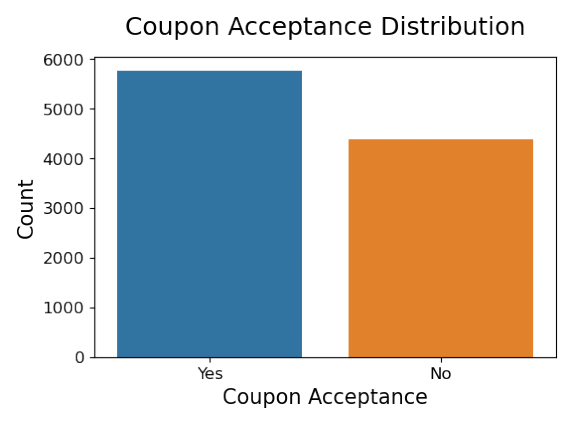

time: 92.7 ms (started: 2022-11-15 17:15:22 -08:00)


In [28]:
dpi=100
figure_filename = '../reports/figures/figure_target_variable_bar_plot_v3_dpi' + str(dpi) + '_v' + filename_version + '.png'

figure_filename_exists = os.path.isfile(figure_filename)
if figure_filename_exists == True:
    img = mpimg.imread(figure_filename)
    plt.figure(figsize=(10, 8))
    plt.grid(False)
    plt.axis('off')
    plt.imshow(img)

else:
    #get Y_train data
    _, _, Y_train_plot, _ = train_test_split(df.drop(columns=['Y']), df.loc[:, 'Y'], test_size=.2, random_state=200)

    #get Y_train coupon accepted and not accepted count
    df_target_plot = Y_train_plot.replace({0:'No', 1:'Yes'}).value_counts().to_frame().reset_index().rename(columns={'index':'accepted_not_accepted','Y':'count'})

    axes_object = sns.barplot(data=df_target_plot, x='accepted_not_accepted', y='count')
    axes_object.set_title('Coupon Acceptance Distribution', fontdict={'fontsize':18}, pad=16)
    #axes_object.set(xlabel='Coupon Acceptance', ylabel='Count')
    plt.xlabel('Coupon Acceptance', fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.tick_params(labelsize=12)



    #save it
    plt.savefig(figure_filename, bbox_inches='tight', dpi=dpi)
    
plt.show()

In [29]:
#take top features and check for statistical significant between them by response, i.e. did accept or did not accept coupon.

top_feature = 'expiration_category_representative_numeric_encoding'

df_expiration_category_representative_numeric_encoding_Y_coupon_not_accepted = df.loc[df.loc[:, 'Y'] == 0, [top_feature] + ['Y']]
df_expiration_category_representative_numeric_encoding_Y_coupon_accepted = df.loc[df.loc[:, 'Y'] == 1, [top_feature] + ['Y']]

time: 5.12 ms (started: 2022-11-15 17:15:22 -08:00)


In [30]:
#Proportion Hypothesis Tests for Binary Data

#https://statisticsbyjim.com/hypothesis-testing/comparing-hypothesis-tests-data-types/

#2 Proportions test to compare two samples

#1 Proportion test example: comparison to a target

time: 212 µs (started: 2022-11-15 17:15:22 -08:00)


In [31]:
df_expiration_category_representative_numeric_encoding_Y_coupon_not_accepted.value_counts()

expiration_category_representative_numeric_encoding  Y
2                                                    0    2819
24                                                   0    2655
dtype: int64

time: 3.34 ms (started: 2022-11-15 17:15:22 -08:00)


In [32]:
df_expiration_category_representative_numeric_encoding_Y_coupon_accepted.value_counts()

expiration_category_representative_numeric_encoding  Y
24                                                   1    4436
2                                                    1    2774
dtype: int64

time: 3.09 ms (started: 2022-11-15 17:15:22 -08:00)


In [33]:
4436 / (4436 + 2774)

0.615256588072122

time: 884 µs (started: 2022-11-15 17:15:22 -08:00)


In [34]:
#of scenarios where the the coupon is accepted, 61.5% of the time, it's a 24hours til expiration 

time: 159 µs (started: 2022-11-15 17:15:22 -08:00)


array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabe

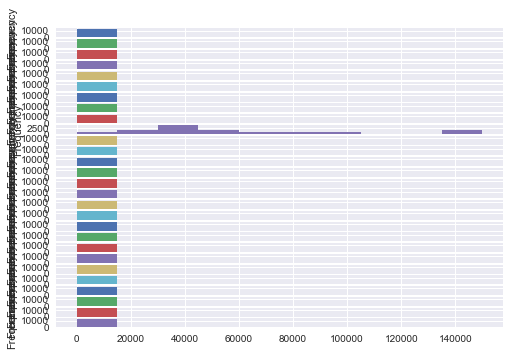

time: 1.49 s (started: 2022-11-15 17:15:22 -08:00)


In [35]:
plt.style.use('seaborn')

# Plotting as desired
df.plot.hist(subplots=True, legend=False)

In [36]:
#five types of coupons:
#bars
#takeaway food restaurants
#coffee houses
#cheap restaurants (average expense below $20 per person)
#expensive restaurants (average expense between $20 to $50 per person)

df.loc[:, 'coupon_venue_type'].value_counts()


Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon_venue_type, dtype: int64

time: 2.52 ms (started: 2022-11-15 17:15:23 -08:00)


In [37]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# dpi=100
# figure_filename = '../reports/figures/figure_triangle_correlation_heatmap_random_forest_classifier_numerics_dpi' + str(dpi) + '_v' + filename_version + '.png'

# img = mpimg.imread(figure_filename)
# plt.imshow(img)
# plt.show()


# # reading png image
# im = img.imread('imR.png')

# lum = im[:, :, 0]

# # show image
# plt.imshow(lum)

time: 257 µs (started: 2022-11-15 17:15:23 -08:00)


In [38]:
# dpi=100
# figure_filename = '../reports/figures/figure_triangle_correlation_heatmap_random_forest_classifier_numerics_dpi' + str(dpi) + '_v' + filename_version + '.png'

# img = mpimg.imread(figure_filename)

# if img.any() != None:
#     plt.figure(figsize=(30, 24))
#     plt.grid(False)
#     plt.axis('off')
#     plt.imshow(img)

time: 220 µs (started: 2022-11-15 17:15:23 -08:00)


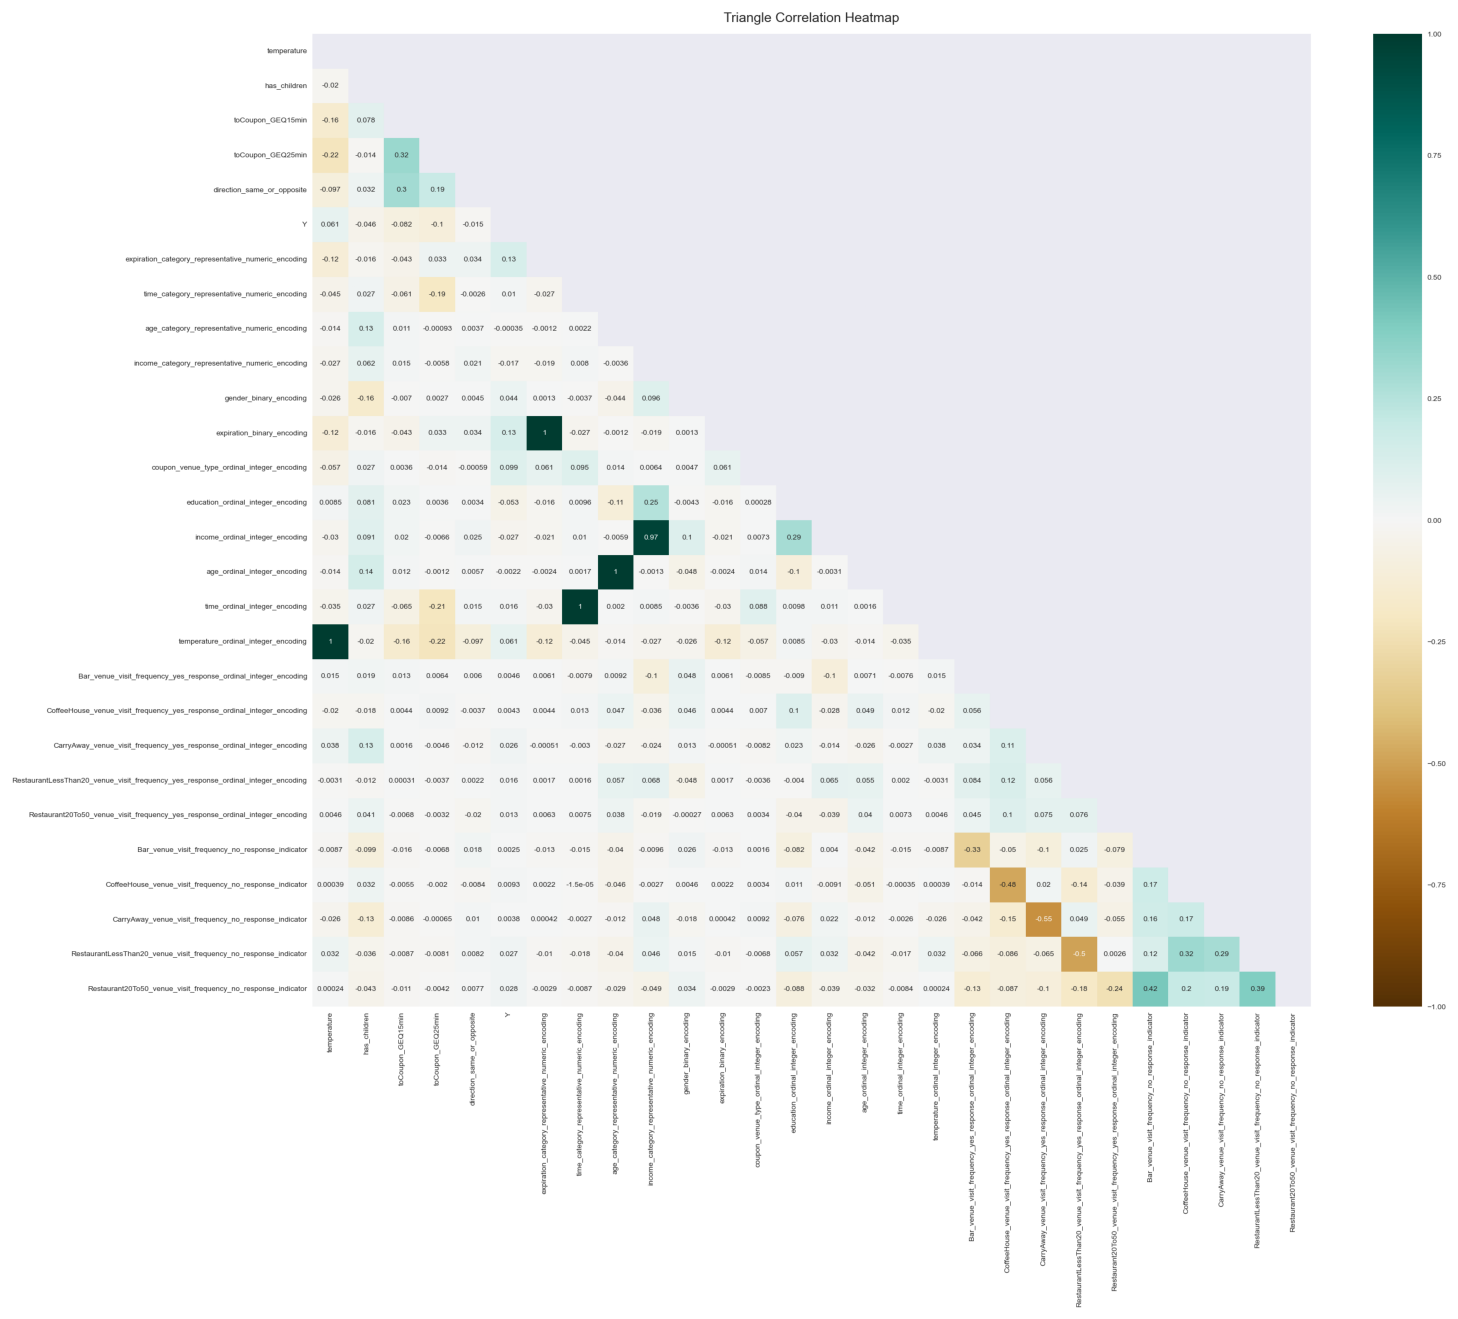

time: 699 ms (started: 2022-11-15 17:15:23 -08:00)


In [39]:
#correlation heatmap
dpi=100
figure_filename = '../reports/figures/figure_triangle_correlation_heatmap_random_forest_classifier_numerics_dpi' + str(dpi) + '_v' + filename_version + '.png'

figure_filename_exists = os.path.isfile(figure_filename)

if figure_filename_exists == True:
    img = mpimg.imread(figure_filename)
    plt.figure(figsize=(30, 24))
    plt.grid(False)
    plt.axis('off')
    plt.imshow(img)

else:
    plt.figure(figsize=(30, 24))
    mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
    heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

    plt.savefig(figure_filename, bbox_inches='tight', dpi=dpi)

plt.show()

In [40]:
#^-----fix runtime here.

time: 141 µs (started: 2022-11-15 17:15:24 -08:00)


In [41]:
#.11 correlation between coupon acceptance and reported CoffeeHouse venue visit frequency

#.099 correlation between venue coupon type and coupon accpetance

#.13 correlation between coupon expiraton and coupon acceptance

#.07 correaltio between reported expensive restaurant visit frequency and coupon acceptance

#.07 correlation between coupon acceptance and reported bar visit frequency 

#.061 correlation between temperature and coupon acceptance

#-.1 correlation between coupon acceptance and driver travel time to venue is greater than 25 minute

#-.082 correlation between coupon acceptance and driver travel time to venue is greater than 15 minute

#-.046 correlation between having children and accpeting coupon

time: 345 µs (started: 2022-11-15 17:15:24 -08:00)


In [42]:
dir()

['Audio',
 'GradientBoostingClassifier',
 'GridSearchCV',
 'In',
 'LogisticRegression',
 'Out',
 'RandomForestClassifier',
 'StandardScaler',
 'StratifiedKFold',
 '_',
 '_10',
 '_11',
 '_12',
 '_13',
 '_14',
 '_15',
 '_17',
 '_18',
 '_19',
 '_20',
 '_26',
 '_27',
 '_31',
 '_32',
 '_33',
 '_35',
 '_36',
 '_8',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_exit_code',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i35',
 '_i36',
 '_i37',
 '_i38',
 '_i39',
 '_i4',
 '_i40',
 '_i41',
 '_i42',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'accuracy_score',
 'auc',
 'brier_score_loss',
 'classification_report',
 'column_name',
 'column_name_list',
 'column_name_list_scenario',

time: 2.07 ms (started: 2022-11-15 17:15:24 -08:00)


In [43]:
# df_groups = pd.concat([data_frame_collection['X_train'].loc[:, 'coupon_venue_type_Bar'], data_frame_collection['Y_train'].loc[:, 'Y']], axis=1)
# p(df_groups)

time: 166 µs (started: 2022-11-15 17:15:24 -08:00)


In [44]:
# df_groups = pd.concat([data_frame_collection['X_train'].loc[:, 'coupon_venue_type_Bar'], data_frame_collection['Y_train'].loc[:, 'Y']], axis=1)
# p(df_groups)

time: 171 µs (started: 2022-11-15 17:15:24 -08:00)


<font size="5"><a id='[Data_Preprocessing]'></a> </font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_1_Confidence_Interval](#[Modeling_1_Confidence_Interval])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_3](#[Modeling_3])</font> <font size="2">[Results](#[Results])</font>

<font size="6"><a id='[Data_Preprocessing]'>**Data Preprocessing**</a> </font>

In [45]:
#get column name lists
column_name_list_numeric = list(df.select_dtypes('number').columns)
column_name_list_not_numeric = [column_name for column_name in df.columns if not column_name in column_name_list_numeric]

#get categorical features, numeric features, and target data frame
df_categorical_features = df.loc[:, column_name_list_not_numeric]
df_numeric_features = df.loc[:, column_name_list_numeric].drop(columns='Y')
df_target = df.loc[:, ['Y']]

#get category indicators data frame from df_categorical_features
df_category_indicator_features = pd.get_dummies(df_categorical_features)

del df_categorical_features

#combine category indicator features and numeric features
df_indicator_numeric_features = pd.concat([df_category_indicator_features, df_numeric_features], axis=1)

del df_numeric_features, 

p(df_indicator_numeric_features)


(12684, 140)


,destination_Home,destination_No Urgent Place,destination_Work,passenger_Alone,passenger_Friend(s),passenger_Kid(s),passenger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,coupon_venue_type_Bar,coupon_venue_type_Carry out & Take away,coupon_venue_type_Coffee House,coupon_venue_type_Restaurant(20-50),coupon_venue_type_Restaurant(<20),expiration_1d,expiration_2h,gender_Female,gender_Male,age_21-25,age_26-30,age_31-35,age_36-40,age_41-45,age_46-49,age_50+,age_<21,maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,education_Associates degree,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,education_Some college - no degree,occupation_Architecture & Engineering,occupation_Arts Design Entertainment Sports & Media,occupation_Building & Grounds Cleaning & Maintenance,occupation_Business & Financial,occupation_Community & Social Services,occupation_Computer & Mathematical,occupation_Construction & Extraction,occupation_Education&Training&Library,occupation_Farming Fishing & Forestry,occupation_Food Preparation & Serving Related,occupation_Healthcare Practitioners & Technical,occupation_Healthcare Support,occupation_Installation Maintenance & Repair,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed,income_$100000 or More,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,car_Car that is too old to install Onstar :D,car_Mazda5,car_Scooter and motorcycle,car_crossover,car_do not drive,car_no response,Bar_1-3,Bar_4-8,Bar_<1,Bar_>8,Bar_never,Bar_no response,CoffeeHouse_1-3,CoffeeHouse_4-8,CoffeeHouse_<1,CoffeeHouse_>8,CoffeeHouse_never,CoffeeHouse_no response,CarryAway_1-3,CarryAway_4-8,CarryAway_<1,CarryAway_>8,CarryAway_never,CarryAway_no response,RestaurantLessThan20_1-3,RestaurantLessThan20_4-8,RestaurantLessThan20_<1,RestaurantLessThan20_>8,RestaurantLessThan20_never,RestaurantLessThan20_no response,Restaurant20To50_1-3,Restaurant20To50_4-8,Restaurant20To50_<1,Restaurant20To50_>8,Restaurant20To50_never,Restaurant20To50_no response,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same_or_opposite,expiration_category_representative_numeric_encoding,time_category_representative_numeric_encoding,age_category_representative_numeric_encoding,income_category_representative_numeric_encoding,gender_binary_encoding,expiration_binary_encoding,coupon_venue_type_ordinal_integer_encoding,education_ordinal_integer_encoding,income_ordinal_integer_encoding,age_ordinal_integer_encoding,time_ordinal_integer_encoding,temperature_ordinal_integer_encoding,Bar_venue_visit_frequency_yes_response_ordinal_integer_encoding,CoffeeHouse_venue_visit_frequency_yes_response_ordinal_integer_encoding,CarryAway_venue_visit_frequency_yes_response_ordinal_integer_encoding,RestaurantLessThan20_venue_visit_frequency_yes_response_ordinal_integer_encoding,Restaurant20To50_venue_visit_frequency_yes_response_ordinal_integer_encoding,Bar_venue_visit_frequency_no_response_indicator,CoffeeHouse_venue_visit_frequency_no_response_indicator,CarryAway_venue_visit_frequency_no_response_indicator,RestaurantLessThan20_venue_visit_frequency_no_response_indicator,Restaurant20To50_venue_visit_frequency_no_response_indicator
11199,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0

time: 61.1 ms (started: 2022-11-15 17:15:24 -08:00)


In [46]:
#standardize and scale feature data frame
standard_scaler = StandardScaler()
standardized_scaled_df_indicator_numeric_features_ndarray = standard_scaler.fit_transform(df_indicator_numeric_features)
df_indicator_numeric_features_standardized_scaled = pd.DataFrame(standardized_scaled_df_indicator_numeric_features_ndarray, columns=df_indicator_numeric_features.columns, index=df_indicator_numeric_features.index)

del df_indicator_numeric_features, standardized_scaled_df_indicator_numeric_features_ndarray

p(df_indicator_numeric_features_standardized_scaled)

(12684, 140)


,destination_Home,destination_No Urgent Place,destination_Work,passenger_Alone,passenger_Friend(s),passenger_Kid(s),passenger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,coupon_venue_type_Bar,coupon_venue_type_Carry out & Take away,coupon_venue_type_Coffee House,coupon_venue_type_Restaurant(20-50),coupon_venue_type_Restaurant(<20),expiration_1d,expiration_2h,gender_Female,gender_Male,age_21-25,age_26-30,age_31-35,age_36-40,age_41-45,age_46-49,age_50+,age_<21,maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,education_Associates degree,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,education_Some college - no degree,occupation_Architecture & Engineering,occupation_Arts Design Entertainment Sports & Media,occupation_Building & Grounds Cleaning & Maintenance,occupation_Business & Financial,occupation_Community & Social Services,occupation_Computer & Mathematical,occupation_Construction & Extraction,occupation_Education&Training&Library,occupation_Farming Fishing & Forestry,occupation_Food Preparation & Serving Related,occupation_Healthcare Practitioners & Technical,occupation_Healthcare Support,occupation_Installation Maintenance & Repair,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed,income_$100000 or More,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,car_Car that is too old to install Onstar :D,car_Mazda5,car_Scooter and motorcycle,car_crossover,car_do not drive,car_no response,Bar_1-3,Bar_4-8,Bar_<1,Bar_>8,Bar_never,Bar_no response,CoffeeHouse_1-3,CoffeeHouse_4-8,CoffeeHouse_<1,CoffeeHouse_>8,CoffeeHouse_never,CoffeeHouse_no response,CarryAway_1-3,CarryAway_4-8,CarryAway_<1,CarryAway_>8,CarryAway_never,CarryAway_no response,RestaurantLessThan20_1-3,RestaurantLessThan20_4-8,RestaurantLessThan20_<1,RestaurantLessThan20_>8,RestaurantLessThan20_never,RestaurantLessThan20_no response,Restaurant20To50_1-3,Restaurant20To50_4-8,Restaurant20To50_<1,Restaurant20To50_>8,Restaurant20To50_never,Restaurant20To50_no response,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same_or_opposite,expiration_category_representative_numeric_encoding,time_category_representative_numeric_encoding,age_category_representative_numeric_encoding,income_category_representative_numeric_encoding,gender_binary_encoding,expiration_binary_encoding,coupon_venue_type_ordinal_integer_encoding,education_ordinal_integer_encoding,income_ordinal_integer_encoding,age_ordinal_integer_encoding,time_ordinal_integer_encoding,temperature_ordinal_integer_encoding,Bar_venue_visit_frequency_yes_response_ordinal_integer_encoding,CoffeeHouse_venue_visit_frequency_yes_response_ordinal_integer_encoding,CarryAway_venue_visit_frequency_yes_response_ordinal_integer_encoding,RestaurantLessThan20_venue_visit_frequency_yes_response_ordinal_integer_encoding,Restaurant20To50_venue_visit_frequency_yes_response_ordinal_integer_encoding,Bar_venue_visit_frequency_no_response_indicator,CoffeeHouse_venue_visit_frequency_no_response_indicator,CarryAway_venue_visit_frequency_no_response_indicator,RestaurantLessThan20_venue_visit_frequency_no_response_indicator,Restaurant20To50_venue_visit_frequency_no_response_indicator
11199,1.708345,-0.990740,-0.576501,0.858105,-0.592768,-0.293504,-0.304303,-0.32474,-0.352942,0.509616,-0.467505,-0.433432,-0.433816,1.710829,-0.576501,-0.434842,2.073755,-0.678192,-0.365116,-0.530538,-1.125982,1

time: 72.4 ms (started: 2022-11-15 17:15:24 -08:00)


In [47]:
#show near identical columns

time: 150 µs (started: 2022-11-15 17:15:24 -08:00)


In [48]:
#show duplicate columns as a data frame
df_duplicated = df_indicator_numeric_features_standardized_scaled.T.duplicated(keep=False)

p(df_indicator_numeric_features_standardized_scaled.loc[:, df_duplicated])

(12684, 16)


,destination_Work,time_7AM,expiration_1d,gender_Male,Bar_no response,CoffeeHouse_no response,CarryAway_no response,RestaurantLessThan20_no response,Restaurant20To50_no response,gender_binary_encoding,expiration_binary_encoding,Bar_venue_visit_frequency_no_response_indicator,CoffeeHouse_venue_visit_frequency_no_response_indicator,CarryAway_venue_visit_frequency_no_response_indicator,RestaurantLessThan20_venue_visit_frequency_no_response_indicator,Restaurant20To50_venue_visit_frequency_no_response_indicator
11199,-0.576501,-0.576501,-1.125982,1.027012,-0.168207,3.227498,2.637677,2.978392,-0.145795,1.027012,-1.125982,-0.168207,3.227498,2.637677,2.978392,-0.145795
1474,1.734604,1.734604,0.888114,1.027012,-0.168207,-0.309838,-0.379121,-0.335752,-0.145795,1.027012,0.888114,-0.168207,-0.309838,-0.379121,-0.335752,-0.145795
10836,-0.576501,-0.576501,0.888114,1.027012,-0.168207,3.227498,-0.379121,-0.335752,-0.145795,1.027012,0.888114,-0.168207,3.227498,-0.379121,-0.335752,-0.145795
4567,-0.576501,-0.576501,0.888114,-0.973698,-0.168207,-0.309838,-0.379121,-0.335752,-0.145795,-0.973698,0.888114,-0.168207,-0.309838,-0.379121,-0.335752,-0.145795
5658,-0.576501,-0.576501,-1.125982,-0.973698,-0.168207,-0.309838,-0.379121,-0.335752,-0.145795,-0.973698,-1.125982,-0.168207,-0.309838,-0.379121,-0.335752,-0.145795
11343,1.734604,1.734604,-1.125982,-0.973698,-0.168207,-0.309838,-0.379121,-0.335752,-0.145795,-0.973698,-1.125982,-0.168207,-0.309838,-0.379121,-0.335752,-0.145795
9036,-0.576501,-0.576501,-1.125982,1.027012,-0.168207,-0.309838,-0.379121,-0.335752,-0.145795,1.027012,-1.125982,-0.168207,-0.309838,-0.379121,-0.335752,-0.145795
11050,-0.576501,-0.576501,0.888114,1.027012,-0.168207,-0.309838,-0.379121,-0.335752,-0.145795,1.027012,0.888114,-0.168207,-0.309838,-0.379121,-0.335752,-0.145795
784,1.734604,1.734604,-1.125982,-0.973698,-0.168207,-0.309838,-0.379121,2.978392,-0.145795,-0.973698,-1.125982,-0.168207,-0.309838,-0.379121,2.978392,-0.145795
1818,-0.576501,-0.576501,0.888114,-0.973698,-0.168207,-0.309838,-0.379121,-0.335752,-0.145795,-0.973698,0.888114,-0.168207,-0.309838,-0.379121,-0.335752,-0.145795


time: 791 ms (started: 2022-11-15 17:15:24 -08:00)


In [49]:
p(df_target)

(12684, 1)


,Y
11199,1
1474,0
10836,1
4567,0
5658,1
11343,0
9036,0
11050,0
784,1
1818,0


time: 2.68 ms (started: 2022-11-15 17:15:25 -08:00)


In [50]:
#train test split need stratification (because of target variable imbalance) or is the dataset large enough???


time: 181 µs (started: 2022-11-15 17:15:25 -08:00)


In [51]:
#save preprocessed data frame
data_frame_version=filename_version
data_frame_collection_filename='data_frame_collection_train_test_v' + data_frame_version + '.pkl'


df_readback = icr.return_processed_collection_if_it_exists(filename=data_frame_collection_filename, parse_dates=False)
if df_readback != None:
    data_frame_collection = df_readback
else:
    data_frame_collection = {}
    
    #split the data into train and test
    data_frame_collection['X_train'], data_frame_collection['X_test'], data_frame_collection['Y_train'], data_frame_collection['Y_test'] = \
    train_test_split(df_indicator_numeric_features_standardized_scaled, df_target, test_size=.2, random_state=200)
    
    #save preprocessed data frame collection
    data_frame_collection = icr.save_and_return_collection(data_frame_collection=data_frame_collection, filename=data_frame_collection_filename)

del df_indicator_numeric_features_standardized_scaled

p(data_frame_collection['X_train'])

This file already exists
(10147, 140)


,destination_Home,destination_No Urgent Place,destination_Work,passenger_Alone,passenger_Friend(s),passenger_Kid(s),passenger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,coupon_venue_type_Bar,coupon_venue_type_Carry out & Take away,coupon_venue_type_Coffee House,coupon_venue_type_Restaurant(20-50),coupon_venue_type_Restaurant(<20),expiration_1d,expiration_2h,gender_Female,gender_Male,age_21-25,age_26-30,age_31-35,age_36-40,age_41-45,age_46-49,age_50+,age_<21,maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,education_Associates degree,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,education_Some college - no degree,occupation_Architecture & Engineering,occupation_Arts Design Entertainment Sports & Media,occupation_Building & Grounds Cleaning & Maintenance,occupation_Business & Financial,occupation_Community & Social Services,occupation_Computer & Mathematical,occupation_Construction & Extraction,occupation_Education&Training&Library,occupation_Farming Fishing & Forestry,occupation_Food Preparation & Serving Related,occupation_Healthcare Practitioners & Technical,occupation_Healthcare Support,occupation_Installation Maintenance & Repair,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed,income_$100000 or More,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,car_Car that is too old to install Onstar :D,car_Mazda5,car_Scooter and motorcycle,car_crossover,car_do not drive,car_no response,Bar_1-3,Bar_4-8,Bar_<1,Bar_>8,Bar_never,Bar_no response,CoffeeHouse_1-3,CoffeeHouse_4-8,CoffeeHouse_<1,CoffeeHouse_>8,CoffeeHouse_never,CoffeeHouse_no response,CarryAway_1-3,CarryAway_4-8,CarryAway_<1,CarryAway_>8,CarryAway_never,CarryAway_no response,RestaurantLessThan20_1-3,RestaurantLessThan20_4-8,RestaurantLessThan20_<1,RestaurantLessThan20_>8,RestaurantLessThan20_never,RestaurantLessThan20_no response,Restaurant20To50_1-3,Restaurant20To50_4-8,Restaurant20To50_<1,Restaurant20To50_>8,Restaurant20To50_never,Restaurant20To50_no response,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same_or_opposite,expiration_category_representative_numeric_encoding,time_category_representative_numeric_encoding,age_category_representative_numeric_encoding,income_category_representative_numeric_encoding,gender_binary_encoding,expiration_binary_encoding,coupon_venue_type_ordinal_integer_encoding,education_ordinal_integer_encoding,income_ordinal_integer_encoding,age_ordinal_integer_encoding,time_ordinal_integer_encoding,temperature_ordinal_integer_encoding,Bar_venue_visit_frequency_yes_response_ordinal_integer_encoding,CoffeeHouse_venue_visit_frequency_yes_response_ordinal_integer_encoding,CarryAway_venue_visit_frequency_yes_response_ordinal_integer_encoding,RestaurantLessThan20_venue_visit_frequency_yes_response_ordinal_integer_encoding,Restaurant20To50_venue_visit_frequency_yes_response_ordinal_integer_encoding,Bar_venue_visit_frequency_no_response_indicator,CoffeeHouse_venue_visit_frequency_no_response_indicator,CarryAway_venue_visit_frequency_no_response_indicator,RestaurantLessThan20_venue_visit_frequency_no_response_indicator,Restaurant20To50_venue_visit_frequency_no_response_indicator
8630,-0.585362,1.009347,-0.576501,-1.165358,1.686999,-0.293504,-0.304303,-0.32474,-0.352942,0.509616,-0.467505,-0.433432,-0.433816,1.710829,-0.576501,-0.434842,-0.482217,1.474508,-0.365116,-0.530538,0.888114,-0.

time: 66.2 ms (started: 2022-11-15 17:15:25 -08:00)


stratified Y_test coupon acceptance count from train_test_split: 1442


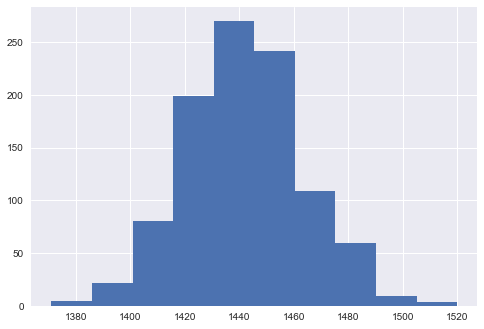

time: 4.1 s (started: 2022-11-15 17:15:25 -08:00)


In [52]:
#test: stratified or not stratified split?
icr.get_Y_test_distribution_from_train_test_split_iterations(df, number_of_iterations=1000)

In [53]:
#merge by index location?? not index label???
pd.concat(objs=[data_frame_collection['X_train'], data_frame_collection['Y_train'].loc[:, 'Y']], axis=1, join='outer',  ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=False, copy=True)



,destination_Home,destination_No Urgent Place,destination_Work,passenger_Alone,passenger_Friend(s),passenger_Kid(s),passenger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,coupon_venue_type_Bar,coupon_venue_type_Carry out & Take away,coupon_venue_type_Coffee House,coupon_venue_type_Restaurant(20-50),coupon_venue_type_Restaurant(<20),expiration_1d,expiration_2h,gender_Female,gender_Male,age_21-25,age_26-30,age_31-35,age_36-40,age_41-45,age_46-49,age_50+,age_<21,maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,education_Associates degree,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,education_Some college - no degree,occupation_Architecture & Engineering,occupation_Arts Design Entertainment Sports & Media,occupation_Building & Grounds Cleaning & Maintenance,occupation_Business & Financial,occupation_Community & Social Services,occupation_Computer & Mathematical,occupation_Construction & Extraction,occupation_Education&Training&Library,occupation_Farming Fishing & Forestry,occupation_Food Preparation & Serving Related,occupation_Healthcare Practitioners & Technical,occupation_Healthcare Support,occupation_Installation Maintenance & Repair,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed,income_$100000 or More,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,car_Car that is too old to install Onstar :D,car_Mazda5,car_Scooter and motorcycle,car_crossover,car_do not drive,car_no response,Bar_1-3,Bar_4-8,Bar_<1,Bar_>8,Bar_never,Bar_no response,CoffeeHouse_1-3,CoffeeHouse_4-8,CoffeeHouse_<1,CoffeeHouse_>8,CoffeeHouse_never,CoffeeHouse_no response,CarryAway_1-3,CarryAway_4-8,CarryAway_<1,CarryAway_>8,CarryAway_never,CarryAway_no response,RestaurantLessThan20_1-3,RestaurantLessThan20_4-8,RestaurantLessThan20_<1,RestaurantLessThan20_>8,RestaurantLessThan20_never,RestaurantLessThan20_no response,Restaurant20To50_1-3,Restaurant20To50_4-8,Restaurant20To50_<1,Restaurant20To50_>8,Restaurant20To50_never,Restaurant20To50_no response,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same_or_opposite,expiration_category_representative_numeric_encoding,time_category_representative_numeric_encoding,age_category_representative_numeric_encoding,income_category_representative_numeric_encoding,gender_binary_encoding,expiration_binary_encoding,coupon_venue_type_ordinal_integer_encoding,education_ordinal_integer_encoding,income_ordinal_integer_encoding,age_ordinal_integer_encoding,time_ordinal_integer_encoding,temperature_ordinal_integer_encoding,Bar_venue_visit_frequency_yes_response_ordinal_integer_encoding,CoffeeHouse_venue_visit_frequency_yes_response_ordinal_integer_encoding,CarryAway_venue_visit_frequency_yes_response_ordinal_integer_encoding,RestaurantLessThan20_venue_visit_frequency_yes_response_ordinal_integer_encoding,Restaurant20To50_venue_visit_frequency_yes_response_ordinal_integer_encoding,Bar_venue_visit_frequency_no_response_indicator,CoffeeHouse_venue_visit_frequency_no_response_indicator,CarryAway_venue_visit_frequency_no_response_indicator,RestaurantLessThan20_venue_visit_frequency_no_response_indicator,Restaurant20To50_venue_visit_frequency_no_response_indicator,Y
8630,-0.585362,1.009347,-0.576501,-1.165358,1.686999,-0.293504,-0.304303,-0.32474,-0.352942,0.509616,-0.467505,-0.433432,-0.433816,1.710829,-0.576501,-0.434842,-0.482217,1.474508,-0.365116,-0.530538,0.888114,-

time: 65.7 ms (started: 2022-11-15 17:15:29 -08:00)


In [54]:
data_frame_collection['X_train']

,destination_Home,destination_No Urgent Place,destination_Work,passenger_Alone,passenger_Friend(s),passenger_Kid(s),passenger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,coupon_venue_type_Bar,coupon_venue_type_Carry out & Take away,coupon_venue_type_Coffee House,coupon_venue_type_Restaurant(20-50),coupon_venue_type_Restaurant(<20),expiration_1d,expiration_2h,gender_Female,gender_Male,age_21-25,age_26-30,age_31-35,age_36-40,age_41-45,age_46-49,age_50+,age_<21,maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,education_Associates degree,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,education_Some college - no degree,occupation_Architecture & Engineering,occupation_Arts Design Entertainment Sports & Media,occupation_Building & Grounds Cleaning & Maintenance,occupation_Business & Financial,occupation_Community & Social Services,occupation_Computer & Mathematical,occupation_Construction & Extraction,occupation_Education&Training&Library,occupation_Farming Fishing & Forestry,occupation_Food Preparation & Serving Related,occupation_Healthcare Practitioners & Technical,occupation_Healthcare Support,occupation_Installation Maintenance & Repair,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed,income_$100000 or More,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,car_Car that is too old to install Onstar :D,car_Mazda5,car_Scooter and motorcycle,car_crossover,car_do not drive,car_no response,Bar_1-3,Bar_4-8,Bar_<1,Bar_>8,Bar_never,Bar_no response,CoffeeHouse_1-3,CoffeeHouse_4-8,CoffeeHouse_<1,CoffeeHouse_>8,CoffeeHouse_never,CoffeeHouse_no response,CarryAway_1-3,CarryAway_4-8,CarryAway_<1,CarryAway_>8,CarryAway_never,CarryAway_no response,RestaurantLessThan20_1-3,RestaurantLessThan20_4-8,RestaurantLessThan20_<1,RestaurantLessThan20_>8,RestaurantLessThan20_never,RestaurantLessThan20_no response,Restaurant20To50_1-3,Restaurant20To50_4-8,Restaurant20To50_<1,Restaurant20To50_>8,Restaurant20To50_never,Restaurant20To50_no response,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same_or_opposite,expiration_category_representative_numeric_encoding,time_category_representative_numeric_encoding,age_category_representative_numeric_encoding,income_category_representative_numeric_encoding,gender_binary_encoding,expiration_binary_encoding,coupon_venue_type_ordinal_integer_encoding,education_ordinal_integer_encoding,income_ordinal_integer_encoding,age_ordinal_integer_encoding,time_ordinal_integer_encoding,temperature_ordinal_integer_encoding,Bar_venue_visit_frequency_yes_response_ordinal_integer_encoding,CoffeeHouse_venue_visit_frequency_yes_response_ordinal_integer_encoding,CarryAway_venue_visit_frequency_yes_response_ordinal_integer_encoding,RestaurantLessThan20_venue_visit_frequency_yes_response_ordinal_integer_encoding,Restaurant20To50_venue_visit_frequency_yes_response_ordinal_integer_encoding,Bar_venue_visit_frequency_no_response_indicator,CoffeeHouse_venue_visit_frequency_no_response_indicator,CarryAway_venue_visit_frequency_no_response_indicator,RestaurantLessThan20_venue_visit_frequency_no_response_indicator,Restaurant20To50_venue_visit_frequency_no_response_indicator
8630,-0.585362,1.009347,-0.576501,-1.165358,1.686999,-0.293504,-0.304303,-0.32474,-0.352942,0.509616,-0.467505,-0.433432,-0.433816,1.710829,-0.576501,-0.434842,-0.482217,1.474508,-0.365116,-0.530538,0.888114,-0.

time: 59 ms (started: 2022-11-15 17:15:29 -08:00)


In [55]:
data_frame_collection['Y_train']

,Y
8630,1
2418,1
10804,0
747,1
7333,1
...,...
10949,0
11937,0
735,1
67,1


time: 3.37 ms (started: 2022-11-15 17:15:29 -08:00)


In [56]:
#fair to use stratified splits between train and test????

    #creates an artificially favorable ratio when the sample is split to represent the test set (i.e. like another sample population)
    
    #our dataset is a sample population and our marketing campaign will target a sample population.
    
    
    #the reality is our sample population is like taking a random sample, and targeted ads are shown to the subgroup of another sample population.
    #we can't control target variable data representation going from our survey to the in field targeted ads, so we shouldn't control it here???
    
    #OR
    
    #we are controling the target variable representation to fix a variable we don't want to worry about down the line. Down the line, we will have 
    #more data on customer behavior and considering the size of the hold out set, we want it to be representative of a larger dataset (i.e. our train data
    # which we believe is representative of the target population)
    

time: 528 µs (started: 2022-11-15 17:15:29 -08:00)


In [57]:
print(data_frame_collection['X_train'].shape, data_frame_collection['X_test'].shape, data_frame_collection['Y_train'].shape, data_frame_collection['Y_test'].shape)

(10147, 140) (2537, 140) (10147, 1) (2537, 1)
time: 558 µs (started: 2022-11-15 17:15:29 -08:00)


In [58]:
#this filtered survey as a dataset is our best approximation of the population????

#how do we know what the population is??? the population is those are targeting to coupon recommendation??? we are defining the population then???

#we could go the route of create ML based on the general population???? i mean there is already biased based on who would take a survey???
#i am assuming there is a bias for lower income individuals in surveys because they take time and don't pay well

#what is the demographic distribution of america by income??? <--- not going to be our target audience because coupon users and survey takers
#are going to be lower income than the general population of america.

#there is an inherit bias because coupon users and survey takers are different???


time: 399 µs (started: 2022-11-15 17:15:29 -08:00)


In [59]:
#we don't know what are target audience of coupon acceptor is, this what we are trying to figure out!!

#class label stratification seems to make sense here then???



time: 203 µs (started: 2022-11-15 17:15:29 -08:00)


In [60]:
dir()

['Audio',
 'GradientBoostingClassifier',
 'GridSearchCV',
 'In',
 'LogisticRegression',
 'Out',
 'RandomForestClassifier',
 'StandardScaler',
 'StratifiedKFold',
 '_',
 '_10',
 '_11',
 '_12',
 '_13',
 '_14',
 '_15',
 '_17',
 '_18',
 '_19',
 '_20',
 '_26',
 '_27',
 '_31',
 '_32',
 '_33',
 '_35',
 '_36',
 '_42',
 '_45',
 '_46',
 '_48',
 '_49',
 '_51',
 '_53',
 '_54',
 '_55',
 '_8',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_exit_code',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i35',
 '_i36',
 '_i37',
 '_i38',
 '_i39',
 '_i4',
 '_i40',
 '_i41',
 '_i42',
 '_i43',
 '_i44',
 '_i45',
 '_i46',
 '_i47',
 '_i48',
 '_i49',
 '_i5',
 '_i50',
 '_i51',
 '_i52',
 '_i53',
 '_i54',
 '_i55',
 '_i56',
 '_i57'

time: 2.66 ms (started: 2022-11-15 17:15:29 -08:00)


In [61]:
#we know what typse of coupons and their frequency in the survey. What types of coupons will be used the most for targetting customers?
#what venue types are requesting the most coupons???

#should the venue coupon demand influence how we design our train test splits ml model????
#the survey is supposed to attempt to represent the population which is in-vehicle coupon acceptance??? or is this recommendation??


time: 260 µs (started: 2022-11-15 17:15:29 -08:00)


## Get Stratified 5-Fold Cross Validation X_train, X_test, Y_train, Y_test Collection

In [62]:
#stratified 5-fold cross validation train-test data row selection

#Stratified 5-Fold object
StratifiedKFold_5_splits = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

#get stratfied 5-fold data frame splits
stratified_fold_number_X_train_X_test_Y_train_Y_test_collection = {}


for index, (train_index, test_index) in enumerate(StratifiedKFold_5_splits.split(data_frame_collection['X_train'], data_frame_collection['Y_train'].loc[:, 'Y'])):
    print('fold ' + str(index) + " TRAIN:", train_index, "TEST:", test_index)
    stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)] = \
    {'X_train' : data_frame_collection['X_train'].iloc[train_index, :], \
     'X_test' : data_frame_collection['X_train'].iloc[test_index, :], \
     'Y_train' : data_frame_collection['Y_train'].loc[:, 'Y'].iloc[train_index], \
     'Y_test' : data_frame_collection['Y_train'].loc[:, 'Y'].iloc[test_index]}

#use .loc for selection by index label, .iloc for selection by index location

print()
p(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold 0']['X_train'])

fold 0 TRAIN: [ 2028  2030  2031 ... 10144 10145 10146] TEST: [   0    1    2 ... 2027 2029 2032]
fold 1 TRAIN: [    0     1     2 ... 10144 10145 10146] TEST: [2028 2030 2031 ... 4095 4101 4102]
fold 2 TRAIN: [    0     1     2 ... 10144 10145 10146] TEST: [4009 4010 4012 ... 6131 6133 6135]
fold 3 TRAIN: [    0     1     2 ... 10144 10145 10146] TEST: [6036 6037 6043 ... 8126 8127 8128]
fold 4 TRAIN: [   0    1    2 ... 8126 8127 8128] TEST: [ 8099  8105  8109 ... 10144 10145 10146]

(8117, 140)


,destination_Home,destination_No Urgent Place,destination_Work,passenger_Alone,passenger_Friend(s),passenger_Kid(s),passenger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,coupon_venue_type_Bar,coupon_venue_type_Carry out & Take away,coupon_venue_type_Coffee House,coupon_venue_type_Restaurant(20-50),coupon_venue_type_Restaurant(<20),expiration_1d,expiration_2h,gender_Female,gender_Male,age_21-25,age_26-30,age_31-35,age_36-40,age_41-45,age_46-49,age_50+,age_<21,maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,education_Associates degree,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,education_Some college - no degree,occupation_Architecture & Engineering,occupation_Arts Design Entertainment Sports & Media,occupation_Building & Grounds Cleaning & Maintenance,occupation_Business & Financial,occupation_Community & Social Services,occupation_Computer & Mathematical,occupation_Construction & Extraction,occupation_Education&Training&Library,occupation_Farming Fishing & Forestry,occupation_Food Preparation & Serving Related,occupation_Healthcare Practitioners & Technical,occupation_Healthcare Support,occupation_Installation Maintenance & Repair,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed,income_$100000 or More,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,car_Car that is too old to install Onstar :D,car_Mazda5,car_Scooter and motorcycle,car_crossover,car_do not drive,car_no response,Bar_1-3,Bar_4-8,Bar_<1,Bar_>8,Bar_never,Bar_no response,CoffeeHouse_1-3,CoffeeHouse_4-8,CoffeeHouse_<1,CoffeeHouse_>8,CoffeeHouse_never,CoffeeHouse_no response,CarryAway_1-3,CarryAway_4-8,CarryAway_<1,CarryAway_>8,CarryAway_never,CarryAway_no response,RestaurantLessThan20_1-3,RestaurantLessThan20_4-8,RestaurantLessThan20_<1,RestaurantLessThan20_>8,RestaurantLessThan20_never,RestaurantLessThan20_no response,Restaurant20To50_1-3,Restaurant20To50_4-8,Restaurant20To50_<1,Restaurant20To50_>8,Restaurant20To50_never,Restaurant20To50_no response,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same_or_opposite,expiration_category_representative_numeric_encoding,time_category_representative_numeric_encoding,age_category_representative_numeric_encoding,income_category_representative_numeric_encoding,gender_binary_encoding,expiration_binary_encoding,coupon_venue_type_ordinal_integer_encoding,education_ordinal_integer_encoding,income_ordinal_integer_encoding,age_ordinal_integer_encoding,time_ordinal_integer_encoding,temperature_ordinal_integer_encoding,Bar_venue_visit_frequency_yes_response_ordinal_integer_encoding,CoffeeHouse_venue_visit_frequency_yes_response_ordinal_integer_encoding,CarryAway_venue_visit_frequency_yes_response_ordinal_integer_encoding,RestaurantLessThan20_venue_visit_frequency_yes_response_ordinal_integer_encoding,Restaurant20To50_venue_visit_frequency_yes_response_ordinal_integer_encoding,Bar_venue_visit_frequency_no_response_indicator,CoffeeHouse_venue_visit_frequency_no_response_indicator,CarryAway_venue_visit_frequency_no_response_indicator,RestaurantLessThan20_venue_visit_frequency_no_response_indicator,Restaurant20To50_venue_visit_frequency_no_response_indicator
11981,-0.585362,1.009347,-0.576501,-1.165358,1.686999,-0.293504,-0.304303,-0.32474,-0.352942,0.509616,2.139015,-0.433432,-0.433816,-0.584512,-0.576501,-0.434842,2.073755,-0.678192,-0.365116,-0.530538,-1.125982,1

time: 88.3 ms (started: 2022-11-15 17:15:29 -08:00)


In [63]:
p(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold 0']['Y_train'])

(8117,)


11981    1
3996     1
1301     1
9720     0
752      0
10949    0
11937    0
735      1
67       1
3251     1
Name: Y, dtype: int64

time: 2.49 ms (started: 2022-11-15 17:15:30 -08:00)


In [64]:
p(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold 0']['X_test'])

(2030, 140)


,destination_Home,destination_No Urgent Place,destination_Work,passenger_Alone,passenger_Friend(s),passenger_Kid(s),passenger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,coupon_venue_type_Bar,coupon_venue_type_Carry out & Take away,coupon_venue_type_Coffee House,coupon_venue_type_Restaurant(20-50),coupon_venue_type_Restaurant(<20),expiration_1d,expiration_2h,gender_Female,gender_Male,age_21-25,age_26-30,age_31-35,age_36-40,age_41-45,age_46-49,age_50+,age_<21,maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,education_Associates degree,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,education_Some college - no degree,occupation_Architecture & Engineering,occupation_Arts Design Entertainment Sports & Media,occupation_Building & Grounds Cleaning & Maintenance,occupation_Business & Financial,occupation_Community & Social Services,occupation_Computer & Mathematical,occupation_Construction & Extraction,occupation_Education&Training&Library,occupation_Farming Fishing & Forestry,occupation_Food Preparation & Serving Related,occupation_Healthcare Practitioners & Technical,occupation_Healthcare Support,occupation_Installation Maintenance & Repair,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed,income_$100000 or More,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,car_Car that is too old to install Onstar :D,car_Mazda5,car_Scooter and motorcycle,car_crossover,car_do not drive,car_no response,Bar_1-3,Bar_4-8,Bar_<1,Bar_>8,Bar_never,Bar_no response,CoffeeHouse_1-3,CoffeeHouse_4-8,CoffeeHouse_<1,CoffeeHouse_>8,CoffeeHouse_never,CoffeeHouse_no response,CarryAway_1-3,CarryAway_4-8,CarryAway_<1,CarryAway_>8,CarryAway_never,CarryAway_no response,RestaurantLessThan20_1-3,RestaurantLessThan20_4-8,RestaurantLessThan20_<1,RestaurantLessThan20_>8,RestaurantLessThan20_never,RestaurantLessThan20_no response,Restaurant20To50_1-3,Restaurant20To50_4-8,Restaurant20To50_<1,Restaurant20To50_>8,Restaurant20To50_never,Restaurant20To50_no response,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same_or_opposite,expiration_category_representative_numeric_encoding,time_category_representative_numeric_encoding,age_category_representative_numeric_encoding,income_category_representative_numeric_encoding,gender_binary_encoding,expiration_binary_encoding,coupon_venue_type_ordinal_integer_encoding,education_ordinal_integer_encoding,income_ordinal_integer_encoding,age_ordinal_integer_encoding,time_ordinal_integer_encoding,temperature_ordinal_integer_encoding,Bar_venue_visit_frequency_yes_response_ordinal_integer_encoding,CoffeeHouse_venue_visit_frequency_yes_response_ordinal_integer_encoding,CarryAway_venue_visit_frequency_yes_response_ordinal_integer_encoding,RestaurantLessThan20_venue_visit_frequency_yes_response_ordinal_integer_encoding,Restaurant20To50_venue_visit_frequency_yes_response_ordinal_integer_encoding,Bar_venue_visit_frequency_no_response_indicator,CoffeeHouse_venue_visit_frequency_no_response_indicator,CarryAway_venue_visit_frequency_no_response_indicator,RestaurantLessThan20_venue_visit_frequency_no_response_indicator,Restaurant20To50_venue_visit_frequency_no_response_indicator
8630,-0.585362,1.009347,-0.576501,-1.165358,1.686999,-0.293504,-0.304303,-0.32474,-0.352942,0.509616,-0.467505,-0.433432,-0.433816,1.710829,-0.576501,-0.434842,-0.482217,1.474508,-0.365116,-0.530538,0.888114,-0.

time: 58.6 ms (started: 2022-11-15 17:15:30 -08:00)


In [65]:
p(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold 0']['Y_test'])

(2030,)


8630     1
2418     1
10804    0
747      1
7333     1
1460     1
8449     1
11224    0
5085     0
7156     0
Name: Y, dtype: int64

time: 2.3 ms (started: 2022-11-15 17:15:30 -08:00)


## Covert to Y Train Data Frame from Y Train Data Frame Collection

In [66]:
#convert to y_actual data frame from y_actual data frame collection
data_frame_list_stratified_fold_number_Y_test = [stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(fold_number)]['Y_test'] for fold_number in range(5)]

df_stratified_fold_number_y_test = pd.concat(data_frame_list_stratified_fold_number_Y_test, axis=0, join='outer', ignore_index=False, copy=True).to_frame()
p(df_stratified_fold_number_y_test)

(10147, 1)


,Y
8630,1
2418,1
10804,0
747,1
7333,1
10949,0
11937,0
735,1
67,1
3251,1


time: 4.69 ms (started: 2022-11-15 17:15:30 -08:00)


<font size="5"><a id='[Modeling]'></a> </font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_3](#[Modeling_3])</font> <font size="2">[Results](#[Results])</font>

<font size="6"><a id='[Modeling]'>**Modeling**</a> </font>

## Initialize Filename & Results Collection Variables

In [67]:
classifier_name_list = ['random_forest_classifier', 'gradient_boosting_classifier', 'logistic_regression_classifier']

#filename
grid_search_models_filename_collection={}
grid_search_models_local_optimum_filename_collection={}

model_filename_collection = {}
model_cross_validation_results_filename_collection = {}

cross_validation_model_collection_filename_collection = {}
model_cross_validation_prediction_probability_collection_filename_collection = {}
model_cross_validation_prediction_collection_filename_collection = {}

learning_curve_results_filename_collection = {}

for classifier_name in classifier_name_list:
    grid_search_models_filename_collection[classifier_name]='stratified_5_fold_grid_search_cross_validation_' + classifier_name + '_v' + filename_version + '.pkl'
    grid_search_models_local_optimum_filename_collection[classifier_name]='stratified_5_fold_grid_search_cross_validation_' + classifier_name + '_local_optimum_v' + filename_version + '.pkl'
    
    model_filename_collection[classifier_name]='best_stratified_5_fold_grid_search_cross_validation_'+ classifier_name + '_v' + filename_version + '.pkl'
    model_cross_validation_results_filename_collection[classifier_name]='best_' + classifier_name + '_stratified_5_fold_cross_validation_results_v' + filename_version + '.pkl'

    cross_validation_model_collection_filename_collection[classifier_name] = 'stratified_5_fold_cross_validation_' + str(classifier_name) + '_collection_v' + filename_version + '.pkl'
    model_cross_validation_prediction_probability_collection_filename_collection[classifier_name] = 'stratified_5_fold_cross_validation_' + str(classifier_name) + '_prediction_probability_collection_v' + filename_version + '.pkl'
    model_cross_validation_prediction_collection_filename_collection[classifier_name] = 'stratified_5_fold_cross_validation_' + str(classifier_name) + '_prediction_collection_v' + filename_version + '.pkl'
    
    learning_curve_results_filename_collection[classifier_name]='learning_curve_results_best_' + classifier_name + '_v' + filename_version + '.pkl'


    
model_version=filename_version

time: 1.25 ms (started: 2022-11-15 17:15:30 -08:00)


## Initialize Other Variables

In [68]:
StratifiedKFold_5_splits = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection = {}

stratified_5_fold_cross_validation_model_classifier_prediction_probability_data_frame_collection = {}

stratified_5_fold_cross_validation_model_classifier_prediction_data_frame_collection = {}

model_stratified_5_fold_cross_validation_results_collection = {}



time: 648 µs (started: 2022-11-15 17:15:30 -08:00)


In [69]:
from sklearn.metrics import log_loss
y_true = [0, 0, 1, 1]
y_pred = [[.9, .1], [.8, .2], [.3, .7], [.01, .99]]

log_loss(y_true, y_pred)



0.1738073366910675

time: 2.83 ms (started: 2022-11-15 17:15:30 -08:00)


<font size="5"><a id='[Modeling_1]'></a> </font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_1_Confidence_Interval](#[Modeling_1_Confidence_Interval])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_3](#[Modeling_3])</font> <font size="2">[Results](#[Results])</font>

<font size="6"><a id='[Modeling_1]'>**Modeling 1**</a> </font>

## Get Random Forest Classifier Stratified 5-Fold Cross Validation Grid Search by Accuracy

In [70]:
#get grid search stratified 5-fold cross validation results
models_readback = icr.return_saved_model_if_it_exists(filename=grid_search_models_filename_collection['random_forest_classifier'])
if models_readback != None:
    stratified_5_fold_grid_search_cross_validation_random_forest_classifier = models_readback
else:
    #random forest hyperparameter tuning using 5-fold cross validation

    # Create the parameter grid based on the results of random search
    param_grid = {
        'n_estimators': [200], #more is better, otherwise these are just random variation
        'criterion':['gini'],
        'max_depth': [3, 5, 10, 20, 25, None], #ba 3, past 25 is a lot (and can be left to whatever large max depth then); previously [5, 10, 20, 25, 30, 35, 40]
        'min_samples_split': [1, 10, 50, 100], #ba 1, 10, 50, 100; previously [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
        'min_samples_leaf':[1],
        'min_weight_fraction_leaf':[0.0],
        'max_features':['auto'],
        'max_leaf_nodes':[None],
        'min_impurity_decrease':[0.0],
        'bootstrap': [False ,True],
        'oob_score': [False],
        'n_jobs': [None],
        'warm_start':[False],
        'class_weight':[None],
        'ccp_alpha':[0.0],
        'max_samples':[None],
    }
    #min_samples_leaf can be used as an alternative to 'min_samples_split'
    
    #RandomForestClassifier(bootstrap=False, max_depth=25, min_samples_split=4,
                       #n_estimators=200, random_state=200)

    # Create a based model
    random_forest_classifier = RandomForestClassifier(random_state=200)

    # Instantiate the Stratified 5-Fold Grid Search Cross Validation
    stratified_5_fold_grid_search_cross_validation_random_forest_classifier = GridSearchCV(estimator=random_forest_classifier, 
                                                                                           param_grid=param_grid, 
                                                                                           cv=StratifiedKFold_5_splits,
                                                                                           n_jobs=-1, 
                                                                                           verbose=0,
                                                                                           scoring=None)
    # Fit the grid search to the data
    stratified_5_fold_grid_search_cross_validation_random_forest_classifier.fit(data_frame_collection['X_train'], data_frame_collection['Y_train'].loc[:, 'Y'])

    #save it
    stratified_5_fold_grid_search_cross_validation_random_forest_classifier = icr.save_and_return_model(stratified_5_fold_grid_search_cross_validation_random_forest_classifier, 
                                                                                                         filename=grid_search_models_filename_collection['random_forest_classifier'])
    
    #https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

stratified_5_fold_grid_search_cross_validation_random_forest_classifier

This file already exists


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=200), n_jobs=-1,
             param_grid={'bootstrap': [False, True], 'ccp_alpha': [0.0],
                         'class_weight': [None], 'criterion': ['gini'],
                         'max_depth': [3, 5, 10, 20, 25, None],
                         'max_features': ['auto'], 'max_leaf_nodes': [None],
                         'max_samples': [None], 'min_impurity_decrease': [0.0],
                         'min_samples_leaf': [1],
                         'min_samples_split': [1, 10, 50, 100],
                         'min_weight_fraction_leaf': [0.0],
                         'n_estimators': [200], 'n_jobs': [None],
                         'oob_score': [False], 'warm_start': [False]})

time: 35.8 ms (started: 2022-11-15 17:15:30 -08:00)


## Get Random Forest Classifier Stratified 5-Fold Cross Validation Grid Search by Accuracy Run 2

In [71]:
models_readback = icr.return_saved_model_if_it_exists(filename=grid_search_models_local_optimum_filename_collection['random_forest_classifier'])
if models_readback != None:
    stratified_5_fold_grid_search_cross_validation_random_forest_classifier_local_optimum = models_readback
else:
    #random forest hyperparameter tuning using 5-fold cross validation
    param_grid = {
        'bootstrap': [False ,True],
        'criterion':['gini'],
        'max_features':['auto'],
        'max_depth': [3, 5, 10, 20, 25, None], # lower numbers reduce growth
        'min_samples_split': [1, 5, 10, 15, 20], # higher numbers reduce growth
        'min_samples_leaf':[1],
        'n_estimators': [200], #more is better, otherwise these are just random variation
        'warm_start':[False]
    }
    #min_samples_leaf can be used as an alternative to 'min_samples_split'

    
    # Create a base model
    random_forest_classifier = RandomForestClassifier(random_state=200)

    # Instantiate the Stratified 5-Fold Grid Search Cross Validation
    stratified_5_fold_grid_search_cross_validation_random_forest_classifier_local_optimum = GridSearchCV(estimator=random_forest_classifier, 
                                                                                                         param_grid=param_grid, 
                                                                                                         cv=StratifiedKFold_5_splits,
                                                                                                         n_jobs=-1, 
                                                                                                         verbose=0,
                                                                                                         scoring=None)
    # Fit the grid search to the data
    stratified_5_fold_grid_search_cross_validation_random_forest_classifier_local_optimum.fit(data_frame_collection['X_train'], data_frame_collection['Y_train'].loc[:, 'Y'])

    #save it
    stratified_5_fold_grid_search_cross_validation_random_forest_classifier_local_optimum = icr.save_and_return_model(stratified_5_fold_grid_search_cross_validation_random_forest_classifier_local_optimum, 
                                                                                                                      filename=grid_search_models_local_optimum_filename_collection['random_forest_classifier'])

stratified_5_fold_grid_search_cross_validation_random_forest_classifier_local_optimum


This file already exists


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=200), n_jobs=-1,
             param_grid={'bootstrap': [False, True], 'criterion': ['gini'],
                         'max_depth': [3, 5, 10, 20, 25, None],
                         'max_features': ['auto'], 'min_samples_leaf': [1],
                         'min_samples_split': [1, 5, 10, 15, 20],
                         'n_estimators': [200], 'warm_start': [False]})

time: 52.3 ms (started: 2022-11-15 17:15:30 -08:00)


In [72]:
#scoring? multimetric??

time: 189 µs (started: 2022-11-15 17:15:30 -08:00)


## Get Best Random Forest Classifier by Accuracy

In [73]:
#get best random forest classifier
model_readback = icr.return_saved_model_if_it_exists(filename=model_filename_collection['random_forest_classifier'])
if model_readback != None:
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier = model_readback
else:   
    #add model environment data to model

    #get best random forest classifier from grid search cross validation
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier = stratified_5_fold_grid_search_cross_validation_random_forest_classifier_local_optimum.best_estimator_

    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.version = model_version
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.pandas_version = pd.__version__
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.numpy_version = np.__version__
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.sklearn_version = sklearn_version
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.X_columns = [column_name for column_name in data_frame_collection['X_train'].columns]
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.build_datetime = datetime.datetime.now()    

    
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier = icr.save_and_return_model(best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier, 
                                                                                                              filename=model_filename_collection['random_forest_classifier'])
    
best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier


This file already exists


RandomForestClassifier(bootstrap=False, max_depth=25, min_samples_split=5,
                       n_estimators=200, random_state=200)

time: 48.6 ms (started: 2022-11-15 17:15:30 -08:00)


In [74]:
###################################################################################################################################################
#Regarding how to evaluate the performance of a classifier, especially when the data is imbalanced between classes, 
#you could consider precision and recall as your metrics of choice. I think it's a better measure of how 'good' a 
#classifier is than straight accuracy or auc for roc curves (without knowing more about your context/goals).



#Precision = TruePositives / (TruePositives + FalsePositives)
#Recall = TruePositives / (TruePositives + FalseNegatives)



###################################################################################################################################################

#this suggests we have a better prediction of coupon acceptance among those who actually accept the coupon
#compared to our prediction of coupon acceptance among those we predict are going to accept the coupon.

#what does this mean? does it matter???

#how does it effect the business problem??

#precision is possibly those who we would want to market to. Of this group, we have a 0.83 acceptance rate.

###################################################################################################################################################

#recall is those that would actual accept the coupon, so it's our hindsight 20 20.

###################################################################################################################################################

#should be using cross validation score precision and recall.

#there a function for this???

###################################################################################################################################################

#get proper parameters??




time: 699 µs (started: 2022-11-15 17:15:30 -08:00)


## Get Stratified 5-Fold Cross Validation Best Random Forest Classifier Results

In [75]:
data_collection_readback = icr.return_processed_collection_if_it_exists(filename=model_cross_validation_results_filename_collection['random_forest_classifier'])
if data_collection_readback != None:
    best_random_forest_classifier_stratified_5_fold_cross_validation_results = data_collection_readback
else:
    scoring = {'accuracy' : make_scorer(accuracy_score), 
               'precision' : make_scorer(precision_score),
               'recall' : make_scorer(recall_score), 
               'f1_score' : make_scorer(f1_score)}

    random_forest_classifier=RandomForestClassifier(bootstrap=False, 
                                                    max_depth=25, 
                                                    min_samples_split=4, 
                                                    n_estimators=200,
                                                    min_samples_leaf=1,
                                                    max_features='auto',
                                                    criterion='gini',
                                                    warm_start='False',
                                                    random_state=200)

    best_random_forest_classifier_stratified_5_fold_cross_validation_results = cross_validate(estimator=random_forest_classifier,
                                                                                              X=data_frame_collection['X_train'],
                                                                                              y=data_frame_collection['Y_train'].loc[:, 'Y'],
                                                                                              cv=StratifiedKFold_5_splits,
                                                                                              scoring=scoring)
    #save it
    best_random_forest_classifier_stratified_5_fold_cross_validation_results = icr.save_and_return_collection(best_random_forest_classifier_stratified_5_fold_cross_validation_results, 
                                                                                                              filename=model_cross_validation_results_filename_collection['random_forest_classifier'])


model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier'] = best_random_forest_classifier_stratified_5_fold_cross_validation_results
model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']



This file already exists


{'fit_time': array([2.10187078, 2.06099486, 2.03208423, 2.04012585, 2.04299498]),
 'score_time': array([0.07517409, 0.07670212, 0.0730269 , 0.07394886, 0.07519317]),
 'test_accuracy': array([0.75566502, 0.76995074, 0.76096599, 0.75110892, 0.7683588 ]),
 'test_precision': array([0.75845791, 0.76862745, 0.76744186, 0.77116513, 0.77678571]),
 'test_recall': array([0.83607979, 0.85069444, 0.83072917, 0.79861111, 0.83072917]),
 'test_f1_score': array([0.79537954, 0.80758138, 0.79783243, 0.78464819, 0.80285235])}

time: 4.2 ms (started: 2022-11-15 17:15:30 -08:00)


In [76]:
model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['fit_time_sum'] = \
model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['fit_time'].sum()

model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['score_time_sum'] = \
model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['score_time'].sum()

model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['fit_time_score_time_sum'] = \
model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['fit_time_sum'] + \
model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['score_time_sum']

model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['fit_time_mean'] = \
model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['fit_time'].mean()

model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['score_time_mean'] = \
model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['score_time'].mean()

model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['test_precision_mean'] = \
model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['test_precision'].mean()

model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['test_recall_mean'] = \
model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['test_recall'].mean()

model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['test_f1_score_mean'] = \
model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['test_f1_score'].mean()

model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['test_accuracy_mean'] = \
model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['test_accuracy'].mean()



time: 1.32 ms (started: 2022-11-15 17:15:30 -08:00)


In [77]:
print("model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['test_precision_mean']: " + str(model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['test_precision_mean']))
print("model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['test_recall_mean']: " + str(model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['test_recall_mean']))
print("model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['test_f1_score_mean']: " + str(model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['test_f1_score_mean']))
print("model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['test_accuracy_mean']: " + str(model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['test_accuracy_mean']))


del best_random_forest_classifier_stratified_5_fold_cross_validation_results

model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['test_precision_mean']: 0.7684956125630998
model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['test_recall_mean']: 0.8293687361472488
model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['test_f1_score_mean']: 0.7976587761888356
model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['test_accuracy_mean']: 0.761209894946915
time: 973 µs (started: 2022-11-15 17:15:30 -08:00)


In [78]:
#^---- recall possibly high because of class imbalance toward in-vehicle coupon recommendation??????

#this an ML problem??

#this a survey problem methods problem?????? or just a normal issue dealt with???

#bootstrapping the dataset for a class balance better??? 

###################################################################################################################################################

#is it possible recall is just easier than precision in general????

#are there cases where precision is higher than recall????

###################################################################################################################################################

#should have built random forest to optimize for f1 score??? what about the more fundamental precision or recall?? 
#acccuracy seems more all encompassing on just getting the correct prediction instead of focusing on rates related to coupon acceptance???

###################################################################################################################################################

#want 5-fold cross validation prediction structure for random forest from N estimators

###################################################################################################################################################

#want to train 5 random forest classifier using each of the train folds 0, 1, 2, 3, 4

#next want to use each random forest classifier to get predictions from each estimator per test fold (i.e. folds 0, 1, 2, 3, 4)



time: 646 µs (started: 2022-11-15 17:15:30 -08:00)


## Get Stratified 5-Fold Cross Validation Random Forest Classifier Collection

In [79]:
models_readback = icr.return_saved_model_if_it_exists(filename=cross_validation_model_collection_filename_collection['random_forest_classifier'])
if models_readback != None:
    stratified_5_fold_cross_validation_random_forest_classifier_collection = models_readback
else:
    stratified_5_fold_cross_validation_random_forest_classifier_collection = {}
    for index in range(5):

        #create random forest classifier
        random_forest_classifier=RandomForestClassifier(bootstrap=False, 
                                                        max_depth=None, 
                                                        min_samples_split=10, 
                                                        n_estimators=200,
                                                        min_samples_leaf=1,
                                                        max_features='auto',
                                                        criterion='gini',
                                                        warm_start='False',
                                                        random_state=200)

        #train random forest classifier and save random forest classifer per fold
        random_forest_classifier.fit(X=stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['X_train'],
                                     y=stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['Y_train'])

        stratified_5_fold_cross_validation_random_forest_classifier_collection['fold ' + str(index)] = random_forest_classifier


    #save stratified 5-fold cross validation random forest classifier collection
    stratified_5_fold_cross_validation_random_forest_classifier_collection = icr.save_and_return_model(stratified_5_fold_cross_validation_random_forest_classifier_collection, 
                                                                                                       filename=cross_validation_model_collection_filename_collection['random_forest_classifier'])
stratified_5_fold_cross_validation_random_forest_classifier_collection


This file already exists


{'fold 0': RandomForestClassifier(bootstrap=False, min_samples_split=10, n_estimators=200,
                        random_state=200, warm_start='False'),
 'fold 1': RandomForestClassifier(bootstrap=False, min_samples_split=10, n_estimators=200,
                        random_state=200, warm_start='False'),
 'fold 2': RandomForestClassifier(bootstrap=False, min_samples_split=10, n_estimators=200,
                        random_state=200, warm_start='False'),
 'fold 3': RandomForestClassifier(bootstrap=False, min_samples_split=10, n_estimators=200,
                        random_state=200, warm_start='False'),
 'fold 4': RandomForestClassifier(bootstrap=False, min_samples_split=10, n_estimators=200,
                        random_state=200, warm_start='False')}

time: 158 ms (started: 2022-11-15 17:15:30 -08:00)


## Get Stratified 5-Fold Cross Validation Random Forest Classifier Prediction Collection

In [80]:
prediction_data_frame_collection = icr.return_processed_collection_if_it_exists(filename=model_cross_validation_prediction_collection_filename_collection['random_forest_classifier'])
if prediction_data_frame_collection != None:
    stratified_5_fold_cross_validation_random_forest_classifier_prediction_collection = prediction_data_frame_collection
else:
    stratified_5_fold_cross_validation_random_forest_classifier_prediction_collection = {}
    for index in range(5):
        #get predictions for test per fold
        stratified_5_fold_cross_validation_random_forest_classifier_prediction_collection['fold ' + str(index)] = \
        stratified_5_fold_cross_validation_random_forest_classifier_collection['fold ' + str(index)]\
        .predict(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['X_test'])

    #save stratified 5-fold cross validation random forest classifier prediction collection
    stratified_5_fold_cross_validation_random_forest_classifier_prediction_collection = icr.save_and_return_collection(data_frame_collection=stratified_5_fold_cross_validation_random_forest_classifier_prediction_collection, 
                                                                                                                       filename=model_cross_validation_prediction_collection_filename_collection['random_forest_classifier'])
stratified_5_fold_cross_validation_random_forest_classifier_prediction_collection['fold 0']


This file already exists


array([1, 1, 0, ..., 0, 1, 1])

time: 9.02 ms (started: 2022-11-15 17:15:30 -08:00)


## Get Stratified 5-Fold Cross Validation Random Forest Classifier Prediction Data Frame

In [81]:
stratified_5_fold_cross_validation_model_classifier_prediction_data_frame_collection['random_forest_classifier'] = \
icr.get_data_frame_from_collection(collection_name=stratified_5_fold_cross_validation_random_forest_classifier_prediction_collection,
                                   column_name='Y_predicted')

p(stratified_5_fold_cross_validation_model_classifier_prediction_data_frame_collection['random_forest_classifier'])



(10147, 1)


,Y_predicted
0,1
1,1
2,0
3,1
4,1
2024,0
2025,1
2026,1
2027,1
2028,1


time: 8.21 ms (started: 2022-11-15 17:15:30 -08:00)


## Get Stratified 5-Fold Cross Validation Random Forest Classifier Prediction Probability Collection

In [82]:
prediction_probability_ndarray_collection = icr.return_processed_collection_if_it_exists(filename=model_cross_validation_prediction_probability_collection_filename_collection['random_forest_classifier'])
if prediction_probability_ndarray_collection != None:
    stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability_collection = prediction_probability_ndarray_collection
else:
    stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability_collection = {}
    for index in range(5):
        #get predictions for test per fold
        stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability_collection['fold ' + str(index)] = \
        stratified_5_fold_cross_validation_random_forest_classifier_collection['fold ' + str(index)]\
        .predict_proba(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['X_test'])
    

    #save stratified 5-fold cross validation random forest classifier prediction collection
    stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability_collection = icr.save_and_return_collection(data_frame_collection=stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability_collection, 
                                                                                                                                   filename=model_cross_validation_prediction_probability_collection_filename_collection['random_forest_classifier'])
stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability_collection['fold 0']


This file already exists


array([[0.25267063, 0.74732937],
       [0.30154563, 0.69845437],
       [0.53545238, 0.46454762],
       ...,
       [0.76710317, 0.23289683],
       [0.13454365, 0.86545635],
       [0.47143056, 0.52856944]])

time: 3.83 ms (started: 2022-11-15 17:15:30 -08:00)


## Get Stratified 5-Fold Cross Validation Random Forest Classifier Prediction Probability Series

In [83]:
#get data frame list
data_frame_list_stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability = \
[pd.DataFrame(stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability_collection['fold ' + str(number)]).loc[:, 1] for number in range(5)]

stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['random_forest_classifier'] = \
pd.concat(data_frame_list_stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability)

p(stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['random_forest_classifier'])



(10147,)


0       0.747329
1       0.698454
2       0.464548
3       0.780046
4       0.703800
2024    0.255984
2025    0.609718
2026    0.648345
2027    0.883756
2028    0.614171
Name: 1, dtype: float64

time: 3.96 ms (started: 2022-11-15 17:15:30 -08:00)


In [84]:
model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['roc_auc'] = \
roc_auc_score(data_frame_collection['Y_train'], stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['random_forest_classifier'])

model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['roc_auc']


0.8185453304778353

time: 5.76 ms (started: 2022-11-15 17:15:30 -08:00)


In [85]:
#get log loss of random forest clasifier
model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['log_loss'] = \
log_loss(y_true=data_frame_collection['Y_train'],
         y_pred=stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['random_forest_classifier'])

model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['log_loss']


0.5214753027883575

time: 4.53 ms (started: 2022-11-15 17:15:30 -08:00)


In [86]:
#get log loss of random forest clasifier
model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['brier_score_loss'] = \
brier_score_loss(y_true=data_frame_collection['Y_train'],
                 y_prob=stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['random_forest_classifier'])

model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['brier_score_loss']



0.1725226827825535

time: 2.27 ms (started: 2022-11-15 17:15:30 -08:00)


In [87]:
np.random.seed(seed=200)
psuedo_random_probability_list = [np.random.uniform(0, 1) for _ in range(data_frame_collection['Y_train'].shape[0])]

log_loss(y_true=data_frame_collection['Y_train'],
         y_pred=psuedo_random_probability_list)



0.9891020329976488

time: 22.6 ms (started: 2022-11-15 17:15:30 -08:00)


In [88]:
import warnings
warnings.filterwarnings('ignore')

time: 291 µs (started: 2022-11-15 17:15:30 -08:00)


## Get Stratified 5-Fold Cross Validation Random Forest Classifier Estimator Prediction Probability Collection

In [89]:
#prediction probability collection
cross_validation_model_estimator_prediction_probability_collection = 'stratified_5_fold_cross_validation_random_forest_classifier_estimator_prediction_probability_collection_v' + model_version + '.pkl'

list_array_collection = icr.return_processed_collection_if_it_exists(filename=cross_validation_model_estimator_prediction_probability_collection)
if list_array_collection != None:
    stratified_5_fold_cross_validation_random_forest_classifier_estimator_prediction_probability_collection = list_array_collection
else:
    stratified_5_fold_cross_validation_random_forest_classifier_estimator_prediction_probability_collection = {}
    for fold_index in range(5):

        number_of_rows_in_fold = stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(fold_index)]['X_test'].shape[0]
        class1_probability_index = [class1_index for class1_index in range(2*number_of_rows_in_fold) if class1_index % 2 != 0]
        
        stratified_5_fold_cross_validation_random_forest_classifier_estimator_prediction_probability_collection['fold ' + str(fold_index)] = \
        pd.DataFrame([stratified_5_fold_cross_validation_random_forest_classifier_collection['fold ' + str(fold_index)].estimators_[estimator_index]\
         .predict_proba(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(fold_index)]['X_test']).flatten()[class1_probability_index] \
         for estimator_index in range(200)]).T


    #save stratified 5-fold cross validation random forest classifier estimator prediction collection
    stratified_5_fold_cross_validation_random_forest_classifier_estimator_prediction_probability_collection = icr.save_and_return_collection(stratified_5_fold_cross_validation_random_forest_classifier_estimator_prediction_probability_collection, 
                                                                                                                                             filename=cross_validation_model_estimator_prediction_probability_collection)

p(stratified_5_fold_cross_validation_random_forest_classifier_estimator_prediction_probability_collection['fold 0'])


This file already exists
(2030, 200)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,1.000000,0.857143,0.666667,0.833333,0.555556,1.000000,0.571429,0.333333,1.000000,0.833333,1.000000,0.375000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.666667,1.000000,0.500,1.000000,1.000000,0.555556,1.000000,0.444444,1.000000,1.000000,1.000000,1.000000,0.833333,0.250000,0.500000,1.000000,0.571429,1.000000,1.000000,0.555556,0.500000,0.400000,0.333333,1.000000,0.875000,0.800000,1.000000,0.400000,1.000000,1.000000,0.666667,0.571429,0.833333,1.000,0.333333,1.000000,0.875000,0.777778,0.500000,1.000000,0.555556,0.888889,0.000000,1.000000,0.200000,0.555556,0.600000,1.000000,0.875000,1.000000,0.666667,0.666667,0.400000,1.000000,0.500000,0.800000,0.625000,1.000000,0.714286,1.000000,0.000000,0.714286,0.333333,0.600000,0.750000,0.200000,0.777778,1.000000,1.000000,0.666667,1.000000,0.555556,0.000000,1.000000,0.800000,0.571429,0.375000,0.444444,1.000000,0.500000,0.600000,1.000000,1.000000,1.000000,0.625000,1.000000,1.000,0.875000,1.000000,1.000000,0.600000,0.500000,1.000000,1.000000,1.000000,1.000000,0.800000,0.400000,1.000000,1.000000,1.000,0.833333,1.000000,1.000000,0.375000,1.000000,1.000000,0.750000,0.625000,1.000000,0.625000,0.333333,1.000000,1.000000,0.375000,0.000000,0.888889,0.833333,1.000000,0.500000,1.000000,0.222222,0.833333,1.000000,0.750000,0.000000,0.750000,0.875000,0.857143,1.00,0.500000,0.600000,0.250000,0.857143,0.750000,0.500000,0.777778,0.750000,0.777778,1.000000,0.888889,1.000000,0.666667,0.600000,0.875000,0.428571,0.666667,0.444444,1.000000,0.666667,0.875000,0.00,0.333333,1.0,0.666667,1.000000,1.000000,1.000000,1.000000,0.833333,0.5,0.5,0.857143,1.000000,0.666667,1.000000,1.000000,0.000000,1.000000,1.000000,0.400000,1.000000,0.875000,1.000000,0.888889,0.888889,0.800000,0.200000,1.000000,0.250000,0.500000
1,0.875000,0.000000,0.500000,0.800000,0.166667,1.000000,0.600000,1.000000,1.000000,0.666667,0.444444,1.000000,0.555556,1.000000,0.571429,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.500,0.500000,0.222222,0.666667,0.333333,1.000000,0.875000,0.888889,0.000000,0.875000,0.500000,1.000000,0.750000,1.000000,0.750000,1.000000,0.000000,0.666667,1.000000,0.111111,1.000000,0.571429,1.000000,0.800000,0.777778,0.000000,0.500000,0.666667,0.600000,0.428571,1.000000,1.000,0.000000,0.666667,1.000000,1.000000,0.333333,0.800000,1.000000,1.000000,0.625000,1.000000,1.000000,1.000000,1.000000,1.000000,0.750000,0.333333,1.000000,0.400000,0.222222,0.571429,1.000000,0.333333,0.714286,1.000000,1.000000,0.625000,0.500000,1.000000,0.666667,0.000000,1.000000,1.000000,1.000000,0.600000,1.000000,0.200000,1.000000,1.000000,0.875000,1.000000,0.571429,1.000000,0.800000,0.222222,1.000000,0.800000,0.857143,1.000000,0.800000,1.000000,0.666667,1.000000,0.000,0.555556,1.000000,1.000000,1.000000,0.444444,1.000000,0.000000,0.333333,0.000000,0.857143,0.875000,0.000000,1.000000,0.500,0.000000,0.285714,0.714286,0.888889,0.111111,0.500000,0.888889,0.500000,0.875000,1.000000,0.714286,1.000000,0.125000,0.000000,0.000000,1.000000,0.625000,1.000000,1.000000,0.714286,0.875000,1.000000,0.500000,1.000000,0.125000,0.800000,1.000000,0.857143,1.00,0.500000,0.444444,0.875000,1.000000,0.000000,0.666667,1.000000,0.000000,0.000000,1.000000,0.666667,0.375000,1.000000,0.714286,0.500000,0.333333,1.000000,1.000000,0.777778,0.571429,1.000000,0.75,0.777778,0.0,1.000000

time: 84.4 ms (started: 2022-11-15 17:15:30 -08:00)


## Convert to Estimator Predicition Probability Data Frame from Estimator Prediction Probability Data Frame Collection

In [90]:
#convert estimator prediction probability collection folds 0 thru 4 to a single data frame
data_frame_list = [stratified_5_fold_cross_validation_random_forest_classifier_estimator_prediction_probability_collection['fold ' + str(fold_index)] for fold_index in range(5)]
del stratified_5_fold_cross_validation_random_forest_classifier_estimator_prediction_probability_collection
df_estimator_prediction_probability = pd.concat(data_frame_list)
df_estimator_prediction_probability = df_estimator_prediction_probability.reset_index(drop=True)


#get column name dictionary
column_name_list_number = [number for number in range(200)]
column_name_list_estimator_number_prediction_probability = ['estimator' + str(number) + '_prediction_probability' for number in range(200)]
column_name_dict_estimator_number_prediction_probability = dict(zip(column_name_list_number, column_name_list_estimator_number_prediction_probability))

#rename columns
df_estimator_prediction_probability = df_estimator_prediction_probability.rename(columns=column_name_dict_estimator_number_prediction_probability)


p(df_estimator_prediction_probability)

(10147, 200)


,estimator0_prediction_probability,estimator1_prediction_probability,estimator2_prediction_probability,estimator3_prediction_probability,estimator4_prediction_probability,estimator5_prediction_probability,estimator6_prediction_probability,estimator7_prediction_probability,estimator8_prediction_probability,estimator9_prediction_probability,estimator10_prediction_probability,estimator11_prediction_probability,estimator12_prediction_probability,estimator13_prediction_probability,estimator14_prediction_probability,estimator15_prediction_probability,estimator16_prediction_probability,estimator17_prediction_probability,estimator18_prediction_probability,estimator19_prediction_probability,estimator20_prediction_probability,estimator21_prediction_probability,estimator22_prediction_probability,estimator23_prediction_probability,estimator24_prediction_probability,estimator25_prediction_probability,estimator26_prediction_probability,estimator27_prediction_probability,estimator28_prediction_probability,estimator29_prediction_probability,estimator30_prediction_probability,estimator31_prediction_probability,estimator32_prediction_probability,estimator33_prediction_probability,estimator34_prediction_probability,estimator35_prediction_probability,estimator36_prediction_probability,estimator37_prediction_probability,estimator38_prediction_probability,estimator39_prediction_probability,estimator40_prediction_probability,estimator41_prediction_probability,estimator42_prediction_probability,estimator43_prediction_probability,estimator44_prediction_probability,estimator45_prediction_probability,estimator46_prediction_probability,estimator47_prediction_probability,estimator48_prediction_probability,estimator49_prediction_probability,estimator50_prediction_probability,estimator51_prediction_probability,estimator52_prediction_probability,estimator53_prediction_probability,estimator54_prediction_probability,estimator55_prediction_probability,estimator56_prediction_probability,estimator57_prediction_probability,estimator58_prediction_probability,estimator59_prediction_probability,estimator60_prediction_probability,estimator61_prediction_probability,estimator62_prediction_probability,estimator63_prediction_probability,estimator64_prediction_probability,estimator65_prediction_probability,estimator66_prediction_probability,estimator67_prediction_probability,estimator68_prediction_probability,estimator69_prediction_probability,estimator70_prediction_probability,estimator71_prediction_probability,estimator72_prediction_probability,estimator73_prediction_probability,estimator74_prediction_probability,estimator75_prediction_probability,estimator76_prediction_probability,estimator77_prediction_probability,estimator78_prediction_probability,estimator79_prediction_probability,estimator80_prediction_probability,estimator81_prediction_probability,estimator82_prediction_probability,estimator83_prediction_probability,estimator84_prediction_probability,estimator85_prediction_probability,estimator86_prediction_probability,estimator87_prediction_probability,estimator88_prediction_probability,estimator89_prediction_probability,estimator90_prediction_probability,estimator91_prediction_probability,estimator92_prediction_probability,estimator93_prediction_probability,estimator94_prediction_probability,estimator95_prediction_probability,estimator96_prediction_probability,estimator97_prediction_probability,estimator98_prediction_probability,estimator99_prediction_probability,estimator100_prediction_probability,estimator101_prediction_probability,estimator102_prediction_probability,estimator103_prediction_probability,estimator104_prediction_probability,estimator105_prediction_probability,estimator106_prediction_probability,estimator107_prediction_probability,estimator108_prediction_probability,estimator109_prediction_probability,estimator110_prediction_probability,estimator111_prediction_probability,estimator112_prediction_probability,estimator113_prediction_probability,estim

time: 89.4 ms (started: 2022-11-15 17:15:30 -08:00)


<font size="5"><a id='[Modeling_1_Confidence_Interval]'></a> </font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_1_Confidence_Interval](#[Modeling_1_Confidence_Interval])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_3](#[Modeling_3])</font> <font size="2">[Results](#[Results])</font>

<font size="6"><a id='[Modeling_1]'>**Modeling 1 Confidence Interval**</a> </font>

In [91]:
#confidence interval and threshold combinations?

#confidence interval 20

#threshold 20???



time: 172 µs (started: 2022-11-15 17:15:30 -08:00)


## Initialize Variables

In [92]:
number_of_bootstrap_replicates = 100000

number_of_unique_quantiles_standard = 201
number_of_confidence_intervals_standard = (number_of_unique_quantiles_standard - 1) / 2 + 1 #101


number_of_unique_quantiles_fringe = number_of_unique_quantiles_standard + 1
number_of_confidence_intervals_fringe = number_of_unique_quantiles_fringe / 2

number_of_thresholds = 11

time: 410 µs (started: 2022-11-15 17:15:30 -08:00)


## Get 100,000 Replicate Estimator Prediction Probability n=5 Bootstrap Means

In [93]:
build_save_return = False

if build_save_return == False:
    data_frame_collection_length = 100
    number_of_bootstrap_replicates_sub_size = int(number_of_bootstrap_replicates / data_frame_collection_length)

    #get bootstrap n=5 samples, 100,000 replicates
    np.random.seed(seed=200)

    df_estimator_prediction_probability_n_5_bootstrap_mean_number_of_replicates_collection = \
    {data_frame_index : pd.DataFrame([df_estimator_prediction_probability.sample(n=5, replace=True, weights=None, random_state=None, axis=1, ignore_index=False).mean(axis=1) for i in range(number_of_bootstrap_replicates_sub_size)]).T for data_frame_index in range(data_frame_collection_length)}

    df_estimator_prediction_probability_n_5_bootstrap_mean_number_of_replicates = \
    pd.concat([df_estimator_prediction_probability_n_5_bootstrap_mean_number_of_replicates_collection[data_frame_index] for data_frame_index in range(data_frame_collection_length)], axis=1)
else:
    data_frame_filename = 'stratified_5_fold_cross_validation_random_forest_classifier_estimator_prediction_probability_bootstrap_mean_' + str(number_of_bootstrap_replicates) + '_replicates_data_frame_v' + model_version + '.pkl'

    data_frame_readback = icr.return_processed_data_file_if_it_exists(filename=data_frame_filename)
    if data_frame_readback.empty == False:
        df_estimator_prediction_probability_n_5_bootstrap_mean_number_of_replicates = data_frame_readback
    else:
        data_frame_collection_length = 100
        number_of_bootstrap_replicates_sub_size = int(number_of_bootstrap_replicates / data_frame_collection_length)

        #get bootstrap n=5 samples, 100,000 replicates
        np.random.seed(seed=200)

        df_estimator_prediction_probability_n_5_bootstrap_mean_number_of_replicates_collection = \
        {data_frame_index : pd.DataFrame([df_estimator_prediction_probability.sample(n=5, replace=True, weights=None, random_state=None, axis=1, ignore_index=False).mean(axis=1) for i in range(number_of_bootstrap_replicates_sub_size)]).T for data_frame_index in range(data_frame_collection_length)}

        df_estimator_prediction_probability_n_5_bootstrap_mean_number_of_replicates = \
        pd.concat([df_estimator_prediction_probability_n_5_bootstrap_mean_number_of_replicates_collection[data_frame_index] for data_frame_index in range(data_frame_collection_length)], axis=1)

        # #get column name dictionary
        # column_name_list_bootstrap_mean_number = [bootstrap_mean_number for bootstrap_mean_number in range(number_of_bootstrap_replicates)]
        # column_name_list_estimator_prediction_probability_n_5_bootstrap_mean_number = ['estimator_prediction_probability_n_5_boostrap_mean' + str(sample_number) for sample_number in range(number_of_bootstrap_replicates)]
        # column_name_dict_estimator_prediction_probability_n_5_bootstrap_mean_number = dict(zip(column_name_list_bootstrap_mean_number, column_name_list_estimator_prediction_probability_n_5_bootstrap_mean_number))

        # #rename columns
        # df_estimator_prediction_probability_n_5_bootstrap_mean_number_of_replicates = df_estimator_prediction_probability_n_5_bootstrap_mean_number_of_replicates.rename(columns=column_name_dict_estimator_prediction_probability_n_5_bootstrap_mean_number)


        #save it
        df_estimator_prediction_probability_n_5_bootstrap_mean_number_of_replicates = icr.save_and_return_data_frame(df=df_estimator_prediction_probability_n_5_bootstrap_mean_number_of_replicates, filename=data_frame_filename, index=False, parse_dates=False, index_label=None)

p(df_estimator_prediction_probability_n_5_bootstrap_mean_number_of_replicates)


(10147, 100000)


0         1         2         3         4         5         6    \
0      0.888889  0.733333  0.800000  0.715873  0.801984  0.761667  0.675397   
1      0.380952  0.747619  0.577143  0.800000  0.844444  0.533333  0.758333   
2      0.430000  0.488492  0.675000  0.550794  0.408333  0.272222  0.642857   
3      0.683333  0.844444  0.855556  0.852778  0.835000  0.783333  0.900000   
4      0.457143  0.920000  0.751667  0.728571  0.767778  0.750000  0.763889   
10142  0.388889  0.256667  0.280000  0.180000  0.328333  0.272222  0.198016   
10143  0.722222  0.730317  0.756667  0.869524  0.581746  0.602778  0.714286   
10144  0.283571  0.750000  0.628571  0.705556  0.859524  0.390000  0.697222   
10145  0.971429  0.950000  0.886984  0.925000  0.736667  0.847222  0.800000   
10146  0.674206  0.700873  0.749206  0.444444  0.526190  0.569444  0.513889   

            7         8         9         10        11        12        13   \
0      0.688889  0.730000  0.866667  0.544444  0.800000  0.609841  0.806667   
1      0.891667  0.910000  0.735000  0.851429  0.800000  0.808889  0.842857   
2      0.247619  0.330794  0.746667  0.666667  0.363333  0.233333  0.600000   
3      0.871429  0.542222  0.733333  0.850000  0.600000  0.815000  0.815556   
4      0.605556  0.925000  0.900000  0.440000  0.594286  0.728571  0.850000   
10142  0.368016  0.066667  0.333889  0.244444  0.123810  0.044444  0.069444   
10143  0.457619  0.497778  0.675556  0.750000  0.688889  0.765476  0.825000   
10144  0.694444  0.600000  0.733333  0.760000  0.712302  0.392222  0.611111   
10145  0.715556  0.466667  0.800000  0.692063  0.800000  0.819444  0.950000   
10146  0.625000  0.800000  0.525000  0.463492  0.888889  0.508333  0.719444   

            14        15        16        17        18        19        20   \
0      0.786667  0.658333  0.613333  0.764444  0.705556  0.750000  0.800000   
1      0.688889  0.609286  0.777778  0.508333  0.813333  0.600000  0.663889   
2      0.291667  0.339286  0.333333  0.510714  0.566667  0.558333  0.488889   
3      0.871429  0.625556  0.722222  0.450000  1.000000  0.715556  0.573333   
4      0.892857  0.500000  0.718254  0.528889  0.728571  0.785556  0.792063   
10142  0.233333  0.270714  0.260714  0.252778  0.202778  0.286349  0.310000   
10143  0.258333  0.617143  0.709524  0.643810  0.560317  0.784127  0.469048   
10144  0.840000  0.494762  0.527778  0.447619  0.466667  0.722222  0.835556   
10145  0.915556  1.000000  1.000000  0.533333  0.904762  0.760000  0.844444   
10146  0.500000  0.506349  0.653571  0.644444  0.466667  0.508333  0.733333   

            21        22        23        24        25        26        27   \
0      0.900000  0.666111  0.544444  0.747619  0.800000  0.426111  0.687619   
1      0.619444  0.735000  0.780556  0.719048  0.772619  0.727778  0.514286   
2      0.442857  0.228571  0.600000  0.315000  0.414286  0.800000  0.327778   
3      0.782857  0.711667  0.911111  0.800000  0.778571  0.743333  0.730556   
4      0.858333  0.858333  0.700000  0.391111  0.440476  0.800000  0.573333   
10142  0.113889  0.163889  0.188571  0.448333  0.250000  0.354444  0.281905   
10143  0.528571  0.507937  0.396111  0.781111  0.816667  0.591667  0.633333   
10144  0.688889  0.571429  0.828571  0.853333  0.703571  0.533333  0.610000   
10145  0.833333  0.866667  0.975000  0.920000  0.942857  0.775000  0.966667   
10146  0.753968  0.511905  0.480556  0.598095  0.640873  0.425000  0.717063   

            28        29        30        31        32        33        34   \
0      0.741667  0.977778  0.756667  0.724444  0.686111  0.757143  0.791111   
1      0.649286  0.433333  0.902778  0.814286  0.633333  1.000000  0.975000   
2      0.247222  0.576111  0.558333  0.193254  0.432143  0.816667  0.405159   
3      0.720000  0.933333  0.777778  0.900000  0.550000  0.960000  0.583333   
4      0.450000  0.577778  0.852381  0.610000  0.689286  0.719048  0.828571   
10142  0.188889  0.525000  0.276667  0.300794  0.250000  0

time: 1min 17s (started: 2022-11-15 17:15:30 -08:00)


In [94]:
from sys import getsizeof
getsizeof(df_estimator_prediction_probability_n_5_bootstrap_mean_number_of_replicates)

8117600144

time: 1.77 s (started: 2022-11-15 17:16:48 -08:00)


In [95]:
#fastest data formats

#https://stackoverflow.com/questions/37928794/which-is-faster-for-load-pickle-or-hdf5-in-python


#https://stats.stackexchange.com/questions/112147/can-bootstrap-be-seen-as-a-cure-for-the-small-sample-size
#n=5


#scale bootstrap means to reduce computation time???


time: 243 µs (started: 2022-11-15 17:16:50 -08:00)


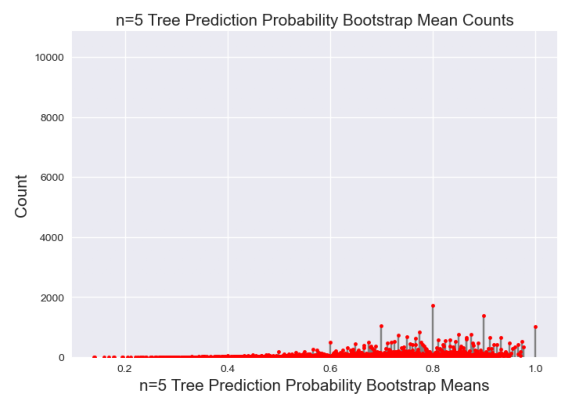

time: 144 ms (started: 2022-11-15 17:16:50 -08:00)


In [96]:
row_index = 0
dpi=100
figure_filename = '../reports/figures/figure_stratified_5_fold_cross_validation_random_forest_tree_n_5_prediction_probability_bootstrap_mean_count_row_index_'+ str(row_index) + '_dpi' + str(dpi) + '_v' + filename_version + '.png'

figure_filename_exists = os.path.isfile(figure_filename)
if figure_filename_exists == True:
    img = mpimg.imread(figure_filename)
    plt.figure(figsize=(10, 15))
    plt.grid(False)
    plt.axis('off')
    plt.imshow(img)

else:
    row_index = 0
    #plot distribution of predition probability bootstrap mean replicates
    x = df_estimator_prediction_probability_n_5_bootstrap_mean_number_of_replicates.T.loc[:, row_index].value_counts().index.tolist()
    y = df_estimator_prediction_probability_n_5_bootstrap_mean_number_of_replicates.T.loc[:, row_index].value_counts().values.tolist()

    markerline, stemlines, baseline = plt.stem(x, y, linefmt='grey', markerfmt='.', bottom=0, basefmt=' ')

    markerline.set_markerfacecolor('red')

    plt.xlabel("n=5 Tree Prediction Probability Bootstrap Means", fontsize = 15)
    plt.ylabel("Count", fontsize = 15)
    plt.title('n=5 Tree Prediction Probability Bootstrap Mean Counts', fontsize=15)
    plt.ylim([0,10850])
    df_estimator_prediction_probability_n_5_bootstrap_mean_number_of_replicates.T.loc[:, 0].value_counts().iloc[0:10]
    
    plt.savefig(figure_filename, bbox_inches='tight', dpi=dpi)
    plt.show()

#df_estimator_prediction_probability_n_5_bootstrap_mean_number_of_replicates.T.loc[:, 0].value_counts().iloc[0:10]



## Get Estimator Prediction Probability n=5 Bootstrap Mean Quantiles

In [97]:
#get standard quantile list for (integer confidence intervals) and make drops of 
quantile_standard_drop_list = [0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.95, 0.955, 0.96, 0.965, 0.97, 0.975, 0.98, 0.985, 0.99, 0.995, 1.0]
quantile_standard_list_adjusted = [index/(number_of_unique_quantiles_standard-1) for index in range(number_of_unique_quantiles_standard) if not index/(number_of_unique_quantiles_standard-1) in quantile_standard_drop_list]

#get 101 quantiles between quantile 0 and 5 quantile inclusive, then 101 quantiles between 95 and 100 inclusive
quantile_fringe_list_front = [round(index/(number_of_unique_quantiles_standard-1)/10, 5) for index in range(int(number_of_unique_quantiles_fringe/2))]
quantile_fringe_list_back = [round(.95 + index/(number_of_unique_quantiles_standard-1)/10, 5) for index in range(int(number_of_unique_quantiles_fringe/2))]

#combine quantiles
quantile_fringe_front_standard_adjusted_fringe_back_list = quantile_fringe_list_front + quantile_standard_list_adjusted + quantile_fringe_list_back


time: 952 µs (started: 2022-11-15 17:16:50 -08:00)


In [98]:
data_frame_filename = 'stratified_5_fold_cross_validation_random_forest_classifier_estimator_prediction_probability_bootstrap_mean_quantile_unique_' + str(len(quantile_fringe_front_standard_adjusted_fringe_back_list))  + '_from_replicates_' + str(number_of_bootstrap_replicates) +'_data_frame_v' + model_version + '.pkl'

data_frame_readback = icr.return_processed_data_file_if_it_exists(filename=data_frame_filename)
if data_frame_readback.empty == False:
    df_estimator_prediction_probability_bootstrap_mean_quantile = data_frame_readback
else:
    df_estimator_prediction_probability_bootstrap_mean_quantile = df_estimator_prediction_probability_n_5_bootstrap_mean_number_of_replicates.quantile(q=quantile_fringe_front_standard_adjusted_fringe_back_list, axis=1).T
   
    #save it
    df_estimator_prediction_probability_bootstrap_mean_quantile = icr.save_and_return_data_frame(df=df_estimator_prediction_probability_bootstrap_mean_quantile, filename=data_frame_filename)

column_name_dictionary = {string_quantile:float(string_quantile) for string_quantile in df_estimator_prediction_probability_bootstrap_mean_quantile.columns.to_list()}
df_estimator_prediction_probability_bootstrap_mean_quantile = df_estimator_prediction_probability_bootstrap_mean_quantile.rename(columns=column_name_dictionary)
p(df_estimator_prediction_probability_bootstrap_mean_quantile)


This file already exists
(10147, 381)


,0.0000,0.0005,0.0010,0.0015,0.0020,0.0025,0.0030,0.0035,0.0040,0.0045,0.0050,0.0055,0.0060,0.0065,0.0070,0.0075,0.0080,0.0085,0.0090,0.0095,0.0100,0.0105,0.0110,0.0115,0.0120,0.0125,0.0130,0.0135,0.0140,0.0145,0.0150,0.0155,0.0160,0.0165,0.0170,0.0175,0.0180,0.0185,0.0190,0.0195,0.0200,0.0205,0.0210,0.0215,0.0220,0.0225,0.0230,0.0235,0.0240,0.0245,0.0250,0.0255,0.0260,0.0265,0.0270,0.0275,0.0280,0.0285,0.0290,0.0295,0.0300,0.0305,0.0310,0.0315,0.0320,0.0325,0.0330,0.0335,0.0340,0.0345,0.0350,0.0355,0.0360,0.0365,0.0370,0.0375,0.0380,0.0385,0.0390,0.0395,0.0400,0.0405,0.0410,0.0415,0.0420,0.0425,0.0430,0.0435,0.0440,0.0445,0.0450,0.0455,0.0460,0.0465,0.0470,0.0475,0.0480,0.0485,0.0490,0.0495,0.0500,0.0550,0.0600,0.0650,0.0700,0.0750,0.0800,0.0850,0.0900,0.0950,0.1000,0.1050,0.1100,0.1150,0.1200,0.1250,0.1300,0.1350,0.1400,0.1450,0.1500,0.1550,0.1600,0.1650,0.1700,0.1750,0.1800,0.1850,0.1900,0.1950,0.2000,0.2050,0.2100,0.2150,0.2200,0.2250,0.2300,0.2350,0.2400,0.2450,0.2500,0.2550,0.2600,0.2650,0.2700,0.2750,0.2800,0.2850,0.2900,0.2950,0.3000,0.3050,0.3100,0.3150,0.3200,0.3250,0.3300,0.3350,0.3400,0.3450,0.3500,0.3550,0.3600,0.3650,0.3700,0.3750,0.3800,0.3850,0.3900,0.3950,0.4000,0.4050,0.4100,0.4150,0.4200,0.4250,0.4300,0.4350,0.4400,0.4450,0.4500,0.4550,0.4600,0.4650,0.4700,0.4750,0.4800,0.4850,0.4900,0.4950,0.5000,0.5050,0.5100,0.5150,0.5200,0.5250,0.5300,0.5350,0.5400,0.5450,0.5500,0.5550,0.5600,0.5650,0.5700,0.5750,0.5800,0.5850,0.5900,0.5950,0.6000,0.6050,0.6100,0.6150,0.6200,0.6250,0.6300,0.6350,0.6400,0.6450,0.6500,0.6550,0.6600,0.6650,0.6700,0.6750,0.6800,0.6850,0.6900,0.6950,0.7000,0.7050,0.7100,0.7150,0.7200,0.7250,0.7300,0.7350,0.7400,0.7450,0.7500,0.7550,0.7600,0.7650,0.7700,0.7750,0.7800,0.7850,0.7900,0.7950,0.8000,0.8050,0.8100,0.8150,0.8200,0.8250,0.8300,0.8350,0.8400,0.8450,0.8500,0.8550,0.8600,0.8650,0.8700,0.8750,0.8800,0.8850,0.8900,0.8950,0.9000,0.9050,0.9100,0.9150,0.9200,0.9250,0.9300,0.9350,0.9400,0.9450,0.9500,0.9505,0.9510,0.9515,0.9520,0.9525,0.9530,0.9535,0.9540,0.9545,0.9550,0.9555,0.9560,0.9565,0.9570,0.9575,0.9580,0.9585,0.9590,0.9595,0.9600,0.9605,0.9610,0.9615,0.9620,0.9625,0.9630,0.9635,0.9640,0.9645,0.9650,0.9655,0.9660,0.9665,0.9670,0.9675,0.9680,0.9685,0.9690,0.9695,0.9700,0.9705,0.9710,0.9715,0.9720,0.9725,0.9730,0.9735,0.9740,0.9745,0.9750,0.9755,0.9760,0.9765,0.9770,0.9775,0.9780,0.9785,0.9790,0.9795,0.9800,0.9805,0.9810,0.9815,0.9820,0.9825,0.9830,0.9835,0.9840,0.9845,0.9850,0.9855,0.9860,0.9865,0.9870,0.9875,0.9880,0.9885,0.9890,0.9895,0.9900,0.9905,0.9910,0.9915,0.9920,0.9925,0.9930,0.9935,0.9940,0.9945,0.9950,0.9955,0.9960,0.9965,0.9970,0.9975,0.9980,0.9985,0.9990,0.9995,1.0000
0,0.140000,0.283333,0.315556,0.333333,0.347380,0.355556,0.366667,0.373333,0.380000,0.386111,0.391667,0.398804,0.400000,0.405713,0.411111,0.414444,0.417778,0.420952,0.425000,0.426984,0.430000,0.433333,0.435556,0.438889,0.440000,0.442857,0.445000,0.447619,0.450000,0.451104,0.453333,0.455000,0.456662,0.458333,0.460712,0.462222,0.464286,0.466667,0.466667,0.468333,0.470000,0.472059,0.474046,0.475000,0.475952,0.477778,0.480000,0.480000,0.481107,0.483175,0.483889,0.485549,0.486111,0.487778,0.488889,0.490000,0.491111,0.491667,0.493333,0.494444,0.495000,0.496667,0.497778,0.499829,0.500000,0.500000,0.500000,0.501667,0.502778,0.503889,0.505556,0.506667,0.506667,0.508333,0.508889,0.510000,0.511111,0.511111,0.511657,0.513333,0.514286,0.514679,0.515397,0.516667,0.516667,0.517778,0.519048,0.519444,0.520000,0.520000,0.521429,0.522222,0.523333,0.524444,0.525000,0.525000,0.525714,0.526667,0.527778,0.528560,0.529286,0.536098,0.542222,0.549196,0.553333,0.558730,0.564286,0.568254,0.573333,0.577778,0.580952,0.586111,0.589286,0.593333,0.597778,0.600000,0.604444,0.608333,0.611111,0.614286,0.616667,0.620000,0.623333,0.626111,0.629841,0.632778,0.634286,0.637778,0.640000,0.642842,0.645000,0.647619,0.650000,0.652381,0.654762,0.656111,0.659744,0.661508,0.664286,0.666667,0.667222,0.670476,0.673333,0.675000,0.677042,0.678730,0.680000,0.68317

time: 827 ms (started: 2022-11-15 17:16:50 -08:00)


Text(0, 0.5, 'quantile')

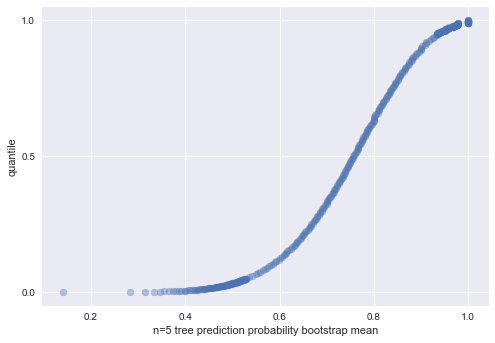

time: 82.6 ms (started: 2022-11-15 17:16:51 -08:00)


In [99]:
plt.scatter(x=df_estimator_prediction_probability_bootstrap_mean_quantile.iloc[0], y=df_estimator_prediction_probability_bootstrap_mean_quantile.columns, alpha=.4)
plt.yticks(ticks=[0, .5, 1])
plt.xlabel('n=5 tree prediction probability bootstrap mean')
plt.ylabel('quantile')

## Get Prediction Probability Bootstrap Mean Confidence Interval 'contain_touch_or_equal' decision threshold Or Suggests 'class1' or 'class0' Collection

In [100]:
#get confidence interval quantile pair list
index_median = int(len(quantile_fringe_front_standard_adjusted_fringe_back_list)/2)
confidence_interval_quantile_index_lower_upper = [[index_median-index, index_median+index] for index in range(index_median+1)]
column_name_list_confidence_interval_upper_lower_quantile_list = [[quantile_fringe_front_standard_adjusted_fringe_back_list[quantile] for quantile in quantile_lower_upper_list] for quantile_lower_upper_list in confidence_interval_quantile_index_lower_upper]

#get confidence interval list
confidence_interval_list = [round(column_name_list_confidence_interval_upper_lower_quantile_list[index][1] - column_name_list_confidence_interval_upper_lower_quantile_list[index][0], 4) for index in range(len(column_name_list_confidence_interval_upper_lower_quantile_list))]

#get number of confidence intervals
number_of_confidence_intervals = len(column_name_list_confidence_interval_upper_lower_quantile_list)

pl(confidence_interval_list)

191


[0.0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35,
 0.36,
 0.37,
 0.38,
 0.39,
 0.4,
 0.41,
 0.42,
 0.43,
 0.44,
 0.45,
 0.46,
 0.47,
 0.48,
 0.49,
 0.5,
 0.51,
 0.52,
 0.53,
 0.54,
 0.55,
 0.56,
 0.57,
 0.58,
 0.59,
 0.6,
 0.61,
 0.62,
 0.63,
 0.64,
 0.65,
 0.66,
 0.67,
 0.68,
 0.69,
 0.7,
 0.71,
 0.72,
 0.73,
 0.74,
 0.75,
 0.76,
 0.77,
 0.78,
 0.79,
 0.8,
 0.81,
 0.82,
 0.83,
 0.84,
 0.85,
 0.86,
 0.87,
 0.88,
 0.89,
 0.9,
 0.901,
 0.902,
 0.903,
 0.904,
 0.905,
 0.906,
 0.907,
 0.908,
 0.909,
 0.91,
 0.911,
 0.912,
 0.913,
 0.914,
 0.915,
 0.916,
 0.917,
 0.918,
 0.919,
 0.92,
 0.921,
 0.922,
 0.923,
 0.924,
 0.925,
 0.926,
 0.927,
 0.928,
 0.929,
 0.93,
 0.931,
 0.932,
 0.933,
 0.934,
 0.935,
 0.936,
 0.937,
 0.938,
 0.939,
 0.94,
 0.941,
 0.942,
 0.943,
 0.944,
 0.945,
 0.946,
 0.947,
 

time: 6.74 ms (started: 2022-11-15 17:16:51 -08:00)


In [101]:
number_of_decision_thresholds = 101
decision_threshold_list = [number/100 for number in range(number_of_decision_thresholds)]

pl(decision_threshold_list)

101


[0.0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35,
 0.36,
 0.37,
 0.38,
 0.39,
 0.4,
 0.41,
 0.42,
 0.43,
 0.44,
 0.45,
 0.46,
 0.47,
 0.48,
 0.49,
 0.5,
 0.51,
 0.52,
 0.53,
 0.54,
 0.55,
 0.56,
 0.57,
 0.58,
 0.59,
 0.6,
 0.61,
 0.62,
 0.63,
 0.64,
 0.65,
 0.66,
 0.67,
 0.68,
 0.69,
 0.7,
 0.71,
 0.72,
 0.73,
 0.74,
 0.75,
 0.76,
 0.77,
 0.78,
 0.79,
 0.8,
 0.81,
 0.82,
 0.83,
 0.84,
 0.85,
 0.86,
 0.87,
 0.88,
 0.89,
 0.9,
 0.91,
 0.92,
 0.93,
 0.94,
 0.95,
 0.96,
 0.97,
 0.98,
 0.99,
 1.0]

time: 2.98 ms (started: 2022-11-15 17:16:51 -08:00)


## Get Classification by Stratified 5-Fold Cross Validation Random Forest Classifier decision threshold and n=5 Tree Prediction Probability Bootstrap Mean Confidence Interval as Data Frame Collection

In [ ]:
data_frame_collection_filename = 'stratified_5_fold_cross_validation_random_forest_classifier_estimator_prediction_probability_bootstrap_mean_confidence_interval_unique_' + str(number_of_confidence_intervals)  + '_decision_threshold_unique_' + str(number_of_decision_thresholds) + '_votes_class1_class0_neither_from_replicates_' + str(number_of_bootstrap_replicates) + '_data_frame_collection_v' + model_version + '.pkl'

confidence_interval_decision_threshold_class1_class0_neither_data_frame_collection = {}

data_frame_collection_readback = icr.return_processed_collection_if_it_exists(filename=data_frame_collection_filename)
if data_frame_collection_readback != None:
    confidence_interval_decision_threshold_class1_class0_neither_data_frame_collection = data_frame_collection_readback
else:
    for decision_threshold in decision_threshold_list:
        column_name_list_prediction_probability_confidence_interval_number_outside_of_threshold = []
        for confidence_interval_lower_upper_quantile_list_index in range(number_of_confidence_intervals):
            #initialize variables
            column_name_lower_limit = column_name_list_confidence_interval_upper_lower_quantile_list[confidence_interval_lower_upper_quantile_list_index][0]
            column_name_upper_limit = column_name_list_confidence_interval_upper_lower_quantile_list[confidence_interval_lower_upper_quantile_list_index][1]
            
            #?????
            if (confidence_interval_list[confidence_interval_lower_upper_quantile_list_index] != 1.0) & (decision_threshold != 1.0):
                print('hey1')
                prediction_probability_confidence_interval_number_outside_of_threshold = 'prediction_probability_confidence_interval_0dot' + str(confidence_interval_list[confidence_interval_lower_upper_quantile_list_index])[2:] + '_outside_of_0dot' + str(decision_threshold)[2:]
            elif (confidence_interval_list[confidence_interval_lower_upper_quantile_list_index] == 1.0) & (decision_threshold != 1.0):
                print('hey2')
                prediction_probability_confidence_interval_number_outside_of_threshold = 'prediction_probability_confidence_interval_1dot0_outside_of_0dot' + str(decision_threshold)[2:]
            elif (confidence_interval_list[confidence_interval_lower_upper_quantile_list_index] != 1.0) & (decision_threshold == 1.0):
                print('hey3')
                prediction_probability_confidence_interval_number_outside_of_threshold = 'prediction_probability_confidence_interval_' + str(confidence_interval_list[confidence_interval_lower_upper_quantile_list_index])[2:] + '_outside_of_1dot0'
            elif (confidence_interval_list[confidence_interval_lower_upper_quantile_list_index] == 1.0) & (decision_threshold == 1.0):
                print('hey4')
                prediction_probability_confidence_interval_number_outside_of_threshold = 'prediction_probability_confidence_interval_1dot0_outside_of_1dot0'
                
            #predict class 1 yes or predict no
            df_estimator_prediction_probability_bootstrap_mean_quantile\
            .loc[(df_estimator_prediction_probability_bootstrap_mean_quantile.loc[:, column_name_lower_limit] > decision_threshold) &\
                 (df_estimator_prediction_probability_bootstrap_mean_quantile.loc[:, column_name_upper_limit] > decision_threshold), \
            prediction_probability_confidence_interval_number_outside_of_threshold] = 'class1'

            df_estimator_prediction_probability_bootstrap_mean_quantile\
            .loc[(df_estimator_prediction_probability_bootstrap_mean_quantile.loc[:, column_name_lower_limit] < decision_threshold) &\
                 (df_estimator_prediction_probability_bootstrap_mean_quantile.loc[:, column_name_upper_limit] < decision_threshold), \
            prediction_probability_confidence_interval_number_outside_of_threshold] = 'class0'

            df_estimator_prediction_probability_bootstrap_mean_quantile\
            .loc[(df_estimator_prediction_probability_bootstrap_mean_quantile.loc[:, column_name_lower_limit] <= decision_threshold) &\
                 (df_estimator_prediction_probability_bootstrap_mean_quantile.loc[:, column_name_upper_limit] >= decision_threshold), \
            prediction_probability_confidence_interval_number_outside_of_threshold] = 'contain_touch_or_equal'

            column_name_list_prediction_probability_confidence_interval_number_outside_of_threshold += [prediction_probability_confidence_interval_number_outside_of_threshold]
        confidence_interval_decision_threshold_class1_class0_neither_data_frame_collection[str(decision_threshold)+'_decision_threshold'] = df_estimator_prediction_probability_bootstrap_mean_quantile.loc[:, column_name_list_prediction_probability_confidence_interval_number_outside_of_threshold]

    del df_estimator_prediction_probability_bootstrap_mean_quantile
    
    #save it
    confidence_interval_decision_threshold_class1_class0_neither_data_frame_collection = icr.save_and_return_collection(data_frame_collection=confidence_interval_decision_threshold_class1_class0_neither_data_frame_collection, filename=data_frame_collection_filename)


p(confidence_interval_decision_threshold_class1_class0_neither_data_frame_collection['0.1_decision_threshold'])


hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey2
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1


hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey2
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1


hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey2
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1


hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey2
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1


hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey2
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1
hey1


In [ ]:
## Get Stratified 5-Fold Cross Validation Prediction Probability Confidence Interval Classification By Decision Threshold Collection

In [ ]:
build_save_return = True

if build_save_return == False:
    Y_predicted_Y_actual_prediction_probability_bootstrap_mean_confidence_interval_decision_threshold_suggests_class_1_0_neither_collection = {}
    
    for collection_key in confidence_interval_decision_threshold_class1_class0_neither_data_frame_collection.keys():
        data_frame_list = [df_stratified_fold_number_y_test.reset_index(drop=True), \
                           confidence_interval_decision_threshold_class1_class0_neither_data_frame_collection[collection_key].reset_index(drop=True)]

        Y_predicted_Y_actual_prediction_probability_bootstrap_mean_confidence_interval_decision_threshold_suggests_class_1_0_neither_collection[collection_key] = pd.concat(data_frame_list, axis=1)

        #replace class1 -> 1, otherwise -> 0
        Y_predicted_Y_actual_prediction_probability_bootstrap_mean_confidence_interval_decision_threshold_suggests_class_1_0_neither_collection[collection_key].replace({'class1':1, 'class0':0, 'contain_touch_or_equal':0})

else:    
    data_frame_collection_filename = 'stratified_5_fold_cross_validation_random_forest_classifier_estimator_prediction_probability_bootstrap_mean_confidence_interval_unique' + str(number_of_confidence_intervals)  + 'decision_threshold_unique_' + str(number_of_decision_thresholds) + '_votes_1_0_from_replicates_' + str(number_of_bootstrap_replicates) + '_with_y_actual_data_frame_collection_v' + model_version + '.pkl'

    data_frame_collection_readback = icr.return_processed_collection_if_it_exists(filename=data_frame_collection_filename)
    if data_frame_collection_readback != None:
        Y_predicted_Y_actual_prediction_probability_bootstrap_mean_confidence_interval_decision_threshold_suggests_class_1_0_neither_collection = data_frame_collection_readback
    else:
        Y_predicted_Y_actual_prediction_probability_bootstrap_mean_confidence_interval_decision_threshold_suggests_class_1_0_neither_collection = {}
        for collection_key in confidence_interval_decision_threshold_class1_class0_neither_data_frame_collection.keys():
            data_frame_list = [df_stratified_fold_number_y_test.reset_index(drop=True), \
                               confidence_interval_decision_threshold_class1_class0_neither_data_frame_collection[collection_key].reset_index(drop=True)]

            Y_predicted_Y_actual_prediction_probability_bootstrap_mean_confidence_interval_decision_threshold_suggests_class_1_0_neither_collection[collection_key] = pd.concat(data_frame_list, axis=1)

            #replace class1 -> 1, otherwise -> 0
            Y_predicted_Y_actual_prediction_probability_bootstrap_mean_confidence_interval_decision_threshold_suggests_class_1_0_neither_collection[collection_key] = Y_predicted_Y_actual_prediction_probability_bootstrap_mean_confidence_interval_decision_threshold_suggests_class_1_0_neither_collection[collection_key].replace({'class1':1, 'class0':0, 'contain_touch_or_equal':0})

        #save it
        Y_predicted_Y_actual_prediction_probability_bootstrap_mean_confidence_interval_decision_threshold_suggests_class_1_0_neither_collection = icr.save_and_return_collection(data_frame_collection=Y_predicted_Y_actual_prediction_probability_bootstrap_mean_confidence_interval_decision_threshold_suggests_class_1_0_neither_collection, filename=data_frame_collection_filename)

    
#del confidence_interval_decision_threshold_class1_class0_neither_data_frame_collection
p(Y_predicted_Y_actual_prediction_probability_bootstrap_mean_confidence_interval_decision_threshold_suggests_class_1_0_neither_collection['0.1_decision_threshold'])


In [ ]:
# print(classification_report(y_true=df_Y_predicted_Y_actual_prediction_probability_bootstrap_mean_confidence_interval_suggests_class_1_0_neither.loc[:, 'Y'], 
#                             y_pred=df_Y_predicted_Y_actual_prediction_probability_bootstrap_mean_confidence_interval_suggests_class_1_0_neither.loc[:, 'Y_predicted']))


# #f1 accuracy??? why two rows for precision??? under the assumption 0 or 1 is a positive class?

# #f1 score and accuracy relationship???

In [ ]:
#get no-skill line of precision-recall curve

no_skill_line = \
Y_predicted_Y_actual_prediction_probability_bootstrap_mean_confidence_interval_decision_threshold_suggests_class_1_0_neither_collection['0.1_decision_threshold'].loc[:, 'Y'].value_counts()[1] / \
Y_predicted_Y_actual_prediction_probability_bootstrap_mean_confidence_interval_decision_threshold_suggests_class_1_0_neither_collection['0.1_decision_threshold'].loc[:, 'Y'].value_counts()[0]

no_skill_line

#correctness????????



In [ ]:
#make data frame from running for loop on confidence intervals

#get stats for model with different prediction probability bootstrap mean confidence intervals

#get stats for model with different confidence intervals

In [ ]:
column_name_list = ['precision',
                    'accuracy',
                    'recall',
                    'f1_score',
                    'specificity',
                    'false_positive_rate',
                    'true_positives', 
                    'false_positives', 
                    'false_negatives', 
                    'true_negatives']
column_name_dictionary={index:column_name_list[index] for index in range(len(column_name_list))}
pdc(column_name_dictionary)

In [ ]:
proportion_decision_threshold_list = list(Y_predicted_Y_actual_prediction_probability_bootstrap_mean_confidence_interval_decision_threshold_suggests_class_1_0_neither_collection.keys())
pl(proportion_decision_threshold_list)

In [ ]:
df_confidence_interval_proportion_decision_threshold_metric_results_collection = {}

for proportion_decision_threshold in proportion_decision_threshold_list:
    values_list_collection = {}

    column_name_list_not_Y = [column_name for column_name in Y_predicted_Y_actual_prediction_probability_bootstrap_mean_confidence_interval_decision_threshold_suggests_class_1_0_neither_collection[proportion_decision_threshold].columns if not 'Y' == column_name]

    y_true=Y_predicted_Y_actual_prediction_probability_bootstrap_mean_confidence_interval_decision_threshold_suggests_class_1_0_neither_collection[proportion_decision_threshold].loc[:, 'Y']

    for column_name in column_name_list_not_Y:
        y_pred=Y_predicted_Y_actual_prediction_probability_bootstrap_mean_confidence_interval_decision_threshold_suggests_class_1_0_neither_collection[proportion_decision_threshold].loc[:, column_name]


        precision = precision_score(y_true=y_true, y_pred=y_pred)
        accuracy = accuracy_score(y_true=y_true, y_pred=y_pred)
        recall = recall_score(y_true=y_true, y_pred=y_pred)
        f1_score_ = f1_score(y_true=y_true, y_pred=y_pred)

        true_negatives, false_positives, false_negatives, true_positives = confusion_matrix(y_true=y_true, y_pred=y_pred).ravel()

        specificity = true_negatives / (true_negatives + false_positives)

        false_positive_rate = 1 - specificity

        values_list_collection[column_name] = [precision, accuracy, recall, f1_score_, specificity, false_positive_rate, true_positives, false_positives, false_negatives, true_negatives]

    df_confidence_interval_proportion_decision_threshold_metric_results_collection[proportion_decision_threshold] = pd.DataFrame(values_list_collection).T
    df_confidence_interval_proportion_decision_threshold_metric_results_collection[proportion_decision_threshold] = df_confidence_interval_proportion_decision_threshold_metric_results_collection[proportion_decision_threshold].rename(columns=column_name_dictionary)

p(df_confidence_interval_proportion_decision_threshold_metric_results_collection['0.3_decision_threshold'])

In [ ]:
f1_score_max_collection = {}
for proportion_decision_threshold in proportion_decision_threshold_list:
    f1_score_max_collection[proportion_decision_threshold] = df_confidence_interval_proportion_decision_threshold_metric_results_collection[proportion_decision_threshold].loc[:, 'f1_score'].max()
    
    

In [ ]:
df_f1_score_max_per_proportion_decision_threshold = pd.Series(f1_score_max_collection).to_frame()
p(df_f1_score_max_per_proportion_decision_threshold)

In [ ]:
df_f1_score_max_per_proportion_decision_threshold.max().values[0]

In [ ]:
df_f1_score_max_per_proportion_decision_threshold.hist()

In [ ]:
df_f1_score_max_per_proportion_decision_threshold.loc[df_f1_score_max_per_proportion_decision_threshold.loc[:, 0] > .795, 0].hist(bins=400)

In [ ]:
#try getting top 5-10% of f1 scores per decision threshold???


In [ ]:
plt.scatter(df_confidence_interval_proportion_decision_threshold_metric_results_collection['0.5_decision_threshold'].loc[:, 'false_positive_rate'], 
            df_confidence_interval_proportion_decision_threshold_metric_results_collection['0.5_decision_threshold'].loc[:, 'recall'],
            color='gold',
            s=2.5,
            marker='o',
            linewidths=12)

plt.ylabel('Recall', size=12)
plt.xlabel('False Positive Rate', size=12)

plt.title('Recall vs. False Positive Rate', size=14)



In [ ]:
Audio(sound_file, autoplay=True)

In [ ]:
#roc curve by confidence interval instead of threshold?????

In [ ]:
df_confidence_interval_proportion_decision_threshold_metric_results_collection['0.5_decision_threshold']

In [ ]:
# plt.scatter(data=df_confidence_interval_proportion_decision_threshold_metric_results_collection['0.5_decision_threshold'],
#             x='row_count_prediction_probability_bootstrap_mean_confidence_interval_filtered_in_vehicle_coupon_recommendation_filtered', 
#             y='precision')
# plt.xlabel('Number of In-Vehicle Coupon Recommendations Retained')
# plt.ylabel('Precision')

In [ ]:
# plt.scatter(data=df_prediction_probability_n_5_bootstrap_mean_confidence_interval_results,
#             x='row_count_percentage_in_vehicle_coupon_accepted_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered', 
#             y='recall')
# plt.xlabel('Proportion of In-Vehicle Coupon Would Be Acceptors Retained')
# plt.ylabel('Recall')

In [ ]:
#10 more confidence intervals between last 2 confidene intervals

#

In [ ]:
#how to get more n=5 bootstrap mean quantile resolution without adding too much computational cost???

In [ ]:
# plt.scatter(data=df_prediction_probability_n_5_bootstrap_mean_confidence_interval_results,
#             x='row_count_in_vehicle_coupon_accepted_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered', 
#             y='recall')
# plt.xlabel('Number of In-Vehicle Coupon Would Be Acceptors Retained')
# plt.ylabel('Recall')

In [ ]:
#get confidence interval and classification threshold combinations. And then collect metrics recall, precision
#and f1 score.
    #use precision-recall curve function?
    
    #use random forest classifier object prediction with adjusted threshold???
    
    #online source??
    
    #manually program predictions by prediction probability, decision threshold, and confidence interval???
    
    

In [ ]:
data_frame_collection['Y_train'].loc[:, 'Y']

In [ ]:
#precision-recall curve function??


#calculate precision-recall points
random_forest_classifier_precision_array, random_forest_classifier_recall_array, _ = \
precision_recall_curve(y_true=data_frame_collection['Y_train'].loc[:, 'Y'],
                       probas_pred=stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['random_forest_classifier'])

#calculate f1 score
random_forest_classifier_f1_score = f1_score(data_frame_collection['Y_train'].loc[:, 'Y'], stratified_5_fold_cross_validation_model_classifier_prediction_data_frame_collection['random_forest_classifier'])
print('Random Forest: f1=%.3f' % (random_forest_classifier_f1_score))


#calculate no skill classifier line
no_skill_classifier_auc = data_frame_collection['Y_train'].loc[data_frame_collection['Y_train'].loc[:, 'Y']==1, 'Y'].shape[0] / data_frame_collection['Y_train'].loc[:, 'Y'].shape[0]







In [ ]:
def f1_score_calculated_by_precision_recall(precision, recall):
    f1_score = 2*precision*recall/(precision+recall)
    
    return f1_score

In [ ]:
#how is precision_recall_curve calculated???

In [ ]:
len(random_forest_classifier_precision_array)

#precision_recall_curve uses just a sliding decision threshold, but we want a combination of decision threshold and confidence interval



In [ ]:
data_frame_collection['Y_train'].shape

In [ ]:
stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['random_forest_classifier'].shape

In [ ]:
stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['random_forest_classifier'].drop_duplicates().shape

#41 duplicate prediction probabilties??

In [ ]:
f1_score_array = f1_score_calculated_by_precision_recall(random_forest_classifier_precision_array, random_forest_classifier_recall_array)
plt.hist(f1_score_array)

In [ ]:
df_f1_score_precision_recall = \
pd.DataFrame({'f1_score':f1_score_array, 
              'precision':random_forest_classifier_precision_array, 
              'recall':random_forest_classifier_recall_array})

p(df_f1_score_precision_recall)

In [ ]:
df_f1_score_precision_recall.loc[:, 'f1_score'].max() #very slightly improved f1 score, but an inprovement nonetheless 

In [ ]:
df_f1_score_precision_recall.sort_values('f1_score') #very slightly improved f1 score, but an inprovement nonetheless 

#^---- what threshold is this???


In [ ]:
#threshold approximation???
2802 / 10077


In [ ]:
plt.scatter(x=random_forest_classifier_recall_array, 
            y=random_forest_classifier_precision_array,)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Precision vs. Recall')


In [ ]:
#if this was ground truth, then would expect a conversion rate of approximately .56 of (assumption) customers
#engaged in the coupon recommendation (of which we have demographic data on). don't have a model for customers,
#we don't have demographic data on... 
#possible future work model??


#but this is survey data, so we are saying that the survey data suggests, that of in-vehicle coupon recommendation
#scenarios (with  very incomplete knowledge of the selection process), we expected approximately a 56% coupon acceptance rate.






In [ ]:
#want to slide the decision threshold from 0 to 1

In [ ]:
#A prediction interval does not make sense for a categorical outcome (you could do a prediction set rather than an interval,
#but most of the time it would probably not be very informative).

#https://stats.stackexchange.com/questions/56895/do-the-predictions-of-a-random-forest-model-have-a-prediction-interval


In [ ]:
stratified_5_fold_cross_validation_random_forest_classifier_collection['fold 0']

In [ ]:
#random forst classifier takes a vote from trees for prediction, not taking the average tree prediction probabilties and make a prediction.

#^--- how does this influence decision going forward????

#this can explain difference in f1 score between model and prediction probabilities with .5 decision threshold

#try n=5 bootstrap sampling tree estimator predicitons instead of prediction probabilties?????

#prediction probabilty with .5 decision threshold performs basically the same as and random forst model f1-score

#therefore, the next thing to try is take decision threshold with confidence intervals for measurement of good recall or precision options



In [ ]:
#random forest prediction probability is average of tree prediction probabilties or average of tree class votes???

In [ ]:
#ROC curve for difference filters????


In [ ]:
#plot precision vs percentage of sample with data on

#but why do we care about the individuals who we don't want to recommend a coupon to???

In [ ]:
#plot precision vs percentage of sample considered for in-vehicle coupon recommendation

<font size="5"><a id='[Modeling_2]'></a> </font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_1_Confidence_Interval](#[Modeling_1_Confidence_Interval])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_3](#[Modeling_3])</font> <font size="2">[Results](#[Results])</font>

<font size="6"><a id='[Modeling_2]'>**Modeling 2**</a> </font>

## Get Gradient Boosting Classifier Stratified 5-Fold Grid Seach Cross Validation

In [ ]:
#good split for gradient boosting classifier??? what does the learning curve say???

#get grid search stratified 5-fold cross validation results
models_readback = icr.return_saved_model_if_it_exists(filename=grid_search_models_filename_collection['gradient_boosting_classifier'])
if models_readback != None:
    stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier = models_readback
else:
    gradient_boosting_classifier = GradientBoostingClassifier(random_state=200)
    param_grid = {'loss' : ['log_loss', 'exponential'],
                  'learning_rate' : [0.01, 0.1, 1, 10, 100],
                  'n_estimators' : [5, 50, 250, 500],
                  'subsample' : [1.0],
                  'criterion' : ['friedman_mse', 'squared_error'],
                  'min_samples_split' : [2],
                  'min_samples_leaf' : [1],
                  'min_weight_fraction_leaf' : [0.0],
                  'max_depth' : [1, 3, 5, 7, 9, None],
                  'min_impurity_decrease' : [0.0],
                  'init' : [None],
                  'max_features' : [None],
                  'max_leaf_nodes' : [None],
                  'warm_start' : [False],
                  'n_iter_no_change' : [None],
                 }

    #https://www.datasciencelearner.com/gradient-boosting-hyperparameters-tuning/

    # Instantiate the Stratified 5-Fold Grid Search Cross Validation
    stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier = GridSearchCV(estimator=gradient_boosting_classifier, 
                                                                                               param_grid=param_grid, 
                                                                                               cv=StratifiedKFold_5_splits,
                                                                                               n_jobs=-1, 
                                                                                               verbose=0,
                                                                                               scoring=None,
                                                                                               pre_dispatch="2*n_jobs")

    stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.fit(X=data_frame_collection['X_train'], 
                                                                                    y=data_frame_collection['Y_train'].loc[:, 'Y'],
                                                                                    groups=None)


    #save it
    stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier = icr.save_and_return_model(stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier, 
                                                                                                             filename=grid_search_models_filename_collection['gradient_boosting_classifier'],
                                                                                                             add_compressed_file=False)
    
stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier


In [ ]:
#time: 28min 1s (started: 2022-11-08 23:53:21 -08:00)

#better hyperparameter selection???

#XGboost to improve run time?????


## Get Best Gradient Boosting Classifier by Score

In [ ]:
model_readback = icr.return_saved_model_if_it_exists(filename=model_filename_collection['gradient_boosting_classifier'])
if model_readback != None:
    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier = model_readback
else:   
    #add model environment data to model

    #get best random forest classifier from grid search cross validation
    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier = stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.best_estimator_

    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.version = model_version
    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.pandas_version = pd.__version__
    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.numpy_version = np.__version__
    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.sklearn_version = sklearn_version
    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.X_columns = [column_name for column_name in data_frame_collection['X_train'].columns]
    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.build_datetime = datetime.datetime.now()    

    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier = icr.save_and_return_model(best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier, 
                                                                                                                  filename=model_filename_collection['gradient_boosting_classifier'],
                                                                                                                  add_compressed_file=False)
    
best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier


## Best Gradient Boosting Classifier Stratified 5-Fold Cross Validation Scores

In [ ]:
#cross validate for best parameters
data_collection_readback = icr.return_processed_collection_if_it_exists(filename=model_cross_validation_results_filename_collection['gradient_boosting_classifier'])
if data_collection_readback != None:
    best_gradient_boosting_classifier_stratified_5_fold_cross_validation_results = data_collection_readback
else:
    scoring = {'accuracy' : make_scorer(accuracy_score), 
               'precision' : make_scorer(precision_score),
               'recall' : make_scorer(recall_score), 
               'f1_score' : make_scorer(f1_score)}

    gradient_boosting_classifier = GradientBoostingClassifier(criterion='squared_error',
                                                              loss='exponential',
                                                              learning_rate = 0.1, 
                                                              max_depth = 9, 
                                                              n_estimators = 250,
                                                              random_state=200,
                                                              subsample=1.0,
                                                              min_samples_split=2,
                                                              min_samples_leaf=1,
                                                              min_weight_fraction_leaf=0.0,
                                                              min_impurity_decrease=0.0,
                                                              init=None,
                                                              max_features=None,
                                                              verbose=0,
                                                              max_leaf_nodes=None,
                                                              warm_start=False,
                                                              n_iter_no_change=None)

#     GradientBoostingClassifier(criterion='squared_error', loss='exponential',
#                            max_depth=9, n_estimators=250, random_state=200)



    
    best_gradient_boosting_classifier_stratified_5_fold_cross_validation_results = cross_validate(estimator=gradient_boosting_classifier, 
                                                                                                  X=data_frame_collection['X_train'], 
                                                                                                  y=data_frame_collection['Y_train'], 
                                                                                                  groups=None, 
                                                                                                  scoring=scoring, 
                                                                                                  cv=StratifiedKFold_5_splits, 
                                                                                                  n_jobs=None, verbose=0, 
                                                                                                  fit_params=None, 
                                                                                                  pre_dispatch='2*n_jobs', 
                                                                                                  return_train_score=False, 
                                                                                                  return_estimator=False, 
                                                                                                  error_score=np.nan)
    
    
    
    #save it
    best_gradient_boosting_classifier_stratified_5_fold_cross_validation_results = icr.save_and_return_collection(best_gradient_boosting_classifier_stratified_5_fold_cross_validation_results, 
                                                                                                                  filename=model_cross_validation_results_filename_collection['gradient_boosting_classifier'])
    
    
model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier'] = best_gradient_boosting_classifier_stratified_5_fold_cross_validation_results
model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']

In [ ]:
model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['fit_time_sum'] = \
model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['fit_time'].sum()

model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['score_time_sum'] = \
model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['score_time'].sum()

model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['fit_time_score_time_sum'] = \
model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['fit_time_sum'] + \
model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['score_time_sum']

model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['fit_time_mean'] = \
model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['fit_time'].mean()

model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['score_time_mean'] = \
model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['score_time'].mean()

model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['test_precision_mean'] = \
model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['test_precision'].mean()

model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['test_recall_mean'] = \
model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['test_recall'].mean()

model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['test_f1_score_mean'] = \
model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['test_f1_score'].mean()

model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['test_accuracy_mean'] = \
model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['test_accuracy'].mean()


In [ ]:
print("model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['test_precision_mean']: " + str(model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['test_precision_mean']))
print("model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['test_recall_mean']: " + str(model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['test_recall_mean']))
print("model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['test_f1_score_mean']: " + str(model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['test_f1_score_mean']))
print("model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['test_accuracy_mean']: " + str(model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['test_accuracy_mean']))



## Get Stratified 5-Fold Cross Validation Gradient Boosting Classifier Collection

In [ ]:
models_readback = icr.return_saved_model_if_it_exists(filename=cross_validation_model_collection_filename_collection['gradient_boosting_classifier'])
if models_readback != None:
    stratified_5_fold_cross_validation_gradient_boosting_classifier_collection = models_readback
else:
    stratified_5_fold_cross_validation_gradient_boosting_classifier_collection = {}
    for index in range(5):

        #create gradient boosting classifier
        gradient_boosting_classifier = GradientBoostingClassifier(criterion='squared_error',
                                                                  loss='exponential',
                                                                  learning_rate = 0.1, 
                                                                  max_depth = 9, 
                                                                  n_estimators = 250,
                                                                  random_state=200,
                                                                  subsample=1.0,
                                                                  min_samples_split=2,
                                                                  min_samples_leaf=1,
                                                                  min_weight_fraction_leaf=0.0,
                                                                  min_impurity_decrease=0.0,
                                                                  init=None,
                                                                  max_features=None,
                                                                  verbose=0,
                                                                  max_leaf_nodes=None,
                                                                  warm_start=False,
                                                                  n_iter_no_change=None)

        
        #train gradient boosting classifier and save gradient boosting classifer per fold
        gradient_boosting_classifier.fit(X=stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['X_train'],
                                         y=stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['Y_train'])

        stratified_5_fold_cross_validation_gradient_boosting_classifier_collection['fold ' + str(index)] = gradient_boosting_classifier


    #save stratified 5-fold cross validation gradient boosting classifier collection
    stratified_5_fold_cross_validation_gradient_boosting_classifier_collection = icr.save_and_return_model(stratified_5_fold_cross_validation_gradient_boosting_classifier_collection, 
                                                                                                           filename=cross_validation_model_collection_filename_collection['gradient_boosting_classifier'])
stratified_5_fold_cross_validation_gradient_boosting_classifier_collection


## Get Stratified 5-Fold Cross Validation Gradient Boosting Classifier Prediction Probability Collection

In [ ]:
prediction_probability_ndarray_collection = icr.return_processed_collection_if_it_exists(filename=model_cross_validation_prediction_probability_collection_filename_collection['gradient_boosting_classifier'])
if prediction_probability_ndarray_collection != None:
    stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability_collection = prediction_probability_ndarray_collection
else:
    stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability_collection = {}
    for index in range(5):
        #get predictions for test per fold
        stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability_collection['fold ' + str(index)] = \
        stratified_5_fold_cross_validation_gradient_boosting_classifier_collection['fold ' + str(index)]\
        .predict_proba(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['X_test'])
    

    #save stratified 5-fold cross validation random forest classifier prediction probability collection
    stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability_collection = icr.save_and_return_collection(data_frame_collection=stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability_collection, 
                                                                                                                                   filename=model_cross_validation_prediction_probability_collection_filename_collection['gradient_boosting_classifier'])
stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability_collection['fold 0']


## Get Stratified 5-Fold Cross Validation Gradient Boosting Classifier Prediction Probability Data Frame

In [ ]:
#get data frame list
data_frame_list_stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability = \
[pd.DataFrame(stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability_collection['fold ' + str(number)]).loc[:, 1] for number in range(5)]

stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['gradient_boosting_classifier'] = \
pd.concat(data_frame_list_stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability)

p(stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['gradient_boosting_classifier'])



In [ ]:
model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['roc_auc'] = \
roc_auc_score(data_frame_collection['Y_train'], 
              stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['gradient_boosting_classifier'])

model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['roc_auc']


In [ ]:
#get log loss of gradient boosting clasifier
model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['log_loss'] = \
log_loss(y_true=data_frame_collection['Y_train'],
         y_pred=stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['gradient_boosting_classifier'])

model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['log_loss']


In [ ]:
model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['brier_score_loss'] = \
brier_score_loss(y_true=data_frame_collection['Y_train'],
                 y_prob=stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['gradient_boosting_classifier'])

model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['brier_score_loss']


## Gradient Boosting Classifier Stratified 5-Fold Cross Validation Prediction Collection

In [ ]:
prediction_ndarray_collection = icr.return_processed_collection_if_it_exists(filename=model_cross_validation_prediction_collection_filename_collection['gradient_boosting_classifier'])
if prediction_ndarray_collection != None:
    stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_collection = prediction_ndarray_collection
else:
    stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_collection = {}
    for index in range(5):
        #get predictions for test per fold
        stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_collection['fold ' + str(index)] = \
        stratified_5_fold_cross_validation_gradient_boosting_classifier_collection['fold ' + str(index)]\
        .predict(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['X_test'])
    
    #save stratified 5-fold cross validation gradient boosting classifier prediction collection
    stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_collection = icr.save_and_return_collection(data_frame_collection=stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_collection, 
                                                                                                                           filename=model_cross_validation_prediction_collection_filename_collection['gradient_boosting_classifier'])
stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_collection['fold 0']


In [ ]:
stratified_5_fold_cross_validation_model_classifier_prediction_data_frame_collection['gradient_boosting_classifier'] = \
icr.get_data_frame_from_collection(collection_name=stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_collection,
                                   column_name='Y_predicted')

p(stratified_5_fold_cross_validation_model_classifier_prediction_data_frame_collection['gradient_boosting_classifier'])



<font size="5"><a id='[Modeling_3]'></a> </font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_1_Confidence_Interval](#[Modeling_1_Confidence_Interval])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_3](#[Modeling_3])</font> <font size="2">[Results](#[Results])</font>

<font size="6"><a id='[Modeling_3]'>**Modeling 3**</a> </font>

## Get Logistic Regression Classifier Stratified 5-Fold Grid Search Cross Validation

In [ ]:
models_readback = icr.return_saved_model_if_it_exists(filename=grid_search_models_filename_collection['logistic_regression_classifier'],)
if models_readback != None:
    stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier = models_readback
else:
    param_grid = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
                  'dual': [False],
                  'tol':[1e-4],
                  'C':[1.0],
                  'fit_intercept':[True],
                  'intercept_scaling':[1],
                  'class_weight':['balanced', None],
                  'random_state':[None],
                  'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                  'max_iter':[1, 10, 100, 1000],
                  'multi_class':['auto'],
                  'verbose':[0],
                  'warm_start':[False],
                  'n_jobs':[None],
                  'l1_ratio':[.3, .6, None],}

    logistic_regression_classifier = LogisticRegression(random_state=200)

    
    stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier = GridSearchCV(estimator=logistic_regression_classifier,
                                                                                                 param_grid=param_grid,
                                                                                                 refit=True,
                                                                                                 cv=StratifiedKFold_5_splits,
                                                                                                 verbose=3)

    # fitting the model for grid search
    stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier.fit(data_frame_collection['X_train'], data_frame_collection['Y_train'])
    
    stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier = icr.save_and_return_model(model=stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier,
                                                                                                              filename=grid_search_models_filename_collection['logistic_regression_classifier'])

stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier

## Get Best Stratified 5-Fold Logistic Regression Classifier

In [ ]:

model_readback = icr.return_saved_model_if_it_exists(filename=model_filename_collection['logistic_regression_classifier'])
if model_readback != None:
    best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier = model_readback
else:   
    #add model environment data to model

    #get best random forest classifier from grid search cross validation
    best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier = stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier.best_estimator_

    best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier.version = model_version
    best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier.pandas_version = pd.__version__
    best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier.numpy_version = np.__version__
    best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier.sklearn_version = sklearn_version
    best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier.X_columns = [column_name for column_name in data_frame_collection['X_train'].columns]
    best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier.build_datetime = datetime.datetime.now()    

    
    best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier = icr.save_and_return_model(best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier, 
                                                                                                                   filename=model_filename_collection['logistic_regression_classifier'],
                                                                                                                   add_compressed_file=False)
    
best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier


## Get Stratified 5-Fold Cross Validation Best Logistic Regression Classifier Results

In [ ]:
data_collection_readback = icr.return_processed_collection_if_it_exists(filename=model_cross_validation_results_filename_collection['logistic_regression_classifier'])
if data_collection_readback != None:
    model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier'] = data_collection_readback
else:
    scoring = {'accuracy' : make_scorer(accuracy_score), 
               'precision' : make_scorer(precision_score),
               'recall' : make_scorer(recall_score), 
               'f1_score' : make_scorer(f1_score)}

    best_logistic_regression_classifier = LogisticRegression(l1_ratio=0.6, max_iter=10, penalty='none', solver='sag', random_state=200)

    model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier'] = cross_validate(estimator=best_logistic_regression_classifier,
                                                                                                                           X=data_frame_collection['X_train'],
                                                                                                                           y=data_frame_collection['Y_train'].loc[:, 'Y'],
                                                                                                                           cv=StratifiedKFold_5_splits,
                                                                                                                           scoring=scoring,
                                                                                                                           return_train_score=False,
                                                                                                                           groups=None)
    #save it
    model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier'] = icr.save_and_return_collection(model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier'], 
                                                                                                                                        filename=model_cross_validation_results_filename_collection['logistic_regression_classifier'])

model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']



In [ ]:
model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['fit_time_sum'] = \
model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['fit_time'].sum()

model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['score_time_sum'] = \
model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['score_time'].sum()

model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['fit_time_score_time_sum'] = \
model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['fit_time_sum'] + \
model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['score_time_sum']

model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['fit_time_mean'] = \
model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['fit_time'].mean()

model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['score_time_mean'] = \
model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['score_time'].mean()

model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['test_precision_mean'] = \
model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['test_precision'].mean()

model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['test_recall_mean'] = \
model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['test_recall'].mean()

model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['test_f1_score_mean'] = \
model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['test_f1_score'].mean()

model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['test_accuracy_mean'] = \
model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['test_accuracy'].mean()

In [ ]:
print("model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['test_precision_mean']: " + str(model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['test_precision_mean']))
print("model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['test_recall_mean']: " + str(model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['test_recall_mean']))
print("model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['test_f1_score_mean']: " + str(model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['test_f1_score_mean']))
print("model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['test_accuracy_mean']: " + str(model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['test_accuracy_mean']))



## Get Stratified 5-Fold Cross Validation Logistic Regression Classifier Collection

In [ ]:
models_readback = icr.return_saved_model_if_it_exists(filename=cross_validation_model_collection_filename_collection['logistic_regression_classifier'])
if models_readback != None:
    stratified_5_fold_cross_validation_logistic_regression_classifier_collection = models_readback
else:
    stratified_5_fold_cross_validation_logistic_regression_classifier_collection = {}
    for index in range(5):

        #create logistic regression classifier
        logistic_regression_classifier=LogisticRegression(l1_ratio=0.6, max_iter=10, penalty='none', solver='sag', random_state=200)
        

        
        #train logistic regression classifier and save logistic regression classifer per fold
        logistic_regression_classifier.fit(X=stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['X_train'],
                                           y=stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['Y_train'])

        stratified_5_fold_cross_validation_logistic_regression_classifier_collection['fold ' + str(index)] = logistic_regression_classifier


    #save stratified 5-fold cross validation logistic regression classifier collection
    stratified_5_fold_cross_validation_logistic_regression_classifier_collection = icr.save_and_return_model(stratified_5_fold_cross_validation_logistic_regression_classifier_collection, 
                                                                                                           filename=cross_validation_model_collection_filename_collection['logistic_regression_classifier'])
stratified_5_fold_cross_validation_logistic_regression_classifier_collection


## Get Stratified 5-Fold Cross Validation Logistic Regression Classifier Prediction Probability Collection

In [ ]:
prediction_probability_ndarray_collection = icr.return_processed_collection_if_it_exists(filename=model_cross_validation_prediction_probability_collection_filename_collection['logistic_regression_classifier'])
if prediction_probability_ndarray_collection != None:
    stratified_5_fold_cross_validation_logistic_regression_classifier_prediction_probability_collection = prediction_probability_ndarray_collection
else:
    stratified_5_fold_cross_validation_logistic_regression_classifier_prediction_probability_collection = {}
    for index in range(5):
        #get predictions for test per fold
        stratified_5_fold_cross_validation_logistic_regression_classifier_prediction_probability_collection['fold ' + str(index)] = \
        stratified_5_fold_cross_validation_logistic_regression_classifier_collection['fold ' + str(index)]\
        .predict_proba(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['X_test'])
    

    #save stratified 5-fold cross validation random forest classifier prediction probability collection
    stratified_5_fold_cross_validation_logistic_regression_classifier_prediction_probability_collection = icr.save_and_return_collection(data_frame_collection=stratified_5_fold_cross_validation_logistic_regression_classifier_prediction_probability_collection, 
                                                                                                                                         filename=model_cross_validation_prediction_probability_collection_filename_collection['logistic_regression_classifier'])
stratified_5_fold_cross_validation_logistic_regression_classifier_prediction_probability_collection['fold 0']



## Get Stratified 5-Fold Cross Validation Logistic Regression Classifier Prediction Probability Data Frame

In [ ]:
#get data frame list
data_frame_list_stratified_5_fold_cross_validation_logistic_regression_classifier_prediction_probability = \
[pd.DataFrame(stratified_5_fold_cross_validation_logistic_regression_classifier_prediction_probability_collection['fold ' + str(number)]).loc[:, 1] for number in range(5)]

stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['logistic_regression_classifier'] = \
pd.concat(data_frame_list_stratified_5_fold_cross_validation_logistic_regression_classifier_prediction_probability)

p(stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['logistic_regression_classifier'])



In [ ]:
model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['roc_auc'] = \
roc_auc_score(data_frame_collection['Y_train'], 
              stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['logistic_regression_classifier'])

model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['roc_auc']


In [ ]:
#get log loss of gradient boosting clasifier
model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['log_loss'] = \
log_loss(y_true=data_frame_collection['Y_train'],
         y_pred=stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['logistic_regression_classifier'])

model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['log_loss']


In [ ]:
model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['brier_score_loss'] = \
brier_score_loss(y_true=data_frame_collection['Y_train'],
                 y_prob=stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['logistic_regression_classifier'])

model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['brier_score_loss']


## Get Stratified 5-Fold Cross Validation Logistic Regression Classifier Prediction Collection

In [ ]:
prediction_ndarray_collection = icr.return_processed_collection_if_it_exists(filename=model_cross_validation_prediction_collection_filename_collection['logistic_regression_classifier'])
if prediction_ndarray_collection != None:
    stratified_5_fold_cross_validation_logistic_regression_classifier_prediction_collection = prediction_ndarray_collection
else:
    stratified_5_fold_cross_validation_logistic_regression_classifier_prediction_collection = {}
    for index in range(5):
        #get predictions for test per fold
        stratified_5_fold_cross_validation_logistic_regression_classifier_prediction_collection['fold ' + str(index)] = \
        stratified_5_fold_cross_validation_logistic_regression_classifier_collection['fold ' + str(index)]\
        .predict(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['X_test'])
    

    #save stratified 5-fold cross validation random forest classifier prediction probability collection
    stratified_5_fold_cross_validation_logistic_regression_classifier_prediction_collection = icr.save_and_return_collection(data_frame_collection=stratified_5_fold_cross_validation_logistic_regression_classifier_prediction_collection, 
                                                                                                                             filename=model_cross_validation_prediction_collection_filename_collection['logistic_regression_classifier'])
stratified_5_fold_cross_validation_logistic_regression_classifier_prediction_collection['fold 0']


In [ ]:
stratified_5_fold_cross_validation_model_classifier_prediction_data_frame_collection['logistic_regression_classifier'] = \
icr.get_data_frame_from_collection(collection_name=stratified_5_fold_cross_validation_logistic_regression_classifier_prediction_collection,
                                   column_name='Y_predicted')

p(stratified_5_fold_cross_validation_model_classifier_prediction_data_frame_collection['logistic_regression_classifier'])



# Learning Curve for Random Forest, Gradient Boosting, and Logistic Regression Classifier

In [ ]:
dpi=100
figure_filename = '../reports/figures/figure_train_size_score_random_forest_classifier_gradient_boosting_classifier_logistic_regression_classifier_dpi' + str(dpi) + '_v' + filename_version + '.png'

figure_filename_exists = os.path.isfile(figure_filename)
if figure_filename_exists == True:
    img = mpimg.imread(figure_filename)
    plt.figure(figsize=(60, 15))
    plt.grid(False)
    plt.axis('off')
    plt.imshow(img)

else:    
    fig, axes = plt.subplots(3, 3, figsize=(10, 15))

    title = "Learning Curves (Random Forest)"

    cv = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
    estimator = RandomForestClassifier(bootstrap=False, 
                                       max_depth=25, 
                                       min_samples_split=4, 
                                       n_estimators=200,
                                       random_state=200,
                                       min_samples_leaf=1,
                                       max_features='auto',
                                       criterion='gini',
                                       warm_start='False',)

    plt, learning_curve_random_forest_classifier = icr.plot_learning_curve(estimator, 
                                                                           title, 
                                                                           X=data_frame_collection['X_train'], 
                                                                           y=data_frame_collection['Y_train'].loc[:, 'Y'],
                                                                           filename=learning_curve_results_filename_collection['random_forest_classifier'],
                                                                           axes=axes[:, 0], 
                                                                           ylim=(0.65, 1.01), 
                                                                           cv=cv, 
                                                                           n_jobs=4, 
                                                                           scoring="accuracy")


    title = r"Learning Curves (Gradient Boosting)"

    cv = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
    estimator = GradientBoostingClassifier(learning_rate = 0.1, 
                                           max_depth = 9, 
                                           n_estimators = 250,
                                           random_state=200,
                                           max_features=None,
                                           verbose=0,
                                           max_leaf_nodes=None,
                                           warm_start=False,
                                           n_iter_no_change=None)

    plt, learning_curve_gradient_boosting_classifier = icr.plot_learning_curve(estimator, 
                                                                               title, 
                                                                               X=data_frame_collection['X_train'], 
                                                                               y=data_frame_collection['Y_train'].loc[:, 'Y'],
                                                                               filename=learning_curve_results_filename_collection['gradient_boosting_classifier'],
                                                                               axes=axes[:, 1], 
                                                                               ylim=(0.65, 1.01), 
                                                                               cv=cv, 
                                                                               n_jobs=4)
    
    
    title = "Learning Curves (Logistic Regression)"

    cv = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
    estimator = LogisticRegression(l1_ratio=0.6, max_iter=10, penalty='none', solver='sag', random_state=200)

    plt, learning_curve_random_forest_classifier = icr.plot_learning_curve(estimator, 
                                                                           title, 
                                                                           X=data_frame_collection['X_train'], 
                                                                           y=data_frame_collection['Y_train'].loc[:, 'Y'],
                                                                           filename=learning_curve_results_filename_collection['logistic_regression_classifier'],
                                                                           axes=axes[:, 2], 
                                                                           ylim=(0.65, 1.01), 
                                                                           cv=cv, 
                                                                           n_jobs=4, 
                                                                           scoring="accuracy")
    fig.subplots_adjust(wspace=.4)

    plt.savefig(figure_filename, bbox_inches='tight', dpi=dpi)

plt.show()

In [ ]:

#calculate precision-recall points
random_forest_classifier_precision_array, random_forest_classifier_recall_array, _ = precision_recall_curve(y_true=data_frame_collection['Y_train'].loc[:, 'Y'],
                                                                                                            probas_pred=stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['random_forest_classifier'])

#calculate precision-recall auc and f1 score
random_forest_classifier_auc = auc(random_forest_classifier_recall_array, random_forest_classifier_precision_array)
random_forest_classifier_f1_score = f1_score(data_frame_collection['Y_train'].loc[:, 'Y'], stratified_5_fold_cross_validation_model_classifier_prediction_data_frame_collection['random_forest_classifier'])
print('Random Forest: f1=%.3f auc=%.3f' % (random_forest_classifier_f1_score, random_forest_classifier_auc))

# plot the precision-recall curve
plt.plot(random_forest_classifier_recall_array, random_forest_classifier_precision_array, marker='.', label='Random Forest AUC=' + str(round(random_forest_classifier_auc, 3)))






#calculate precision-recall points
gradient_boosting_classifier_precision_array, gradient_boosting_classifier_recall_array, _ = precision_recall_curve(y_true=data_frame_collection['Y_train'].loc[:, 'Y'],
                                                                                                                    probas_pred=stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['gradient_boosting_classifier'])

#calculate precision-recall auc and f1 score
gradient_boosting_classifier_auc = auc(gradient_boosting_classifier_recall_array, gradient_boosting_classifier_precision_array)
gradient_boosting_classifier_f1_score = f1_score(data_frame_collection['Y_train'].loc[:, 'Y'], stratified_5_fold_cross_validation_model_classifier_prediction_data_frame_collection['gradient_boosting_classifier'])
print('Gradient Boosting: f1=%.3f auc=%.3f' % (gradient_boosting_classifier_f1_score, gradient_boosting_classifier_auc))

# plot the precision-recall curve
plt.plot(gradient_boosting_classifier_recall_array, gradient_boosting_classifier_precision_array, marker='.', label='Gradient Boosting AUC=' + str(round(gradient_boosting_classifier_auc, 3)))






#calculate precision-recall points
logistic_regression_classifier_precision_array, logistic_regression_classifier_recall_array, _ = precision_recall_curve(y_true=data_frame_collection['Y_train'].loc[:, 'Y'],
                                                                                                                        probas_pred=stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['logistic_regression_classifier'])

#calculate precision-recall auc and f1 score
logistic_regression_classifier_auc = auc(logistic_regression_classifier_recall_array, logistic_regression_classifier_precision_array)
logistic_regression_classifier_f1_score = f1_score(data_frame_collection['Y_train'].loc[:, 'Y'], stratified_5_fold_cross_validation_model_classifier_prediction_data_frame_collection['logistic_regression_classifier'])
print('Logistic Regression: f1=%.3f auc=%.3f' % (logistic_regression_classifier_f1_score, logistic_regression_classifier_auc))

# plot the precision-recall curve
plt.plot(logistic_regression_classifier_recall_array, logistic_regression_classifier_precision_array, marker='.', label='Logistic Regression AUC=' + str(round(logistic_regression_classifier_auc, 3)))





#calculate no skill classifier curve
no_skill_classifier_auc = data_frame_collection['Y_train'].loc[data_frame_collection['Y_train'].loc[:, 'Y']==1, 'Y'].shape[0] / data_frame_collection['Y_train'].loc[:, 'Y'].shape[0]
plt.plot([0, 1], [no_skill_classifier_auc, no_skill_classifier_auc], linestyle='--', label='No Skill AUC='+str(round(no_skill_classifier_auc, 3)))


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs. Recall')
plt.legend()


#save it
plt.savefig('../reports/figures/figure_precision_recall_curve_random_forest_gradient_boosting_logistic_regression_metric_auc_v' + filename_version + '.png', bbox_inches='tight', dpi=100)

plt.show()


#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/


In [ ]:
df_random_forest_classifier_precision_recall = \
pd.DataFrame({'precision':random_forest_classifier_precision_array, 'recall':random_forest_classifier_recall_array})

df_random_forest_classifier_precision_recall.loc[:, 'f1_score'] = \
2*df_random_forest_classifier_precision_recall.loc[:, 'precision']*df_random_forest_classifier_precision_recall.loc[:, 'recall']/(df_random_forest_classifier_precision_recall.loc[:, 'precision']+df_random_forest_classifier_precision_recall.loc[:, 'recall'])

p(df_random_forest_classifier_precision_recall)


In [ ]:
df_random_forest_classifier_precision_recall.loc[:, 'f1_score'].max()

In [ ]:
df_gradient_boosting_classifier_precision_recall = \
pd.DataFrame({'precision':gradient_boosting_classifier_precision_array, 'recall':gradient_boosting_classifier_recall_array})

df_gradient_boosting_classifier_precision_recall.loc[:, 'f1_score'] = \
2*df_gradient_boosting_classifier_precision_recall.loc[:, 'precision']*df_gradient_boosting_classifier_precision_recall.loc[:, 'recall']/(df_gradient_boosting_classifier_precision_recall.loc[:, 'precision']+df_gradient_boosting_classifier_precision_recall.loc[:, 'recall'])

p(df_gradient_boosting_classifier_precision_recall)


In [ ]:
df_gradient_boosting_precision_recall.loc[:, 'f1_score'].max()

In [ ]:
#why random forest is preferred on gradient boosting???


In [ ]:
#increasing the threshold increases the precision. In the case of higher threshold, random forest classifier performs
#better than gradient boosting.

#in the case of lower threshold, gradient boosting performs better than random forest.


In [ ]:
#f1 score plot for different thresholds???

#what thresholds were used here???

In [ ]:
model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['precision_recall_auc'] = random_forest_classifier_auc
model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['precision_recall_auc'] = gradient_boosting_classifier_auc
model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['precision_recall_auc'] = logistic_regression_classifier_auc



In [ ]:
#get best model name classifier sum and mean metrics (from cross validation).

#get lists from best model name classifier metrics
best_model_name_classifier_list = list(model_stratified_5_fold_cross_validation_results_collection.keys())
classifier_metric_key_list = list(model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier'].keys())
best_model_classifier_metric_list = [key for key in classifier_metric_key_list \
                                     if (('_mean' in key) | ('_sum' in key) | ('roc_auc' in key) | ('log_loss' in key) | ('brier_score_loss' in key) |\
                                     ('precision_recall_auc' in key)) & (not 'fit_time_mean' in key) & (not 'score_time_mean' in key)]


#select sum and mean metrics from best model name classifier metrics collection
best_model_name_classifier_metrics_data_frame_collection = {}
for best_classifier_name in best_model_name_classifier_list:
    best_model_name_classifier_metrics_data_frame_collection[best_classifier_name] = pd.Series({key: model_stratified_5_fold_cross_validation_results_collection[best_classifier_name][key] for key in best_model_classifier_metric_list}).to_frame().T

    
#convert to data frame list from best model name classifier metrics collection
best_model_name_classifier_metrics_data_frame_list = [best_model_name_classifier_metrics_data_frame_collection[key] for key in best_model_name_classifier_list]


#convert to data frame from data frame list
df_best_model_name_classifier_metrics = pd.concat(best_model_name_classifier_metrics_data_frame_list, axis=0).T
df_best_model_name_classifier_metrics.columns = best_model_name_classifier_list
df_best_model_name_classifier_metrics = df_best_model_name_classifier_metrics.T
df_best_model_name_classifier_metrics



In [ ]:
column_name_list = df_best_model_name_classifier_metrics.columns.to_list()

column_name_list_filtered = [column_name for column_name in column_name_list if not column_name in ['fit_time_sum', 'score_time_sum', 'brier_score_loss']]
column_name_list_filtered_renamed = ['Runtime', 'Precision', 'Recall', 'F1 Score', 'Accuracy', 'ROC AUC', 'Log Loss', 'Precision-Recall AUC']

column_name_dictionary = dict(zip(column_name_list_filtered,column_name_list_filtered_renamed))

pdc(column_name_dictionary)


In [ ]:
row_name_list = df_best_model_name_classifier_metrics.T.columns.to_list()

row_name_list_renamed = ['Random Forest', 'Gradient Boosting', 'Logistic Regression']

row_name_dictionary = dict(zip(row_name_list, row_name_list_renamed))
pdc(row_name_dictionary)


In [ ]:
#select and rename columns
df_best_model_name_classifier_metrics_filtered = df_best_model_name_classifier_metrics.loc[:, column_name_list_filtered].rename(columns=column_name_dictionary)

#rename rows
df_best_model_name_classifier_metrics_filtered = df_best_model_name_classifier_metrics_filtered.T.rename(columns=row_name_dictionary).T

df_best_model_name_classifier_metrics_filtered



In [ ]:
cross_validation_metric_row_list = df_best_model_name_classifier_metrics_filtered.T.columns.to_list()
cross_validation_metric_row_list

In [ ]:
df_best_model_name_classifier_metrics_filtered = df_best_model_name_classifier_metrics_filtered.round(3)
cross_validation_metric_data_list = [df_best_model_name_classifier_metrics_filtered.T.loc[:, column_name].to_list() for column_name in df_best_model_name_classifier_metrics_filtered.T.columns]
cross_validation_metric_data_list

In [ ]:
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(cross_validation_metric_row_list)))
the_table = plt.table(cellText = cross_validation_metric_data_list,
                      rowLabels = cross_validation_metric_row_list,
                      rowColours = colors,
                      colLabels = column_name_list_filtered_renamed,
                      loc='center',)


the_table.auto_set_font_size(False)
the_table.set_fontsize(14)


plt.xticks([])
plt.box(on=None)
fig = plt.gcf()
the_table.scale(2.5, 2.5)

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title('Cross Validation Model Metrics', size=16)

#save model metrics figure
plt.savefig('../reports/figures/figure_table_random_forest_gradient_boosting_logistic_regression_metrics_v' + filename_version + '.png', bbox_inches='tight', dpi=100)



plt.show()

In [ ]:
#use gradient boosting to maximize precision?????'


###############################################################################################################################################


#most important metrics for classification prediciton???



#precision, auc, recall, confusion matrix, f1 score, loss???

#https://www.analyticsvidhya.com/blog/2021/07/metrics-to-evaluate-your-classification-model-to-take-the-right-decisions/



#Accuracy, confusion matrix, log-loss, and AUC-ROC are some of the most popular metrics. 
#Preciszion-recall is a widely used metrics for classification problems.


## ROC AUC Curve for Random Forest, Gradient Boosting, and Logistic Regression

In [ ]:
fpr, tpr, _ = roc_curve(data_frame_collection['Y_train'], stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['random_forest_classifier'])
random_forest_classifier_auc = roc_auc_score(data_frame_collection['Y_train'], stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['random_forest_classifier'])
plt.plot(fpr,tpr,label="Random Forest AUC="+str(random_forest_classifier_auc))


fpr, tpr, _ = roc_curve(data_frame_collection['Y_train'], stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['gradient_boosting_classifier'])
gradient_boosting_classifier_auc = roc_auc_score(data_frame_collection['Y_train'], stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['gradient_boosting_classifier'])
plt.plot(fpr,tpr,label="Gradient Boosting AUC="+str(gradient_boosting_classifier_auc))



fpr, tpr, _ = roc_curve(data_frame_collection['Y_train'], stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['logistic_regression_classifier'])
logistic_regression_classifier_auc = roc_auc_score(data_frame_collection['Y_train'], stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['logistic_regression_classifier'])
plt.plot(fpr,tpr,label="Logistic Regression AUC="+str(logistic_regression_classifier_auc))



plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)

plt.show()

In [ ]:
#get feature importants plot

plt.subplots(figsize=(4, 8))

feature_importances = best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.feature_importances_
series_random_forest_classifier_feature_importances = pd.Series(feature_importances, 
                                                                 index=best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.X_columns).sort_values(ascending=False)
series_random_forest_classifier_feature_importances[0:20].sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Random Forest Classifier Top 20 Feature Importances');

plt.savefig('../reports/figures/figure_random_forest_classifier_top_20_feature_importances_v' + filename_version + '.png', bbox_inches='tight', dpi=600)



In [ ]:
#get feature importants plot
top_number_features = 35

plt.subplots(figsize=(6, 10))

feature_importances = best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.feature_importances_
series_random_forest_classifier_feature_importances = pd.Series(feature_importances, 
                                                                 index=best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.X_columns).sort_values(ascending=False)
series_random_forest_classifier_feature_importances[0:top_number_features].sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Random Forest Classifier Top ' + str(top_number_features)   + ' Feature Importances');

plt.savefig('../reports/figures/figure_random_forest_classifier_top_'+ str(top_number_features) +'_feature_importances_v' + filename_version + '.png', bbox_inches='tight', dpi=600)



In [ ]:
#get feature importants plot

plt.subplots(figsize=(5, 12))

feature_importances = best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.feature_importances_
series_random_forest_classifier_feature_importances = pd.Series(feature_importances, 
                                                                 index=best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.X_columns).sort_values(ascending=False)
series_random_forest_classifier_feature_importances[0:50].sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Random Forest Classifier Top 50 Feature Importances');

plt.savefig('../reports/figures/figure_random_forest_classifier_top_50_feature_importances_v' + filename_version + '.png', bbox_inches='tight', dpi=600)



In [ ]:
column_name_list_random_forest_classifier_top_50_by_feature_importance = series_random_forest_classifier_feature_importances[0:50].index.to_list()

column_name_list_random_forest_classifier_top_25_by_feature_importance = series_random_forest_classifier_feature_importances[0:25].index.to_list()

pl(column_name_list_random_forest_classifier_top_50_by_feature_importance)

In [ ]:
column_name_list_random_forest_classifier_top_50_by_feature_importance_target = column_name_list_random_forest_classifier_top_50_by_feature_importance + ['Y']
column_name_list_random_forest_classifier_top_25_by_feature_importance_target = column_name_list_random_forest_classifier_top_25_by_feature_importance + ['Y']
pl(column_name_list_random_forest_classifier_top_25_by_feature_importance_target)


In [ ]:
df_train = pd.concat([data_frame_collection['X_train'], data_frame_collection['Y_train']], axis=1)
p(df_train)

In [ ]:
dpi=100
figure_filename = '../reports/figures/figure_correlation_heatmap_random_forest_classifier_top_50_and_target_dpi' + str(dpi) + '_v' + filename_version + '.png'

figure_filename_exists = os.path.isfile(figure_filename)
if figure_filename_exists == True:
    img = mpimg.imread(figure_filename)
    plt.figure(figsize=(35, 28))
    plt.grid(False)
    plt.axis('off')
    plt.imshow(img)
else:
    #correlation heatmap of top 50 features and target

    df_corr = df_train.loc[:, column_name_list_random_forest_classifier_top_50_by_feature_importance_target].corr() #correlation type??

    fig, ax = plt.subplots(figsize=(30, 24))

    mask = np.triu(np.ones_like(df_corr, dtype=bool))
    mask = mask[1:, :-1]

    corr = df_corr.iloc[1:,:-1].copy()

    sns.set(font_scale=1.4)
    sns.set_style("white")

    res = sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", annot_kws={"size": 12}, cmap='YlOrBr', vmin=-1, vmax=1, cbar_kws={"shrink": .8})
    res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14, rotation=90)
    res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14, rotation=0)
    plt.title('Correlation Heatmap Random Forest of Top 50 Features and Target', fontsize=18)

    #save it
    plt.savefig(figure_filename, bbox_inches='tight', dpi=dpi)

plt.show()

In [ ]:
#categories of top 25 features???

pl(column_name_list_random_forest_classifier_top_25_by_feature_importance)

#coupon_venue_type - coupon venue type

#temperature - outside temperature

#expiration - time til expiration

#CoffeeHouse - coffee house visits per month

In [ ]:
#confusion matrix????


<font size="5"><a id='[Results]'></a> </font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_1_Confidence_Interval](#[Modeling_1_Confidence_Interval])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_3](#[Modeling_3])</font> <font size="2">[Results](#[Results])</font>

<font size="6"><a id='[Results]'>**Results**</a> </font>

In [ ]:
# grid_accuracy = evaluate(best_grid_cross_validation_random_forest_classifier, X_test, Y_test.loc[:, 'Y'])
# grid_accuracy

In [ ]:
# #get Y_test predicted and actual
# Y_test_predicted = best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.predict(data_frame_collection['X_test'])
# Y_test_actual = data_frame_collection['Y_test'].loc[:, 'Y']


# #calculate recall score, precision score, and difference
# test_recall_score = recall_score(Y_test_actual, Y_test_predicted, average='binary')
# test_precision_score = precision_score(Y_test_actual, Y_test_predicted, average='binary')
# test_recall_score_test_precision_score_difference = (test_recall_score - test_precision_score)
# print('test_recall_score '+ str(round(test_recall_score, 5)) + ' is slightly better than test_precision_score ' + str(round(test_precision_score, 5)) + ' with difference of ' + str(round(test_recall_score_test_precision_score_difference, 5)) + '.')



In [ ]:
dir()